In [1]:
from sklearn.linear_model import LassoCV
import pandas as pd
import utils.hops_sampler as hops_sampler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data
import utils.hops_sampler as hops_sampler
import utils.cancer_data as pathway
import utils.regression_hops_sampler as regression_sampler_hop
import torch
import matplotlib.pyplot as plt

In [2]:
# Load both data and operate by class pathway
pathwayPATH = './Gene_DATA/sourcePathway.txt'
cancerPATH = './BreastCancer/Data_RNASeq2.mat'

# load the overall pathway and cancer data in object
data = pathway(pthwayPATH=pathwayPATH, cancerPATH=cancerPATH)

# sample the protein for the regression problem 
regression_samplesLoader = regression_sampler_hop(pathway=data, 
                                                 num_hops=2)

In [3]:
data_loader = regression_samplesLoader.regression_samples
for idx, data_elem in enumerate(data_loader):
    x_1 = data_elem.activ_free.T
    x_2 = data_elem.activ_cancer.T
    X = np.concatenate([x_1, x_2], axis=0)
    y = np.hstack([data_elem.activ_free_target.reshape(-1), data_elem.activ_cancer_target.reshape(-1)])
    reg = LassoCV(cv=5, random_state=0, fit_intercept=True).fit(X, y)
    data_loader[idx].predict_free = reg.predict(x_1)
    data_loader[idx].predict_cancer = reg.predict(x_2)

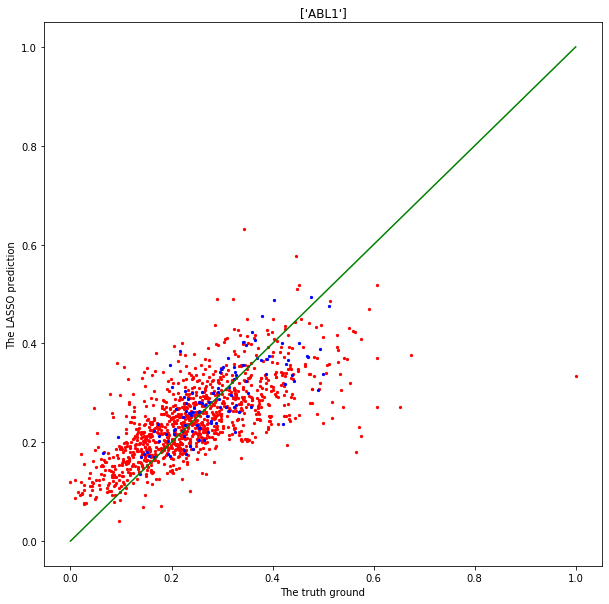

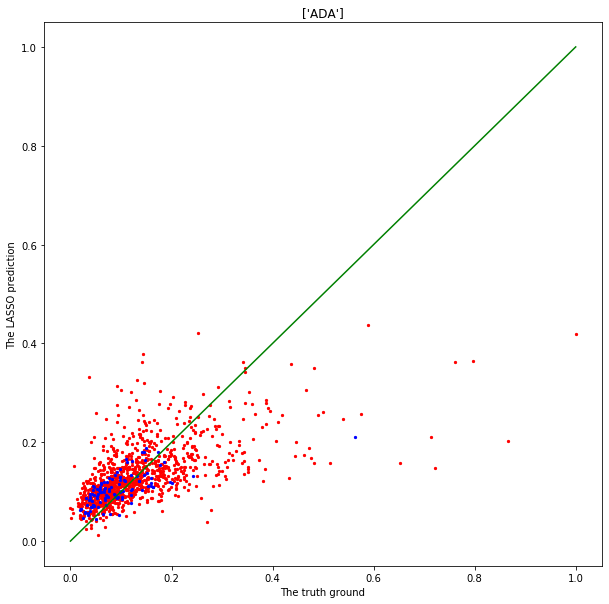

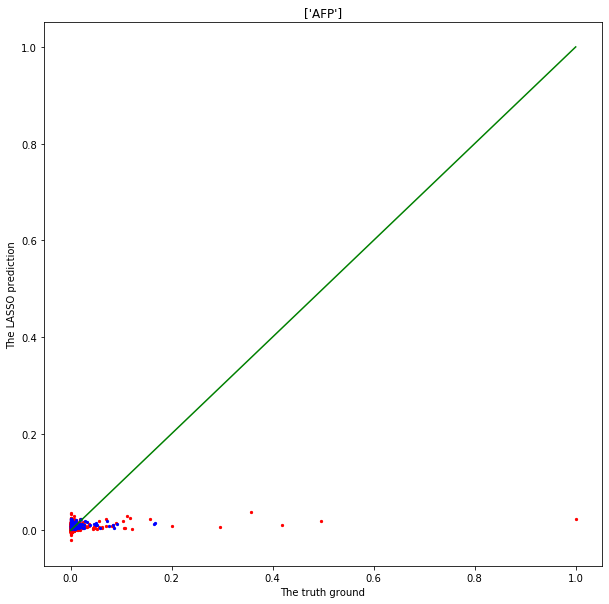

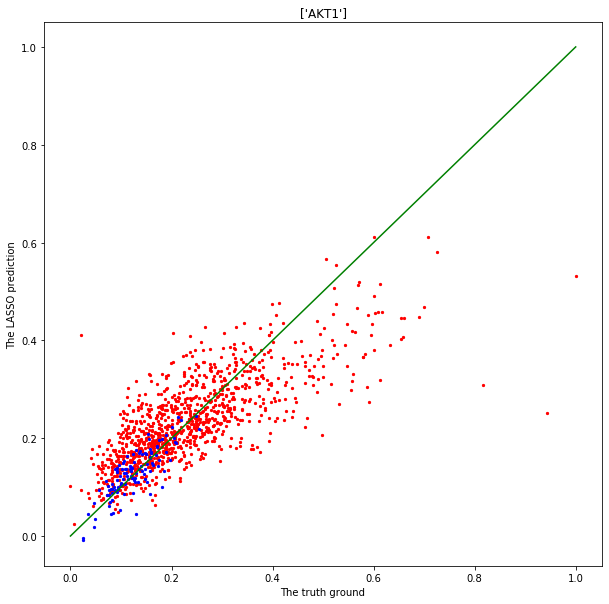

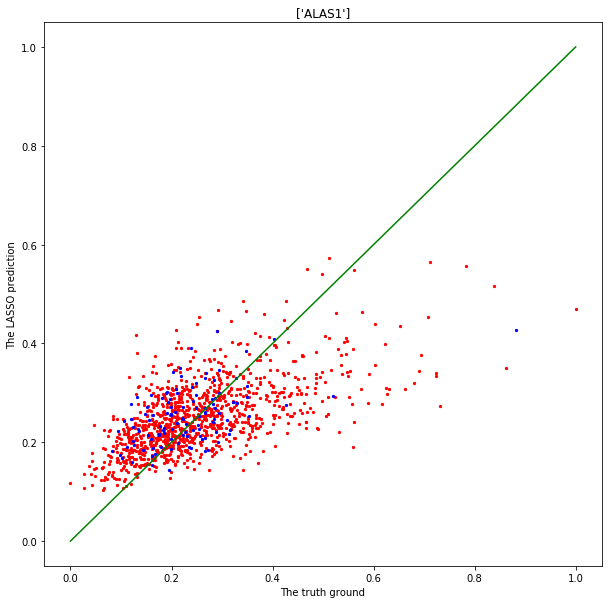

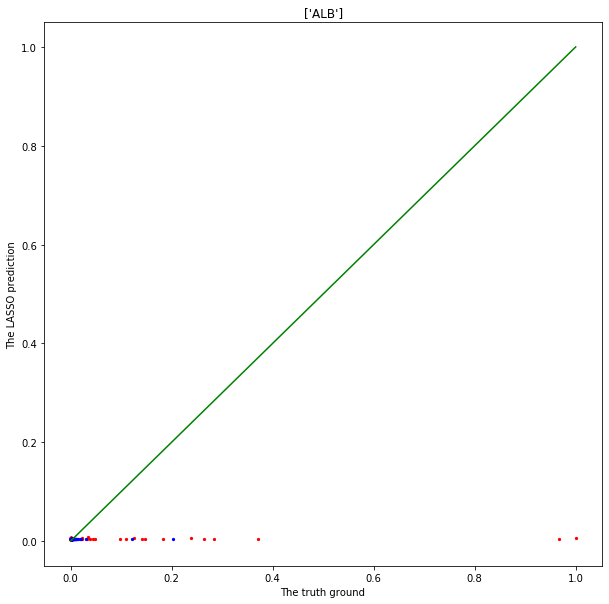

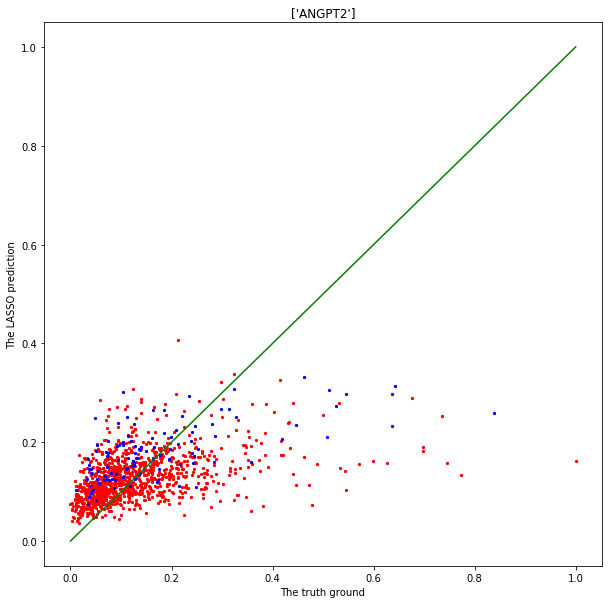

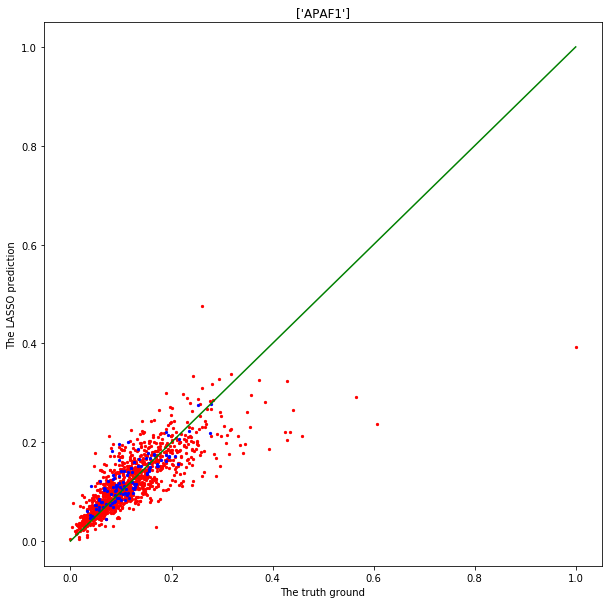

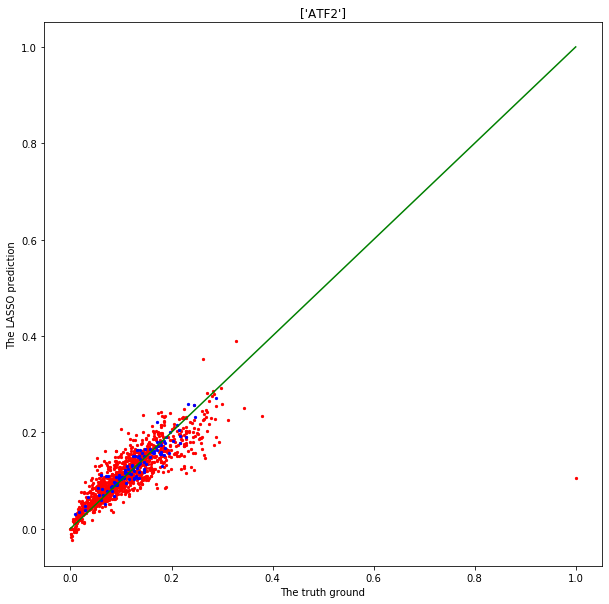

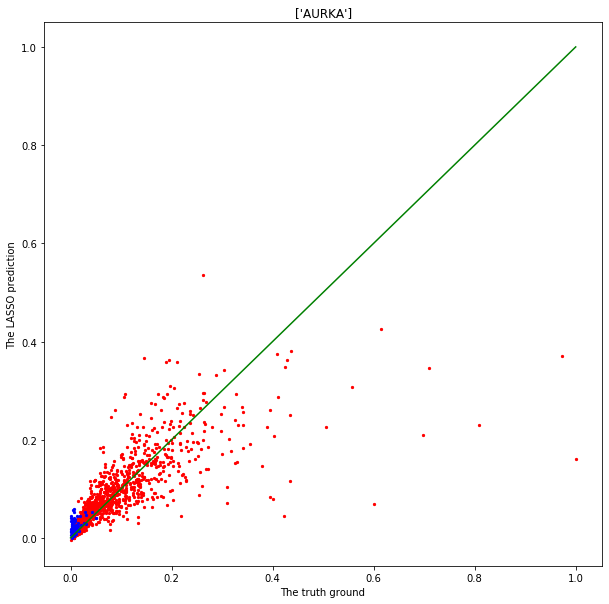

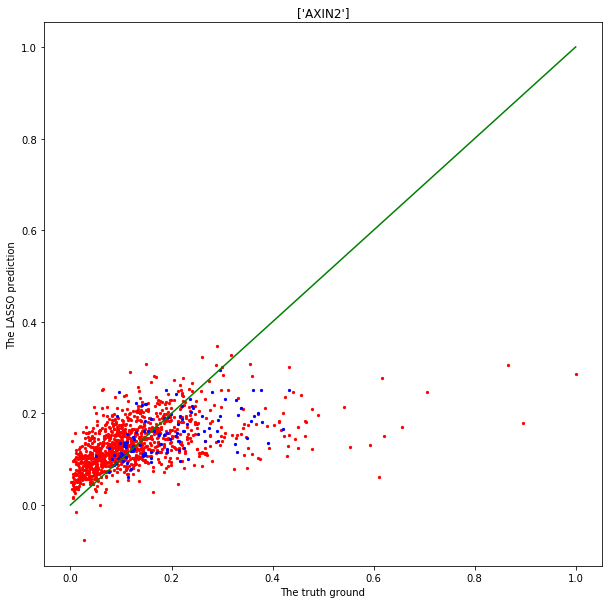

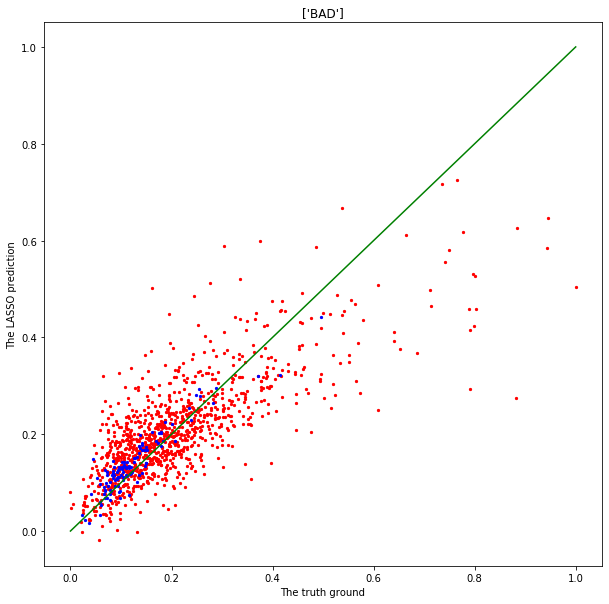

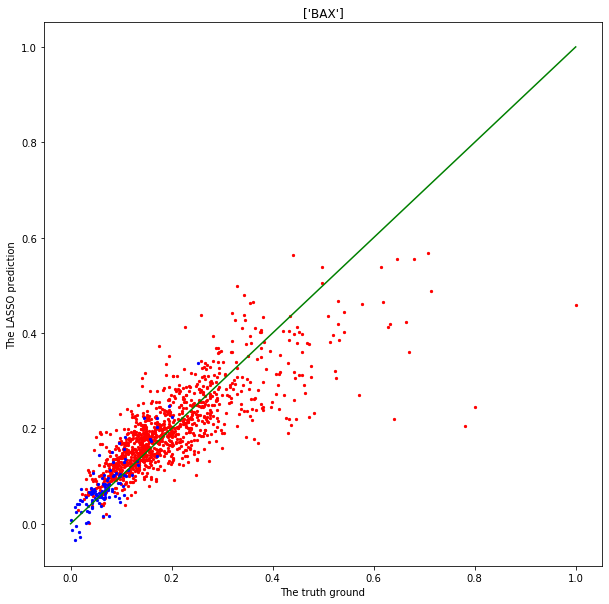

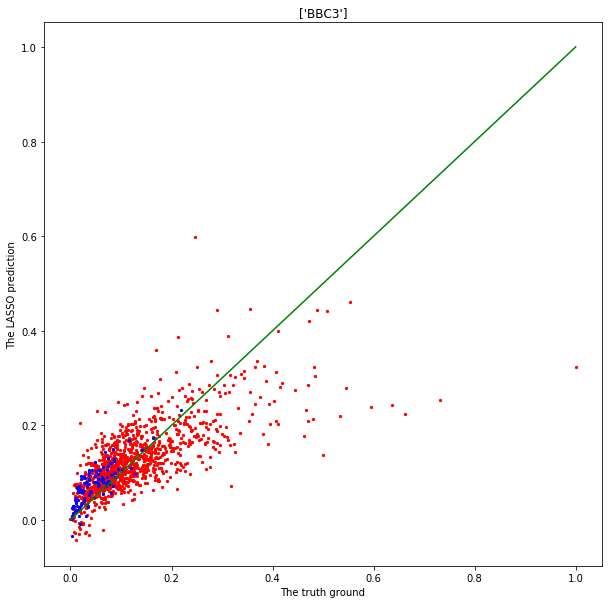

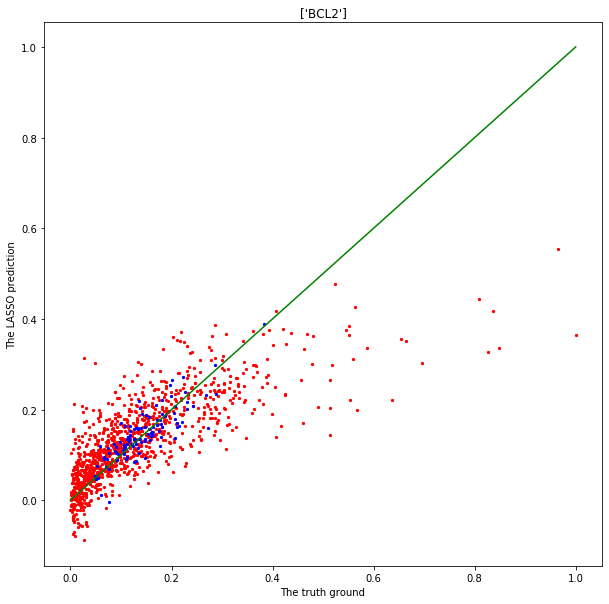

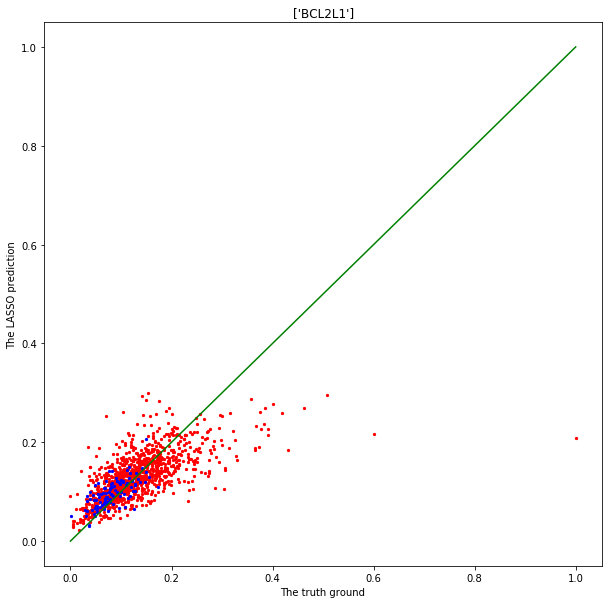

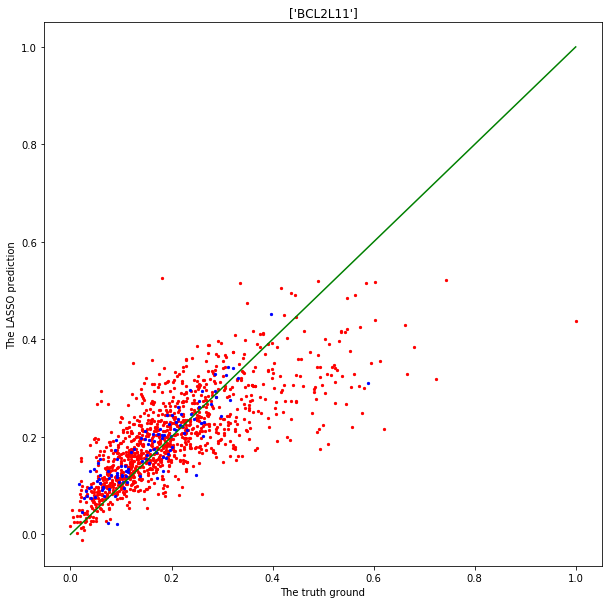

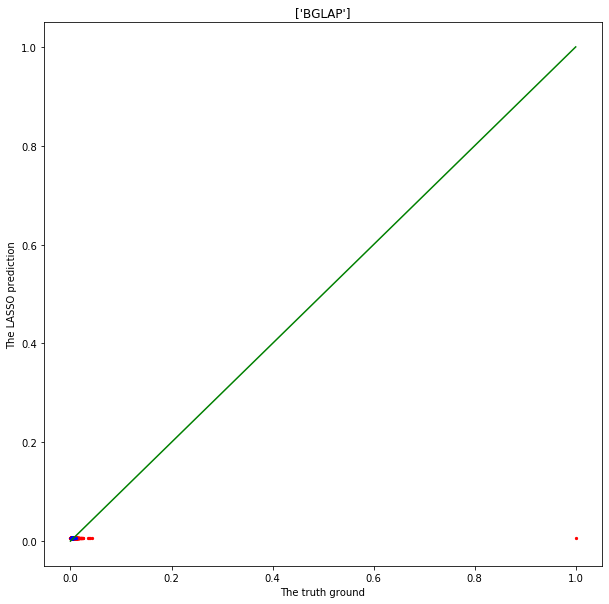

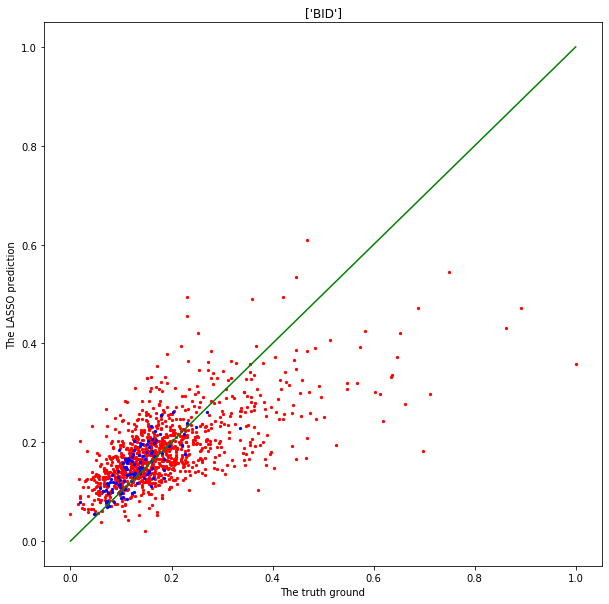

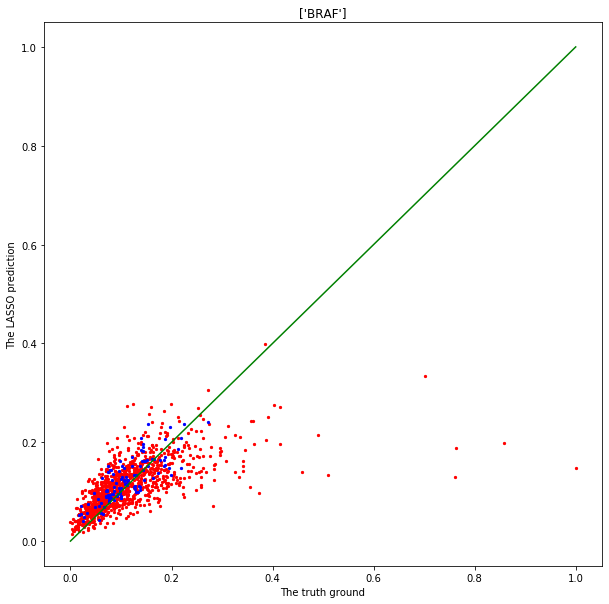

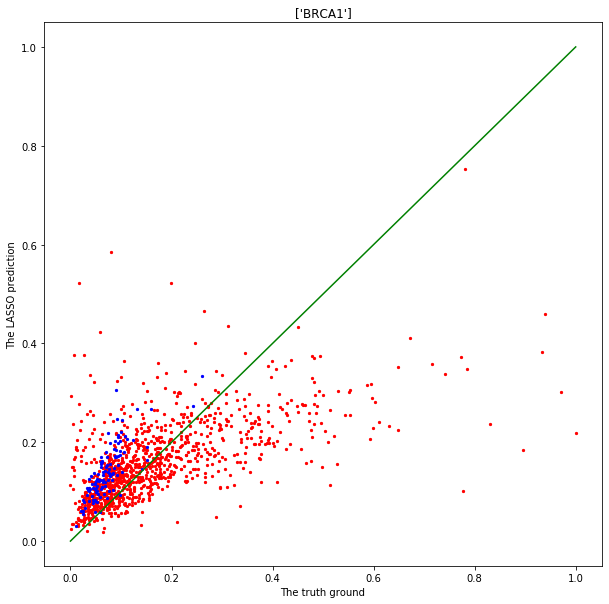

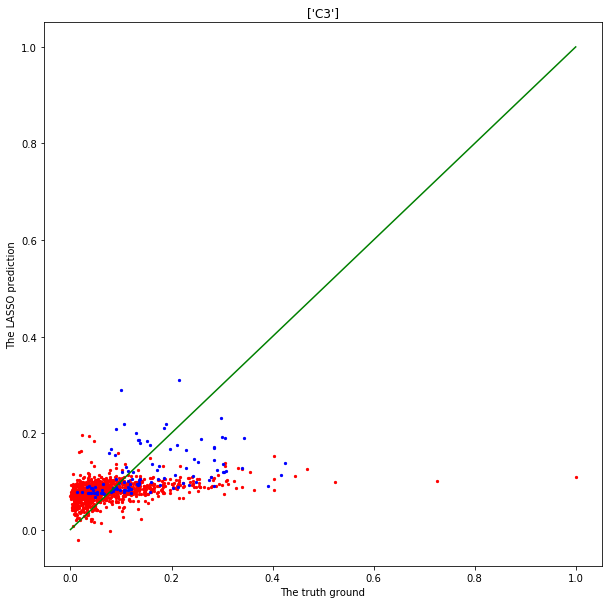

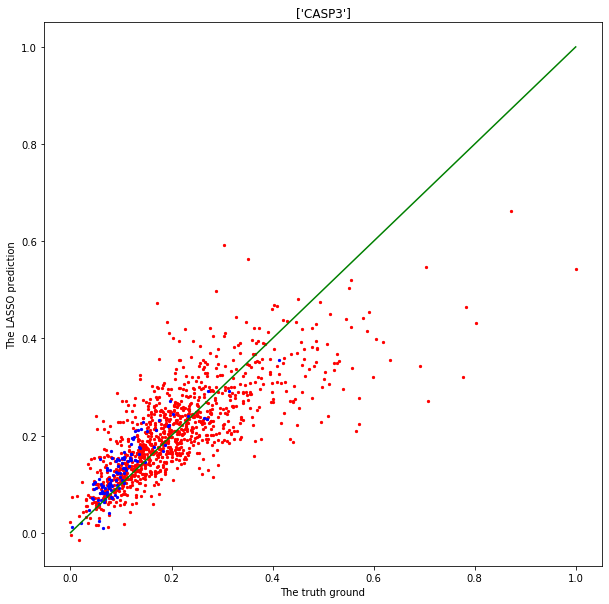

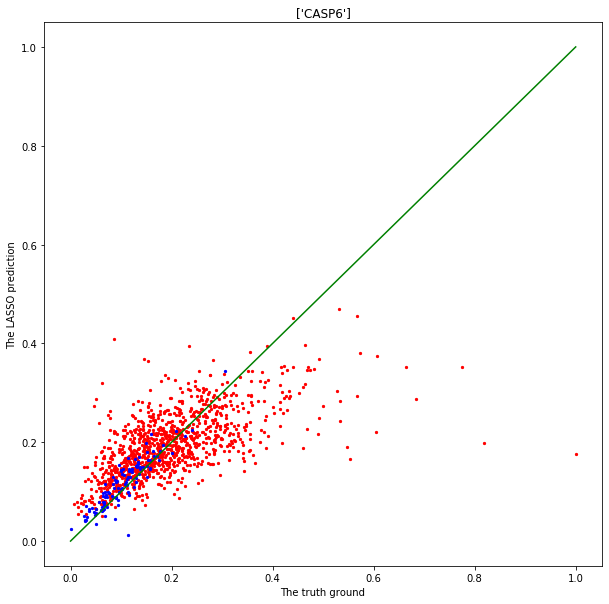

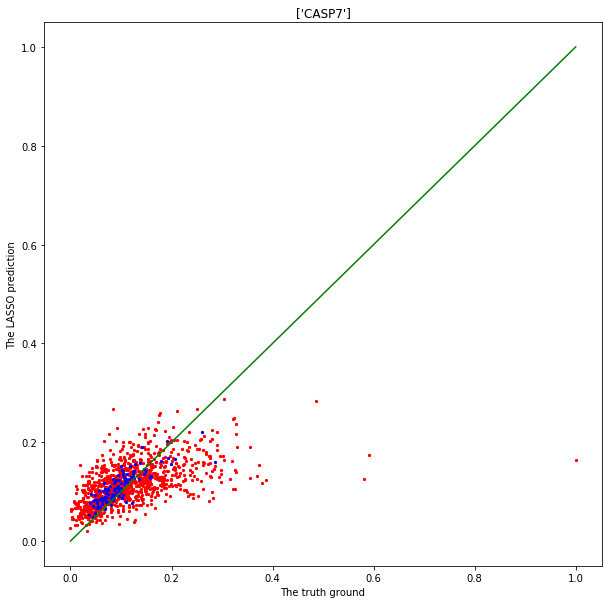

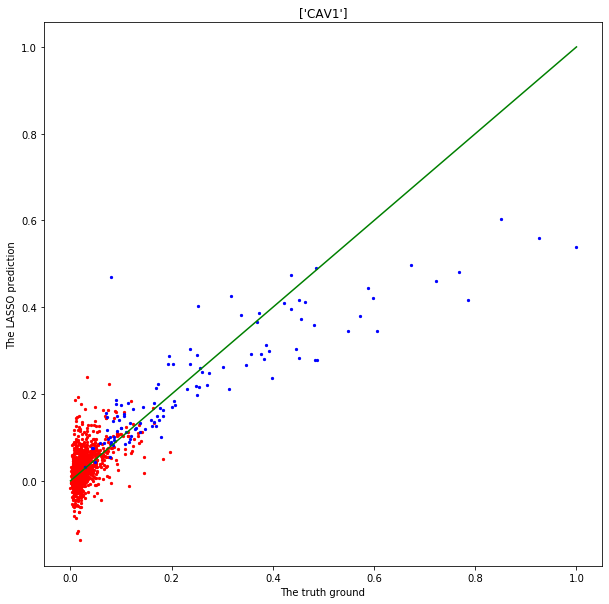

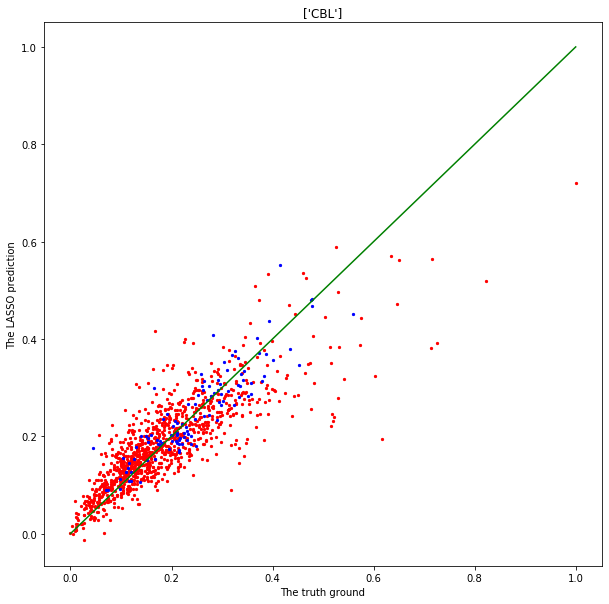

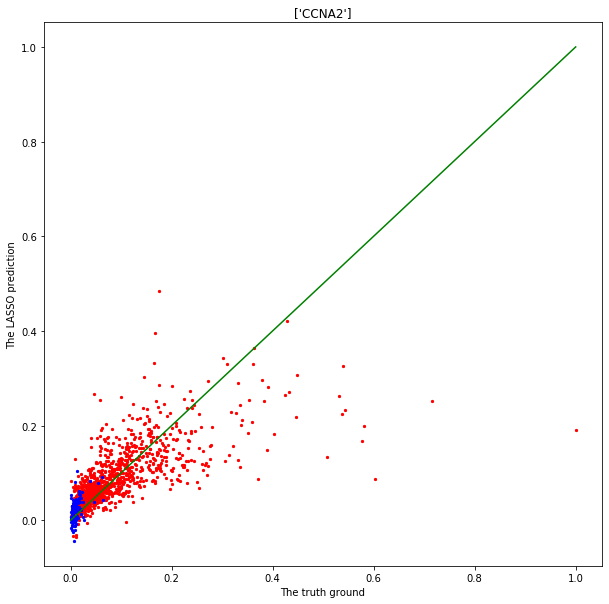

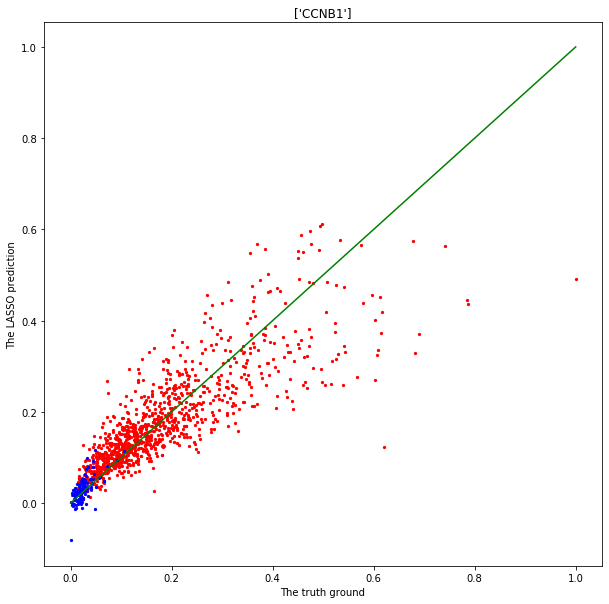

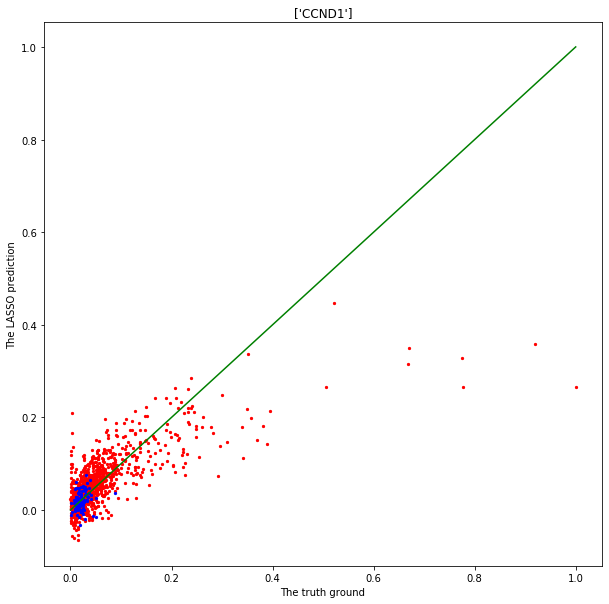

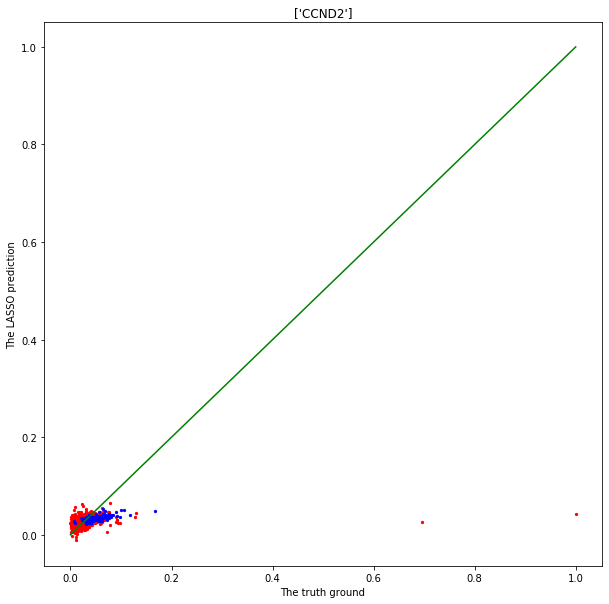

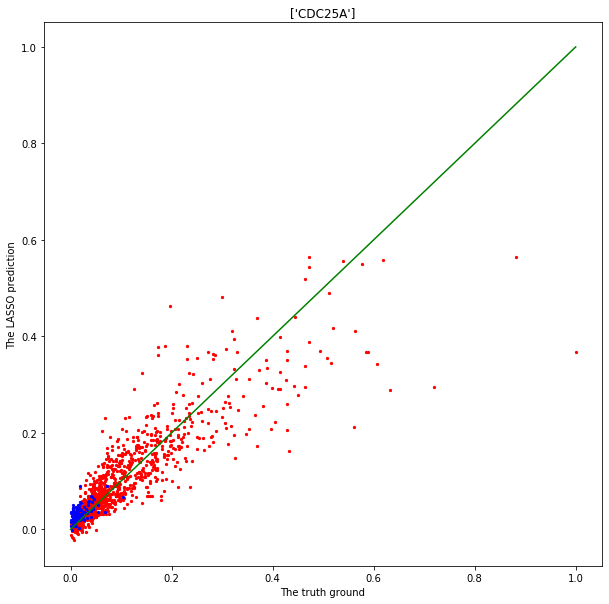

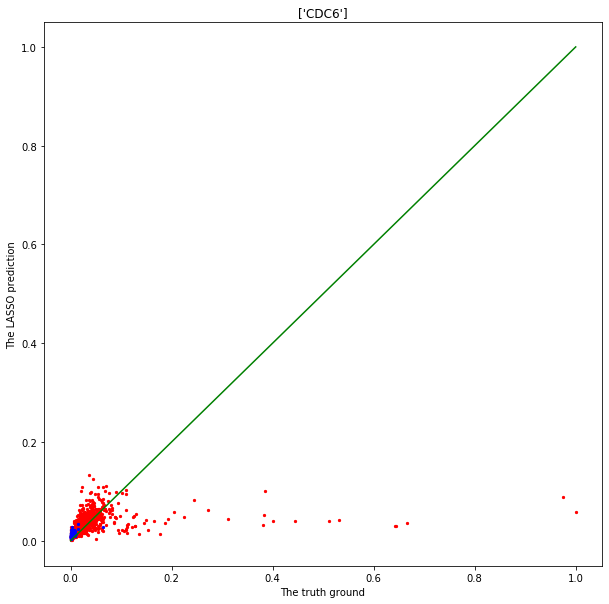

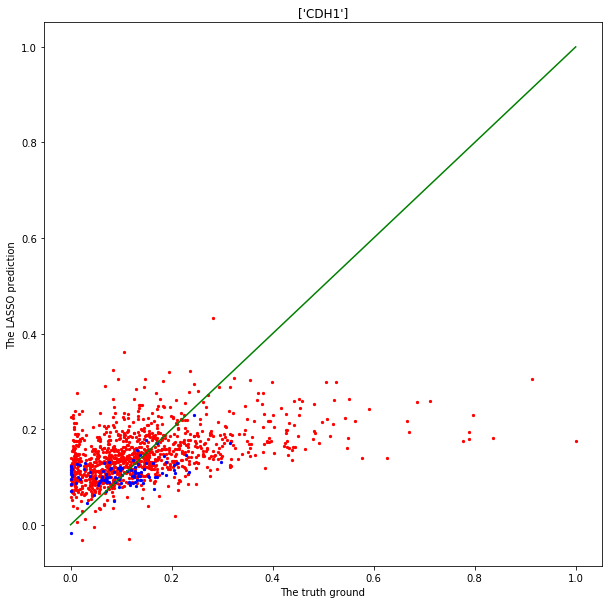

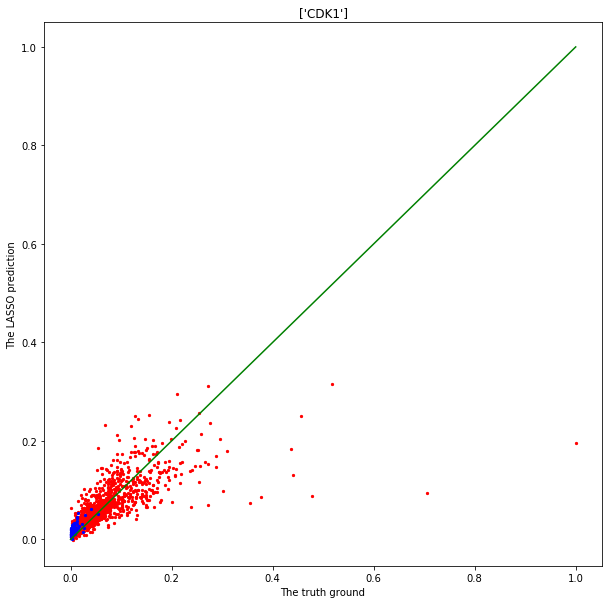

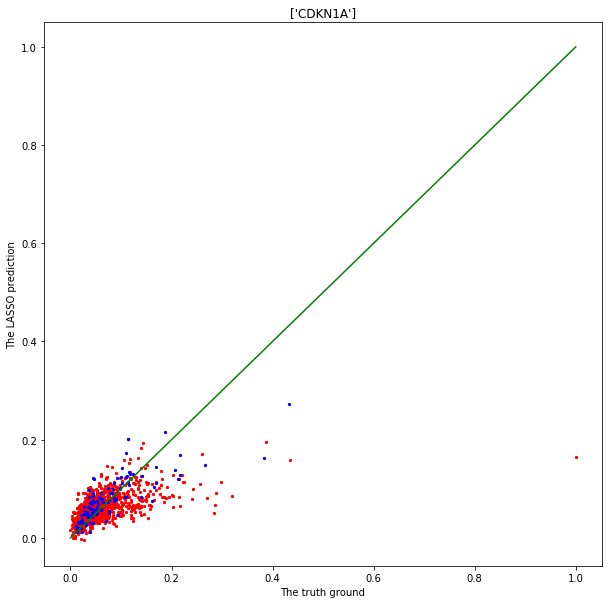

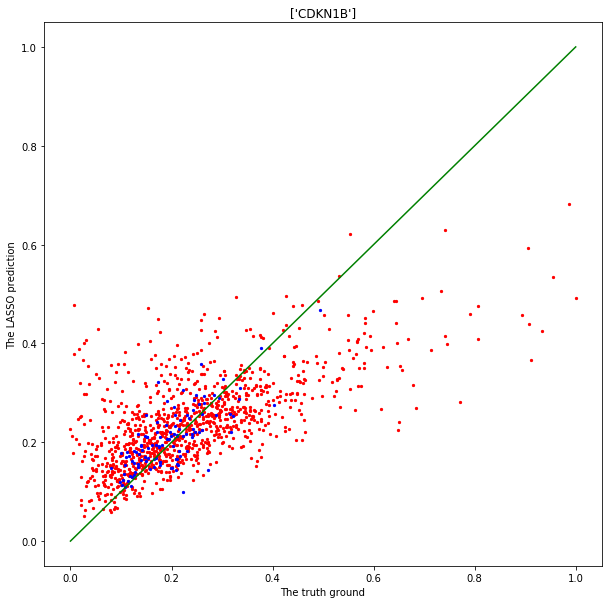

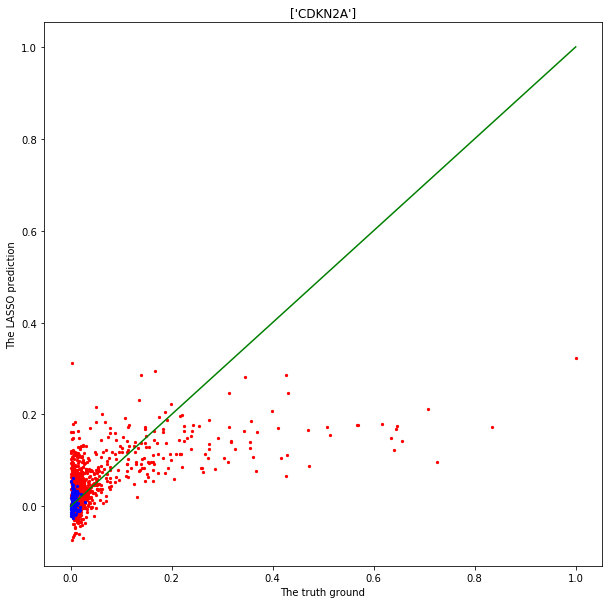

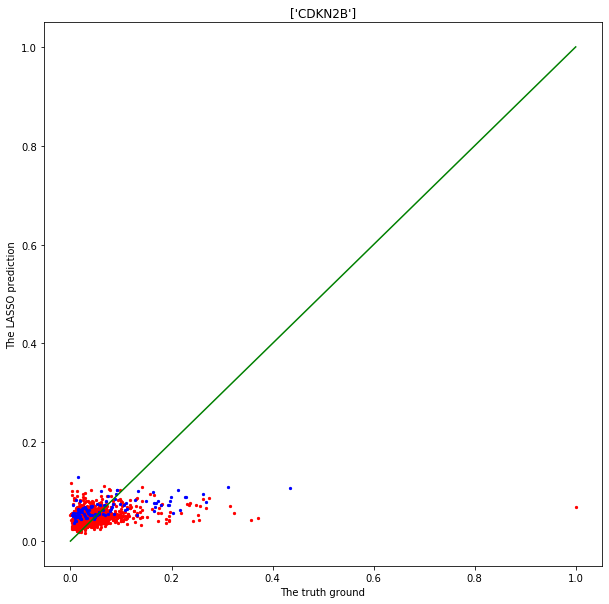

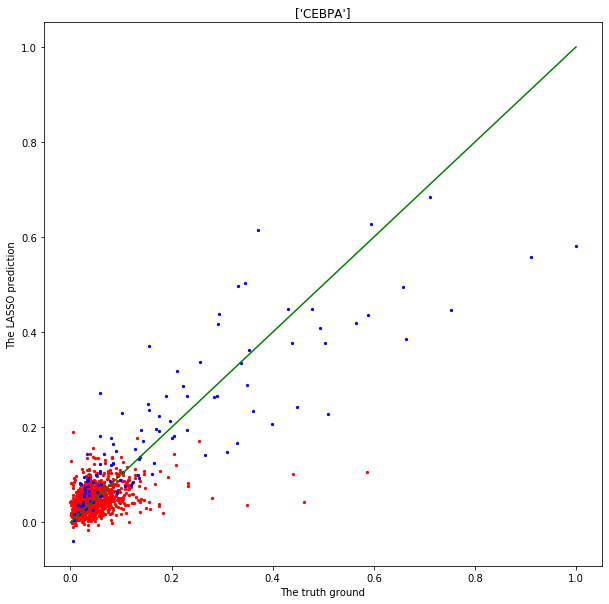

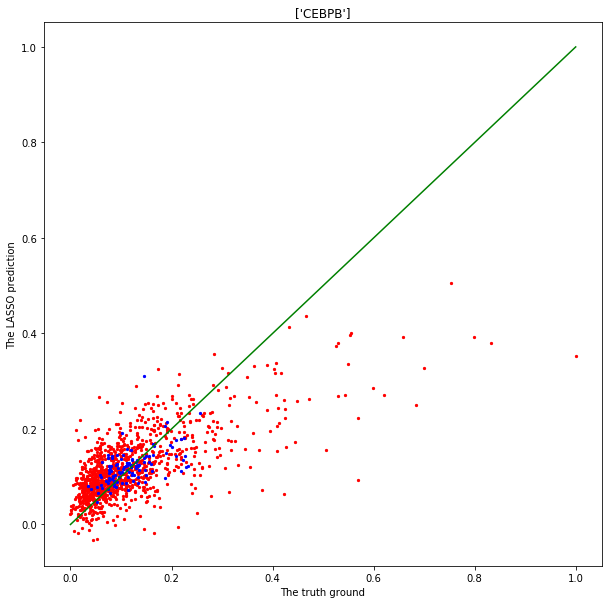

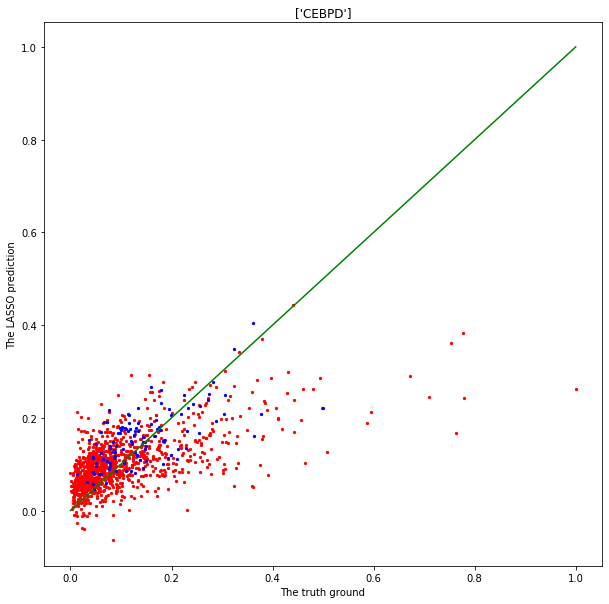

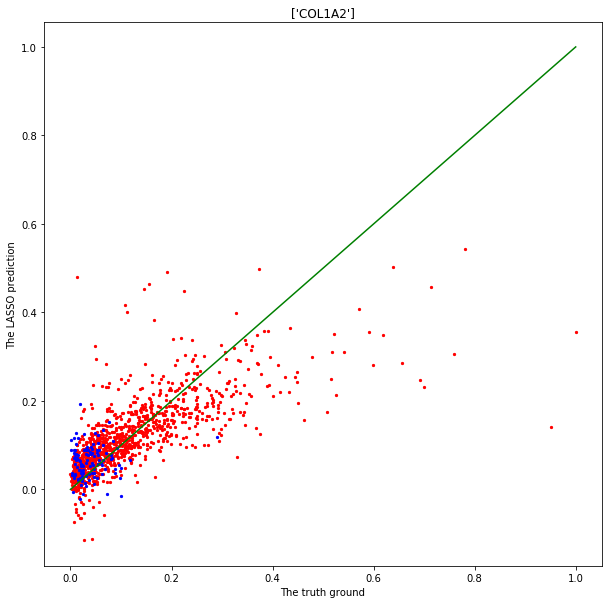

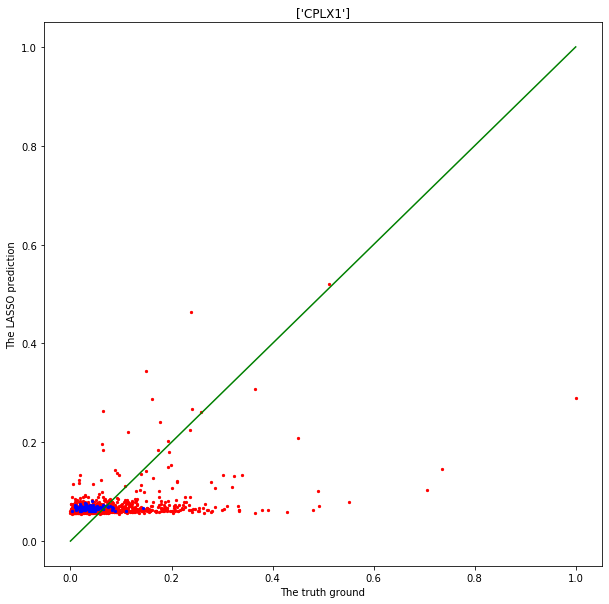

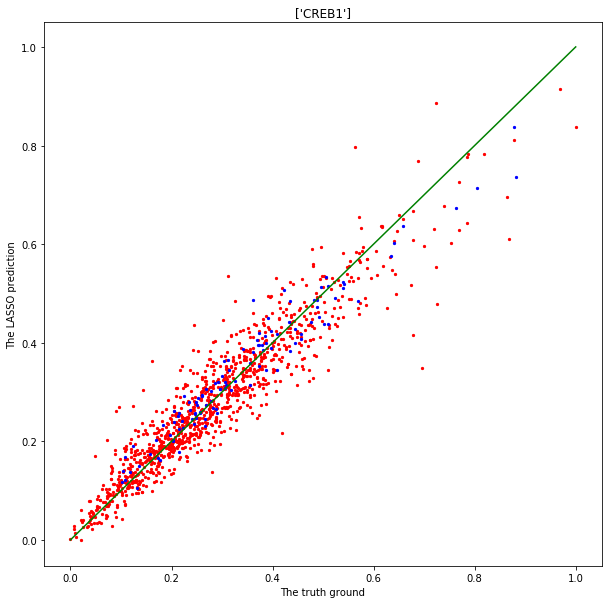

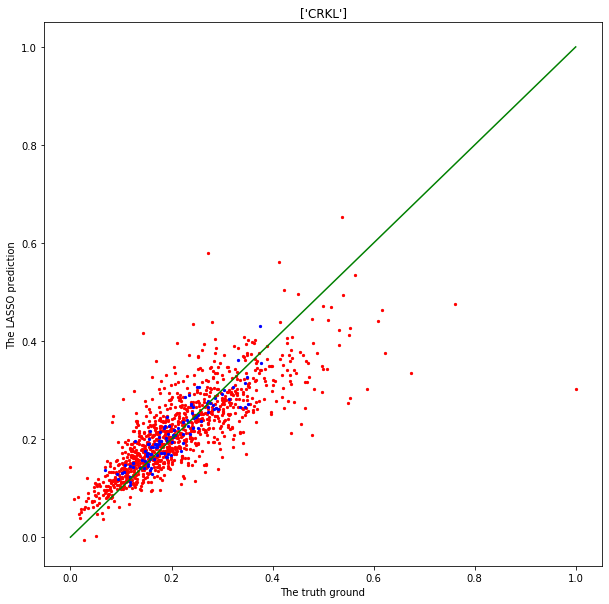

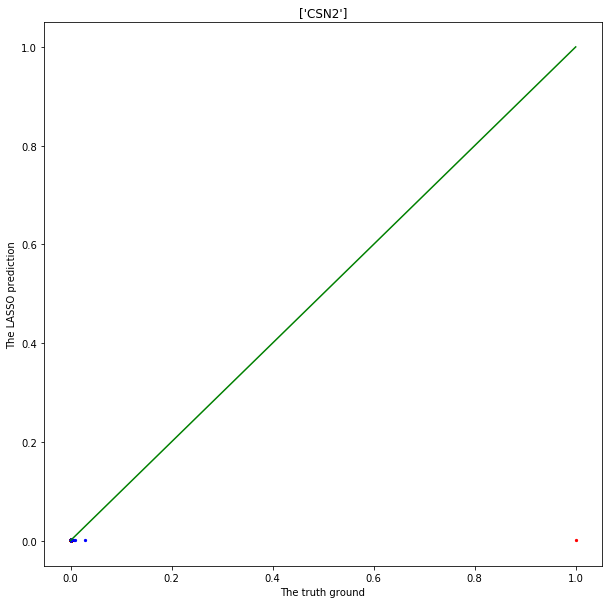

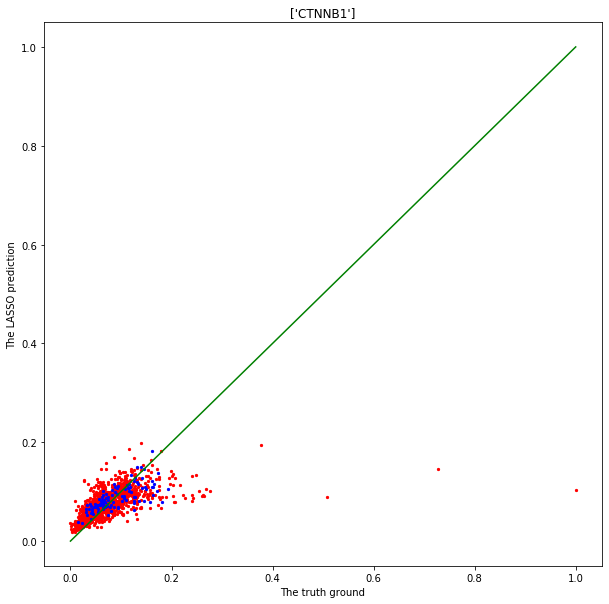

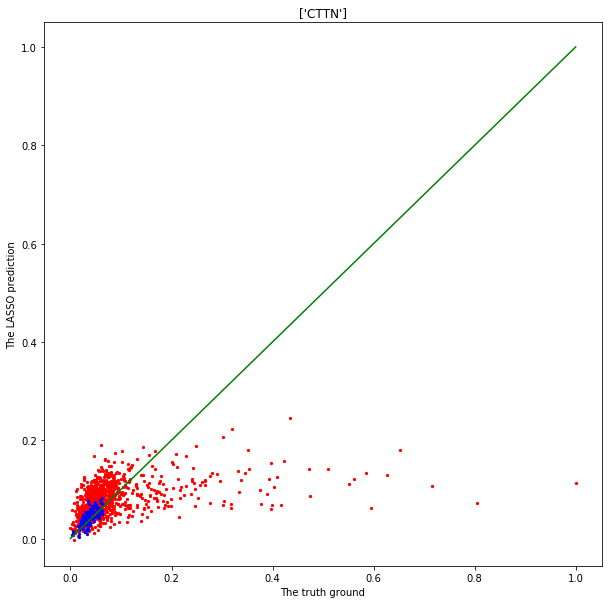

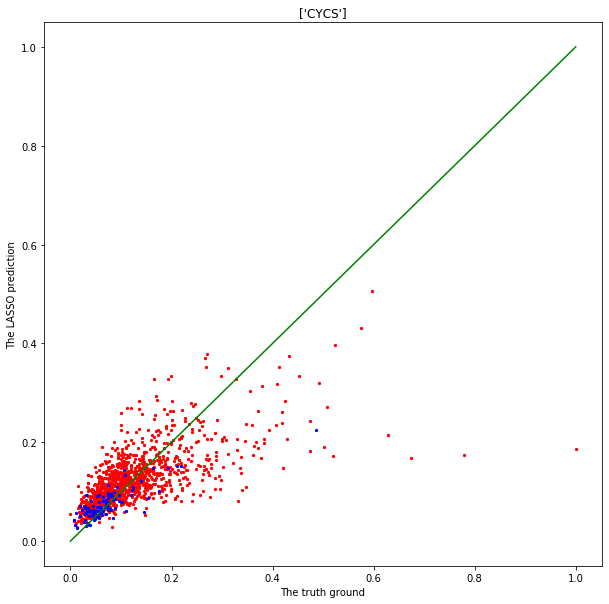

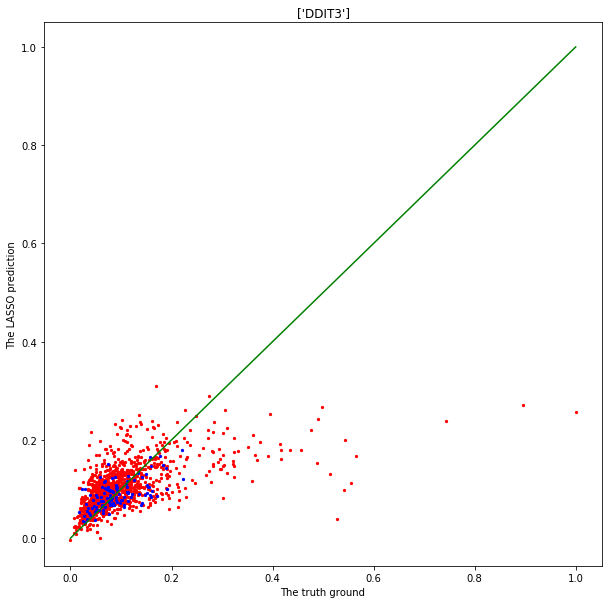

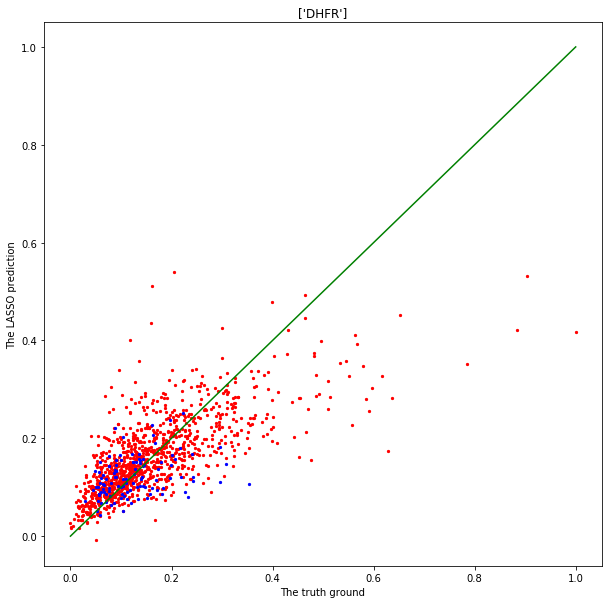

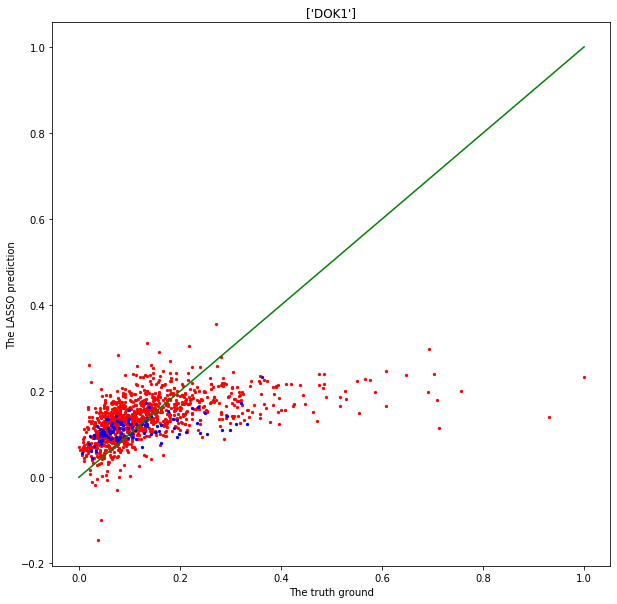

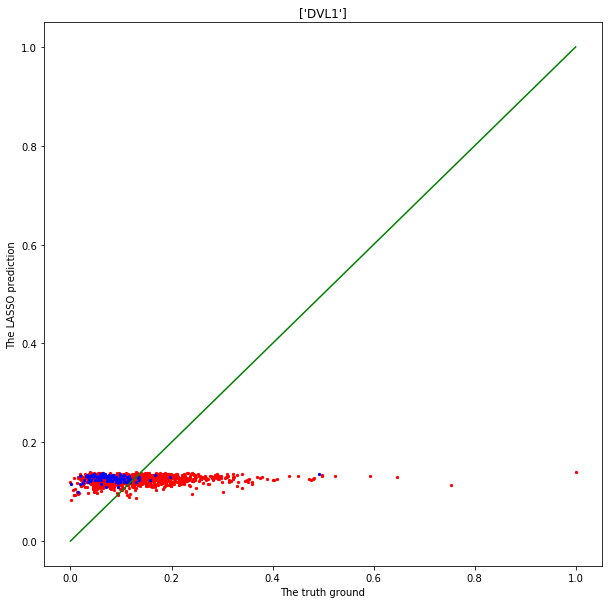

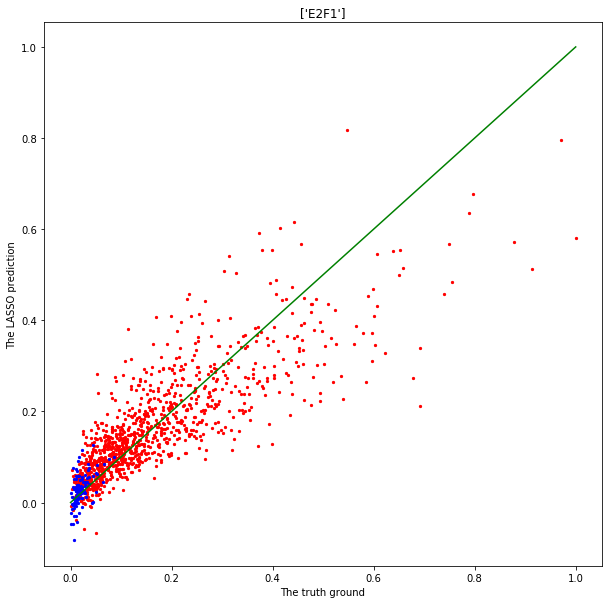

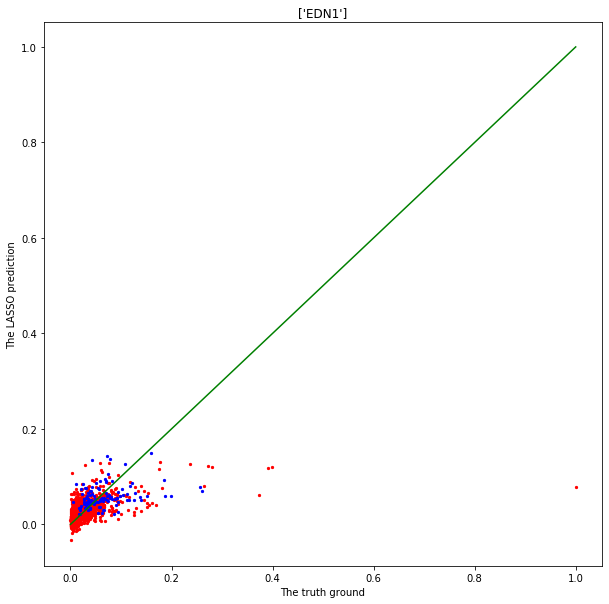

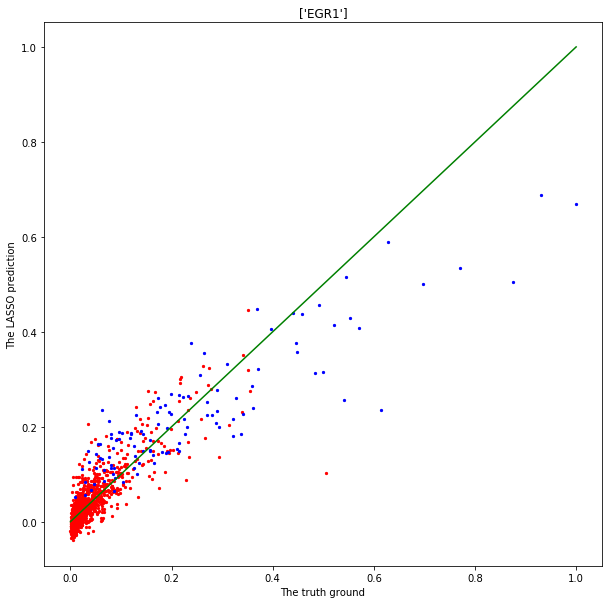

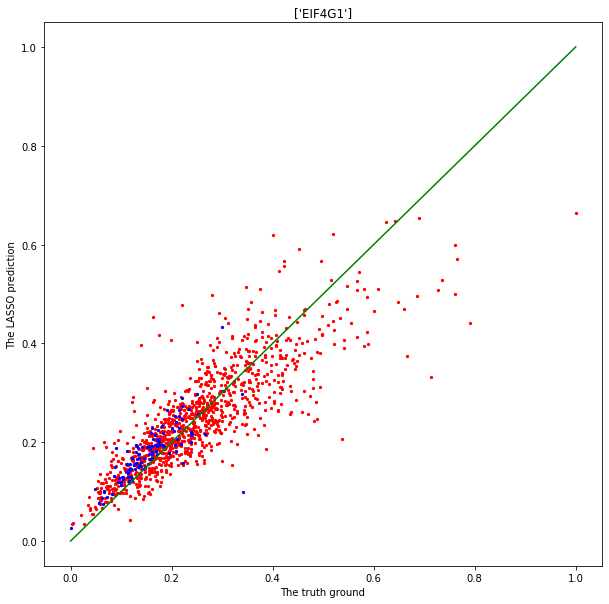

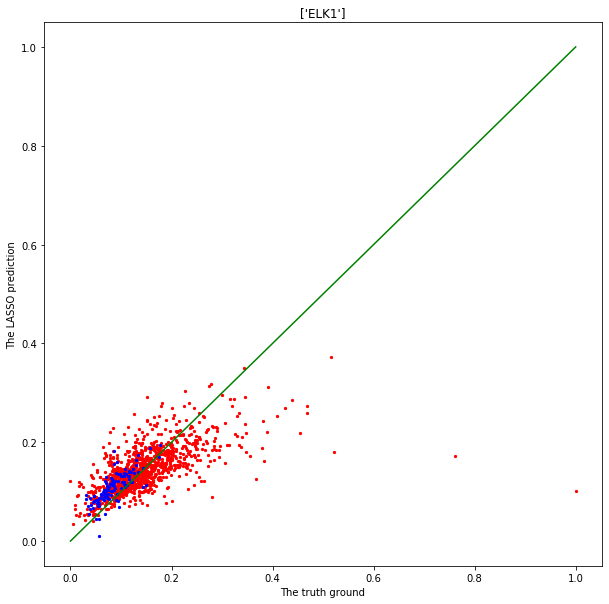

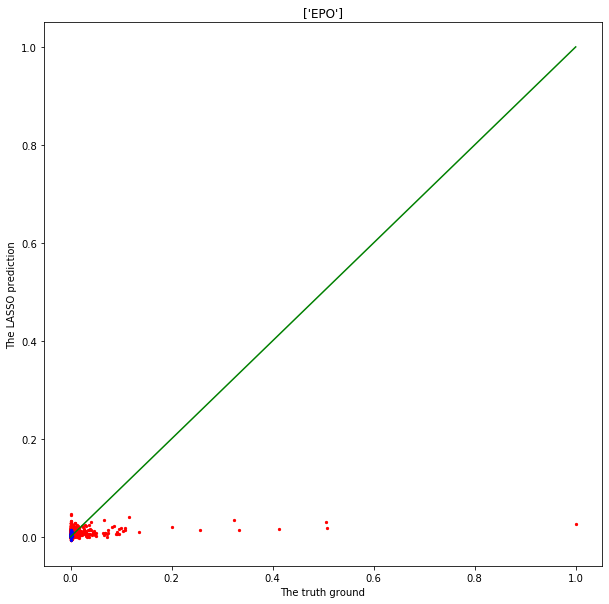

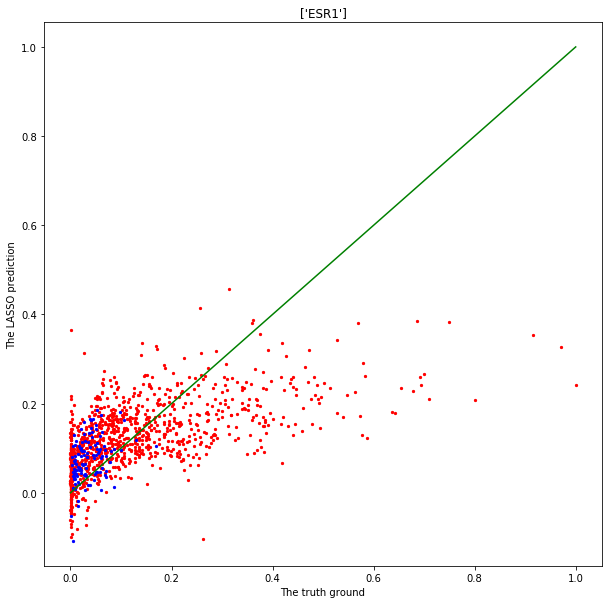

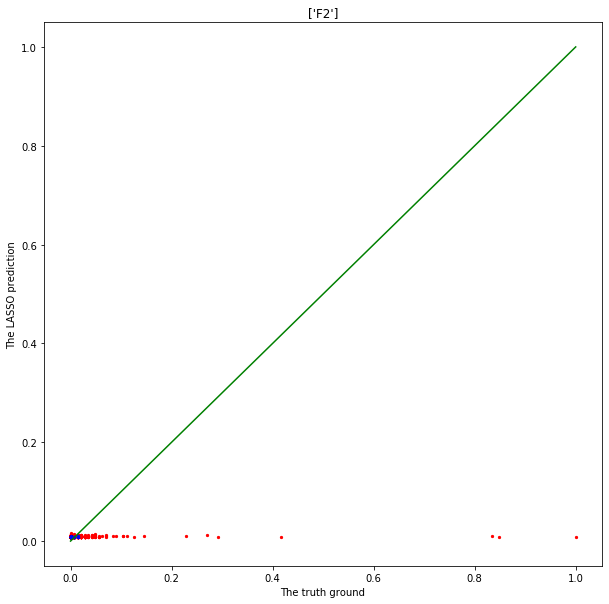

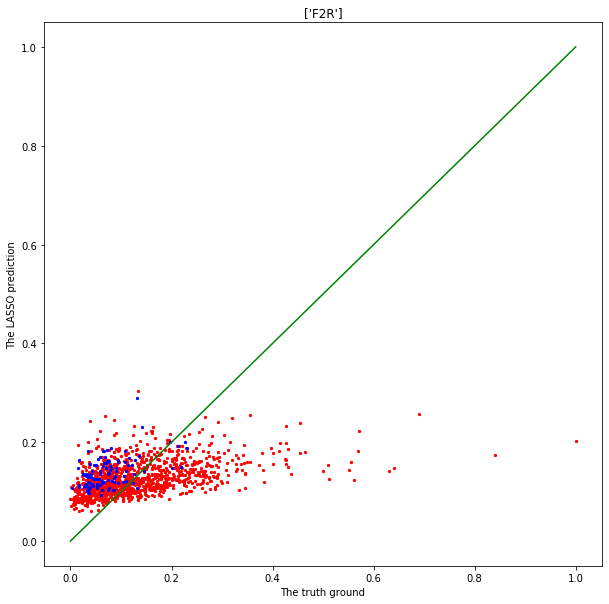

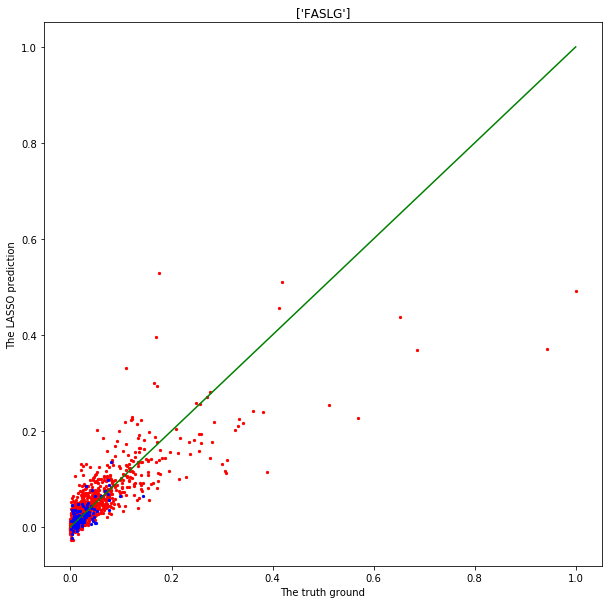

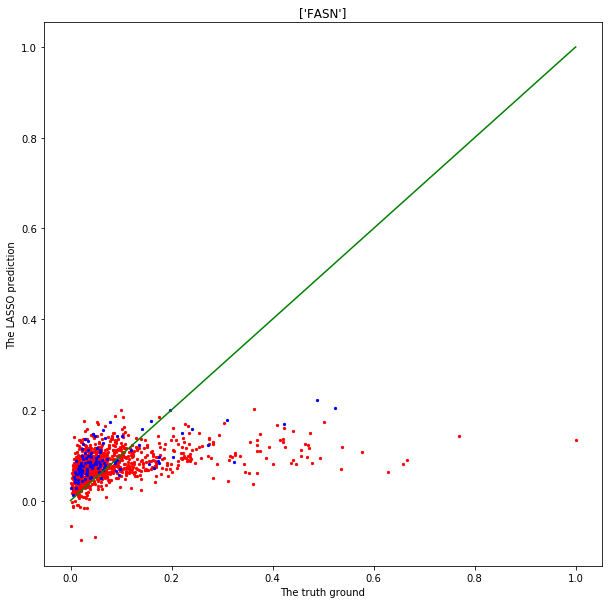

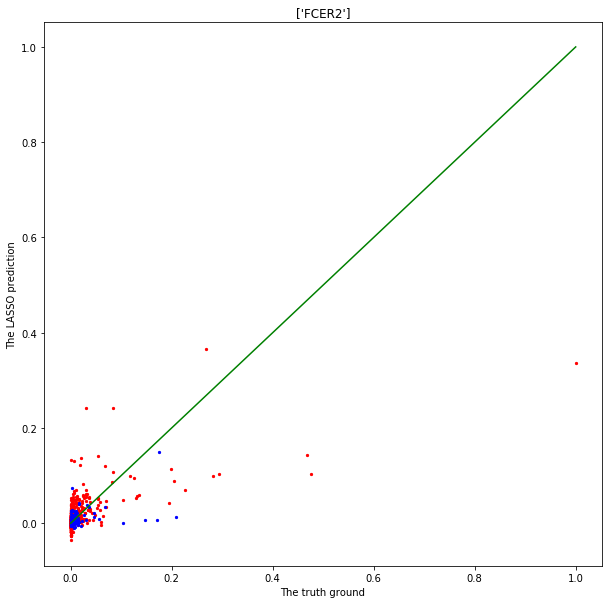

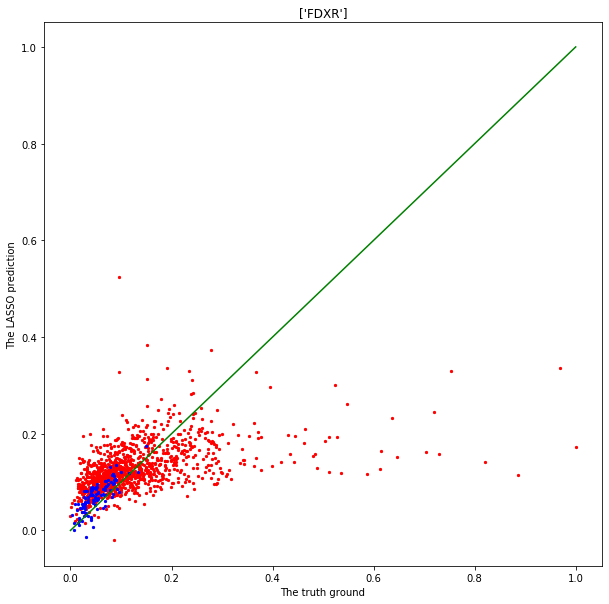

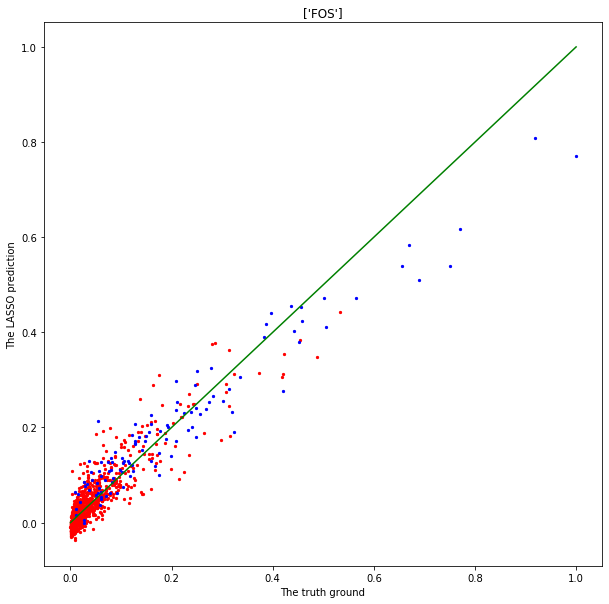

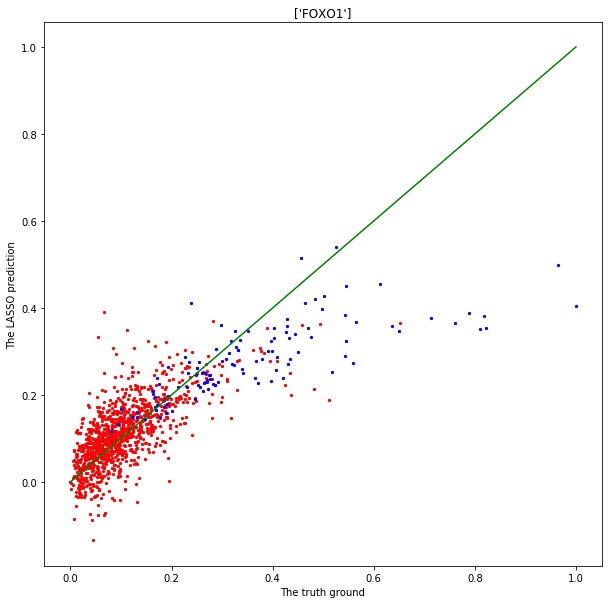

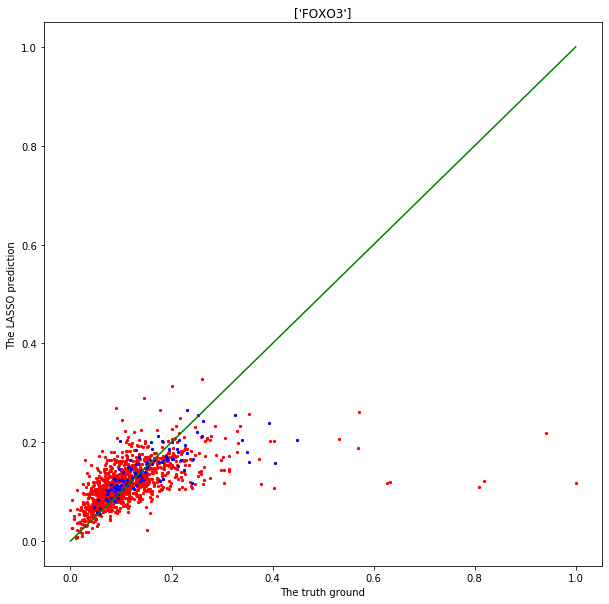

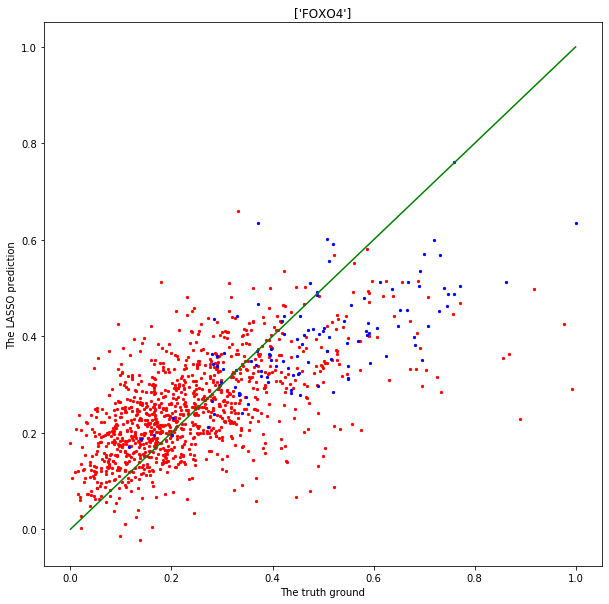

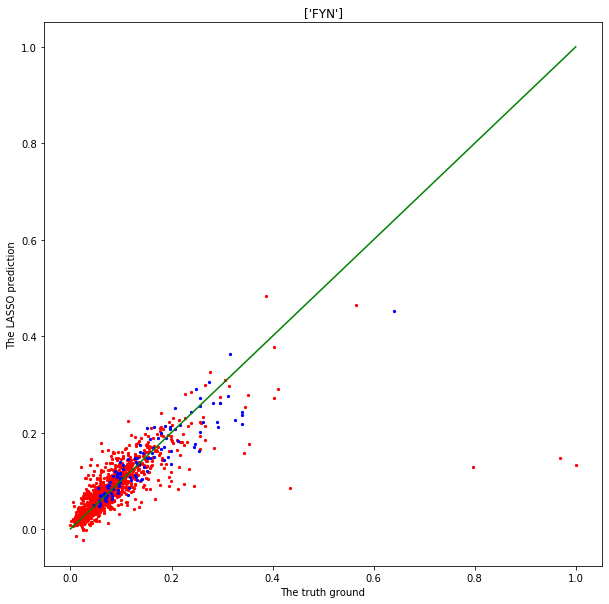

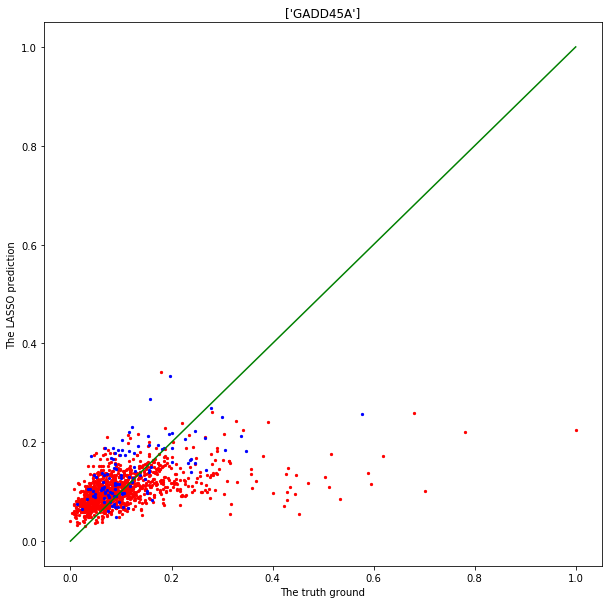

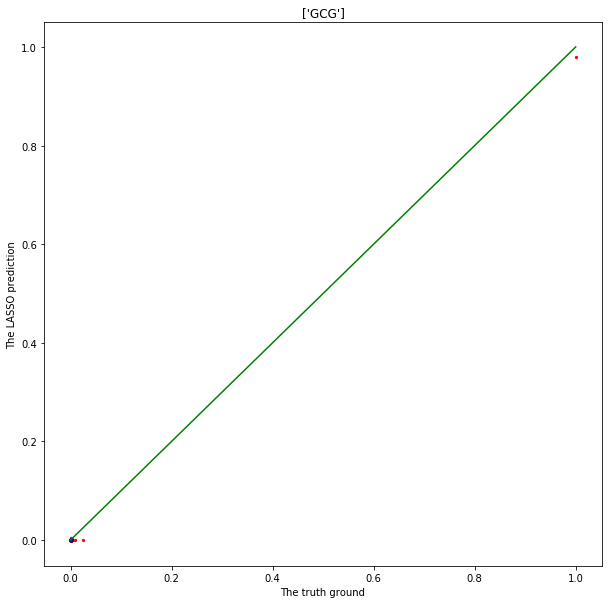

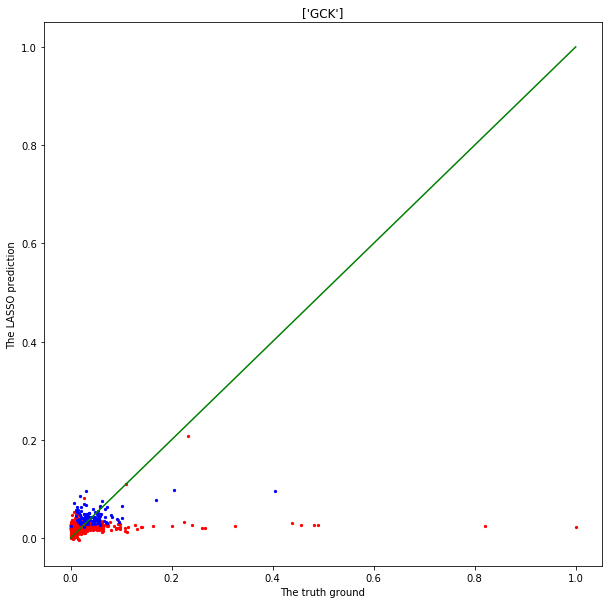

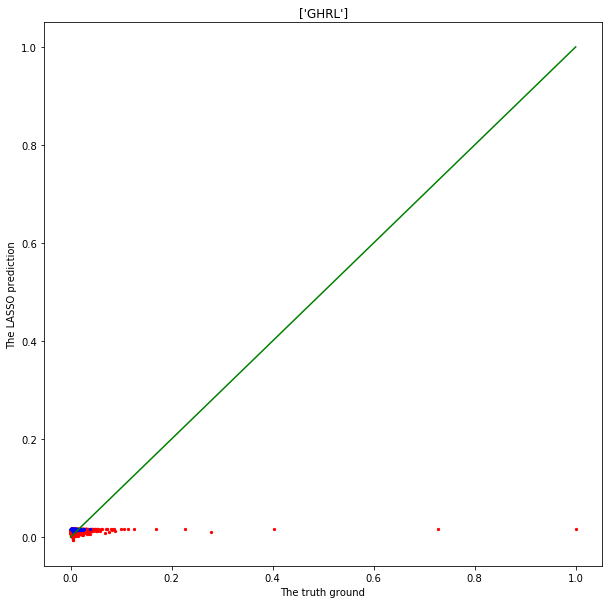

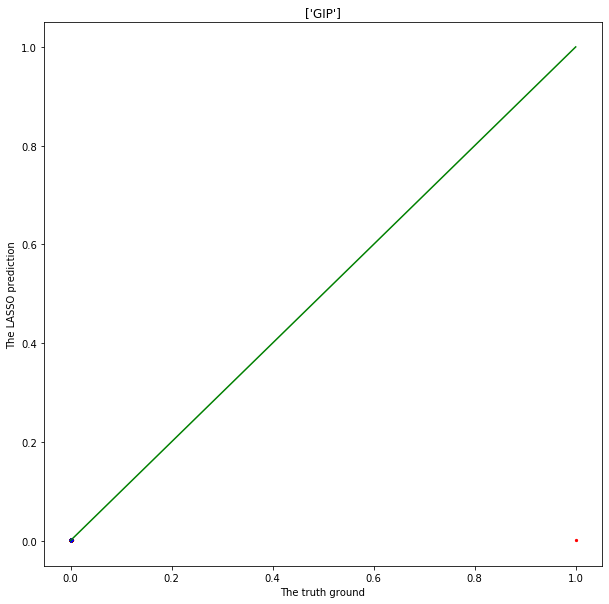

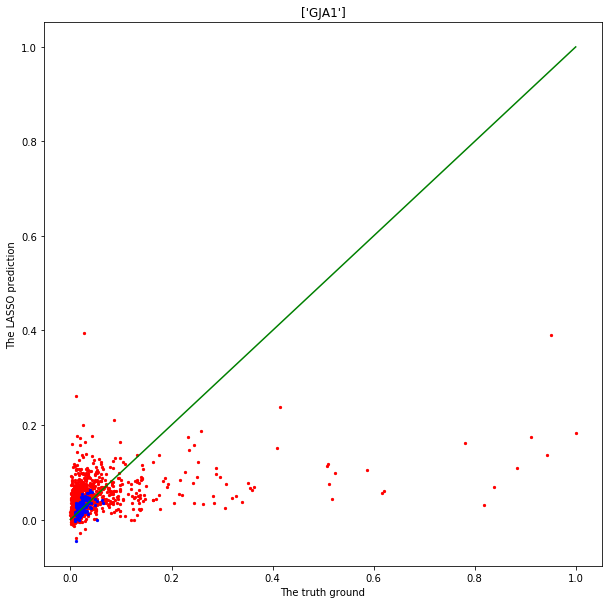

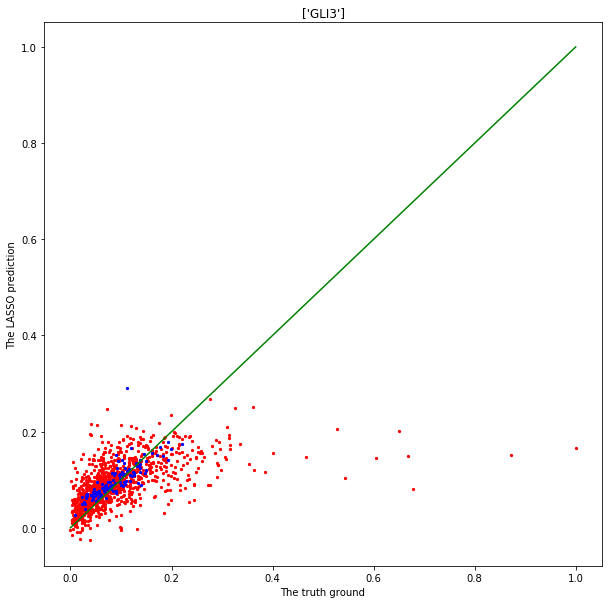

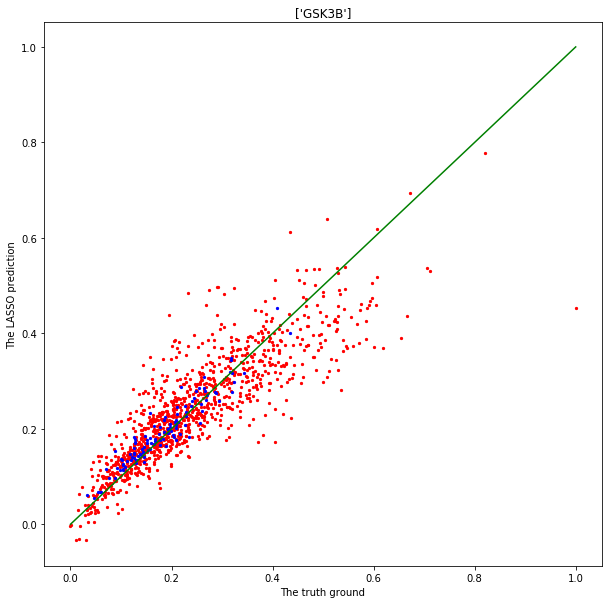

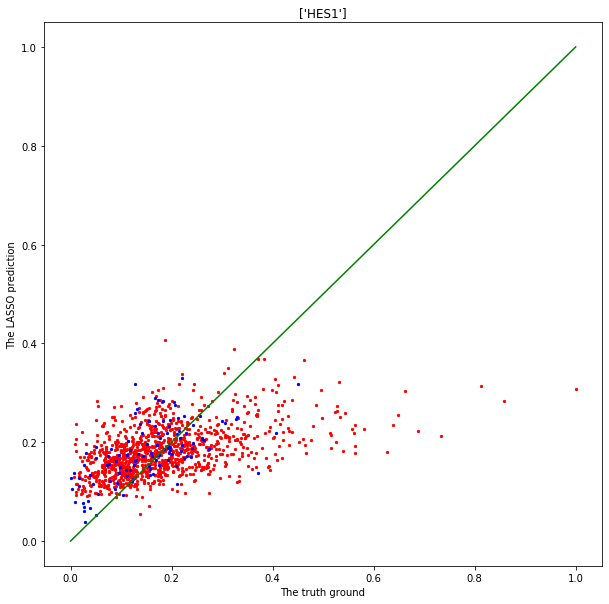

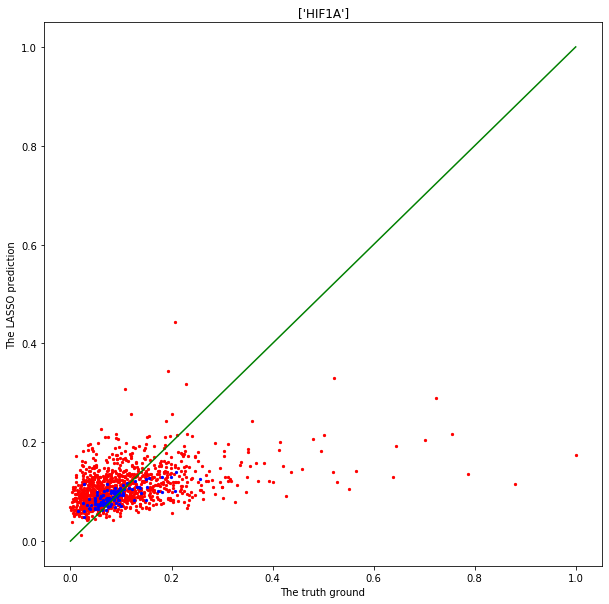

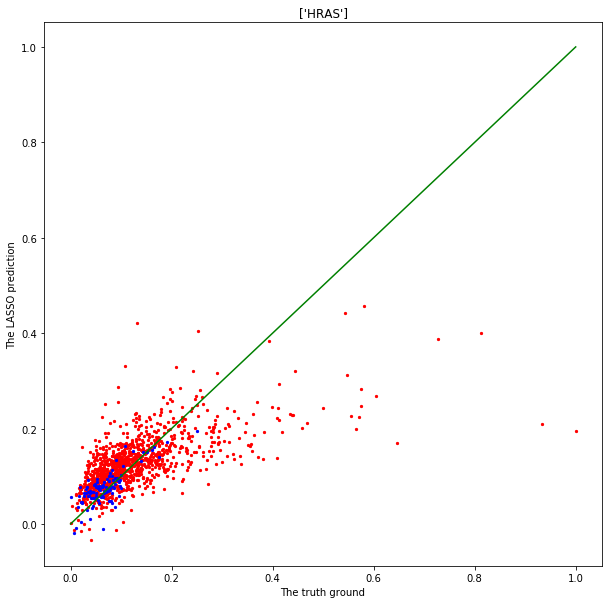

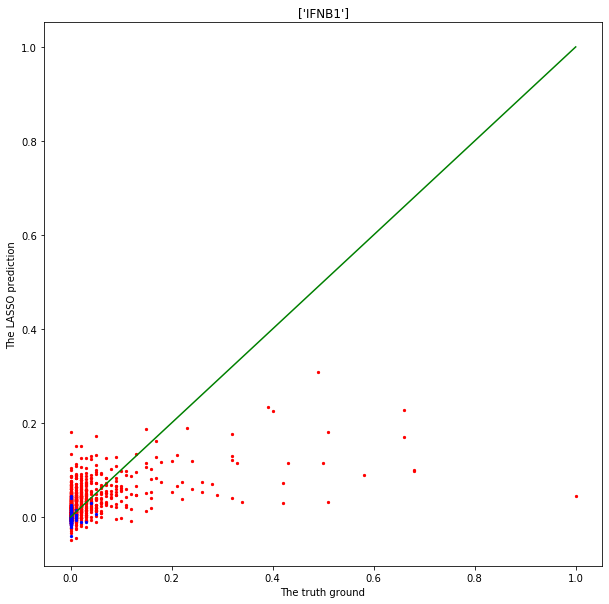

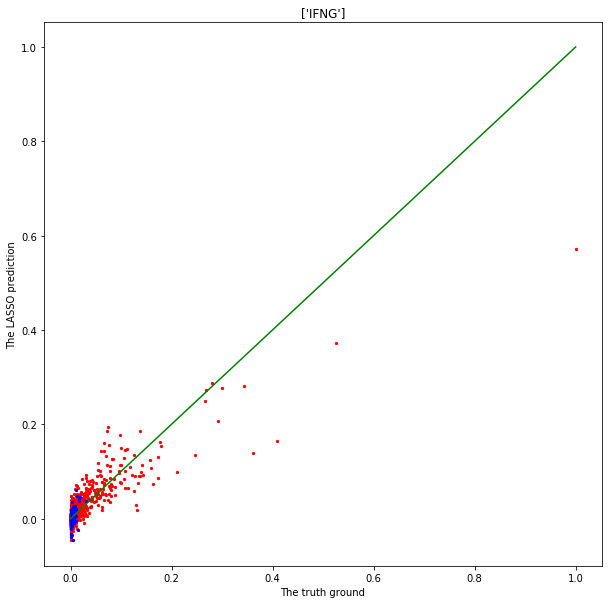

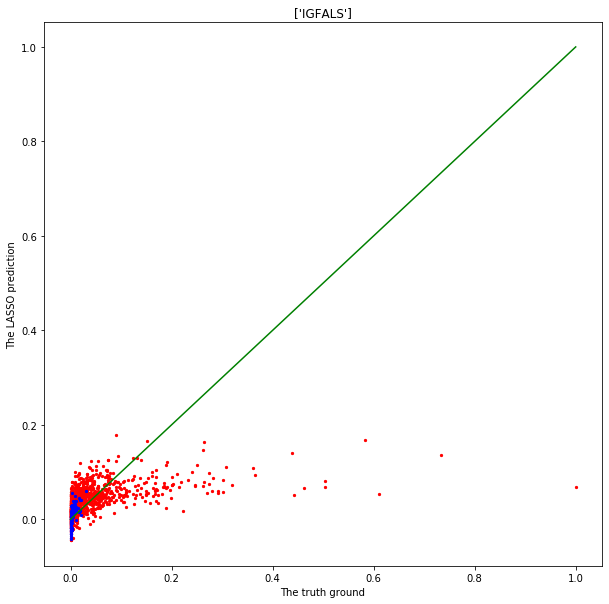

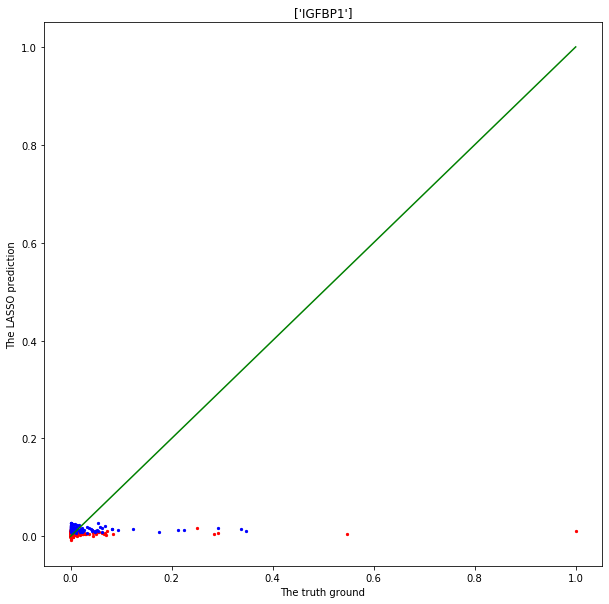

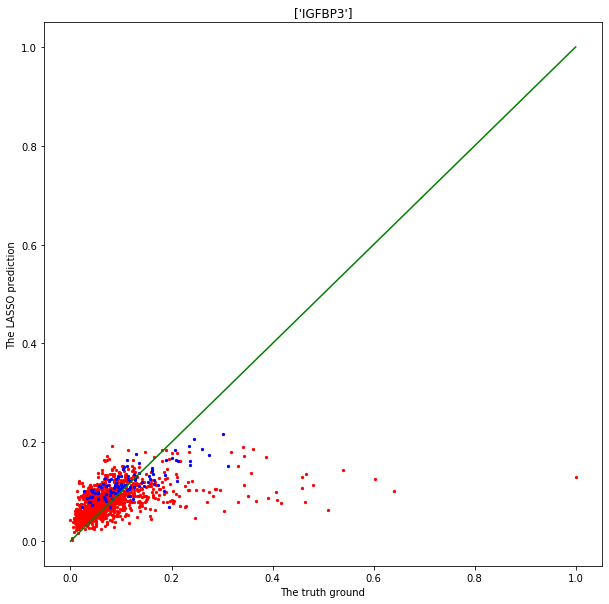

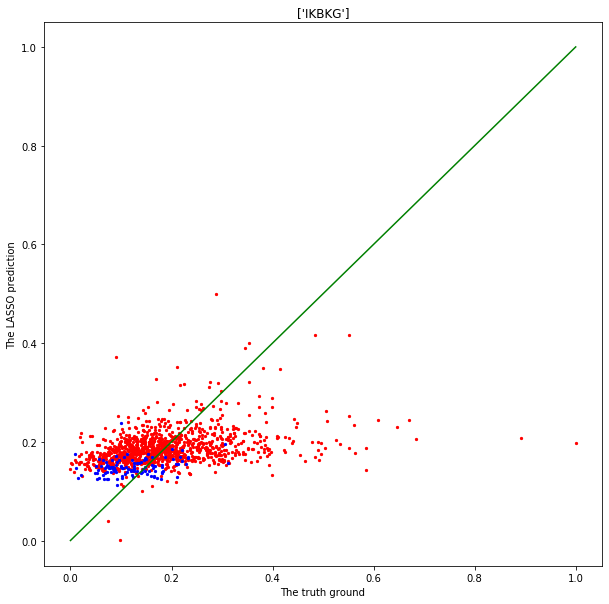

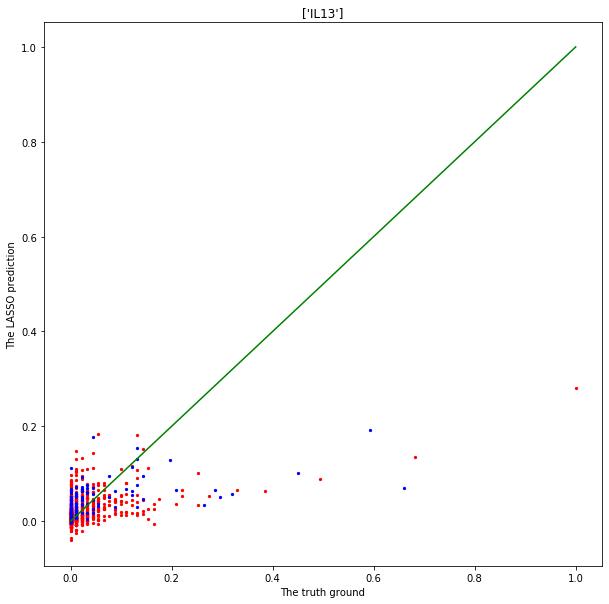

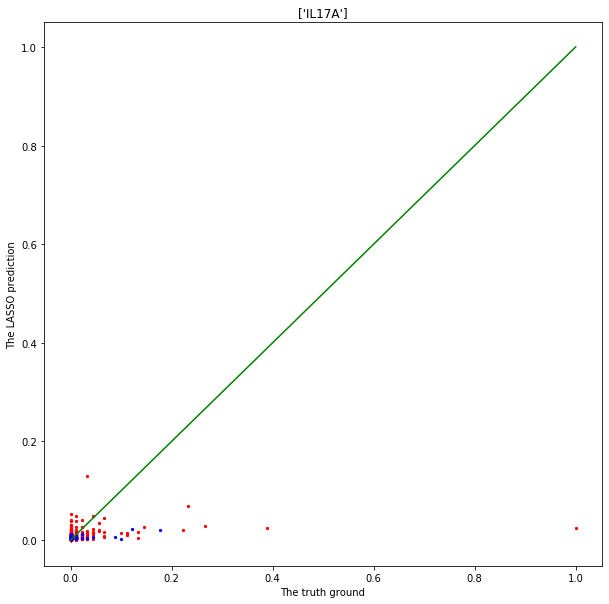

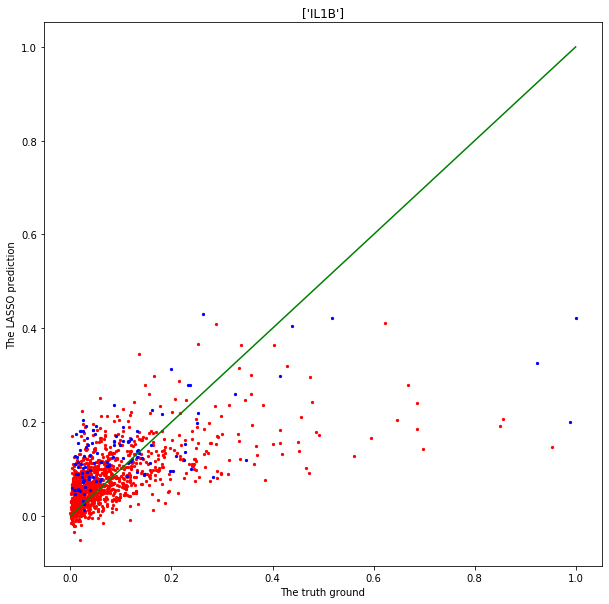

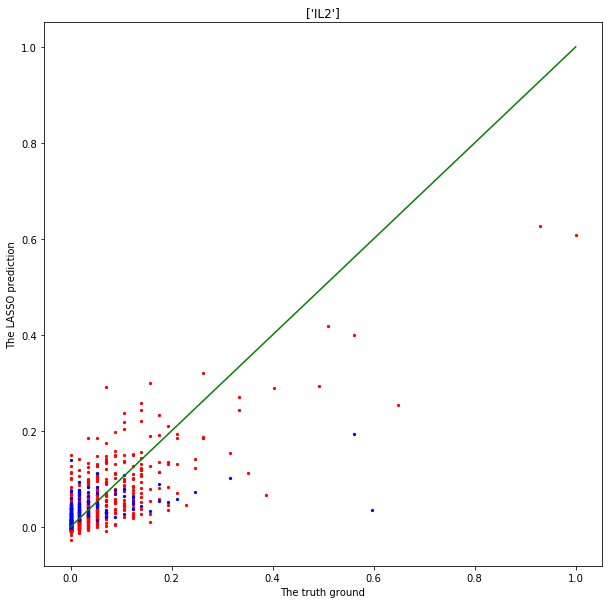

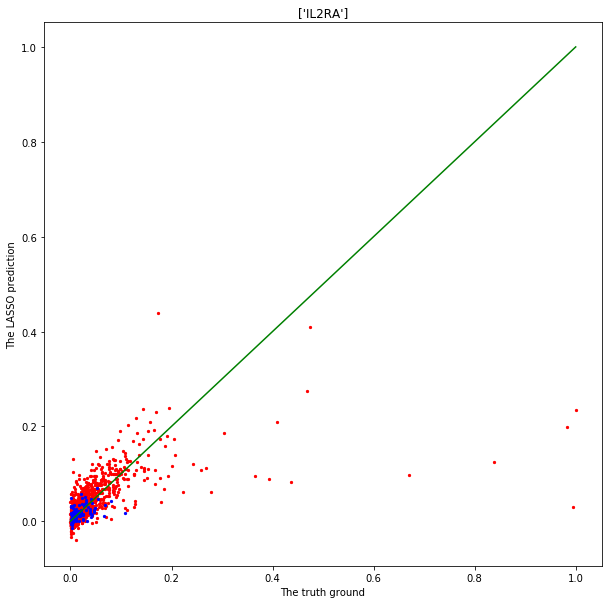

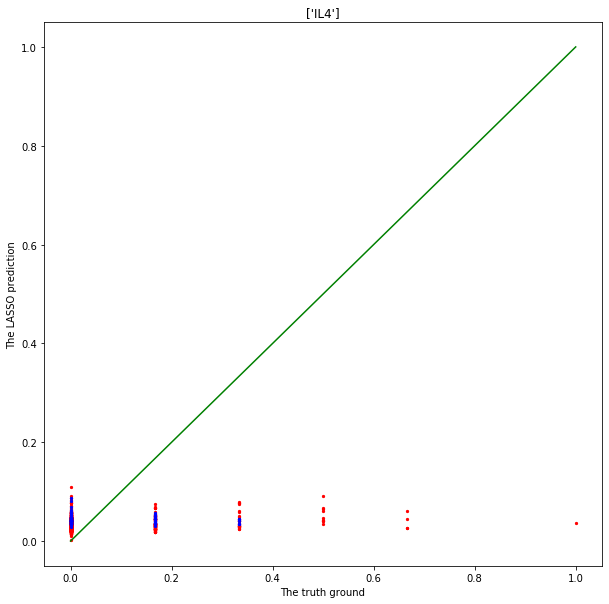

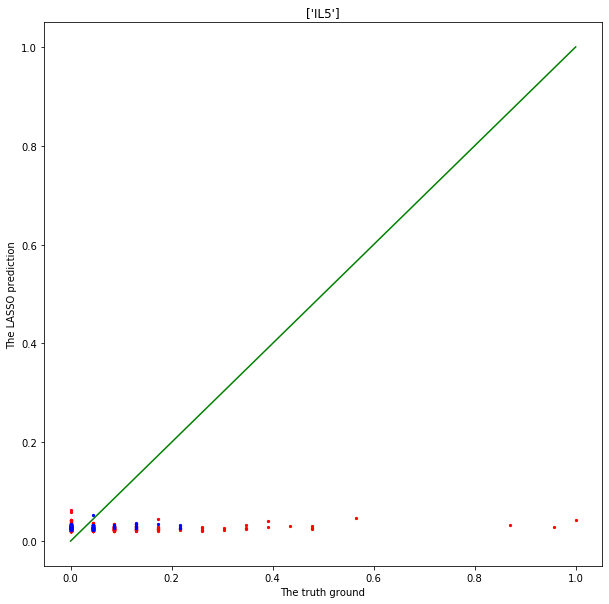

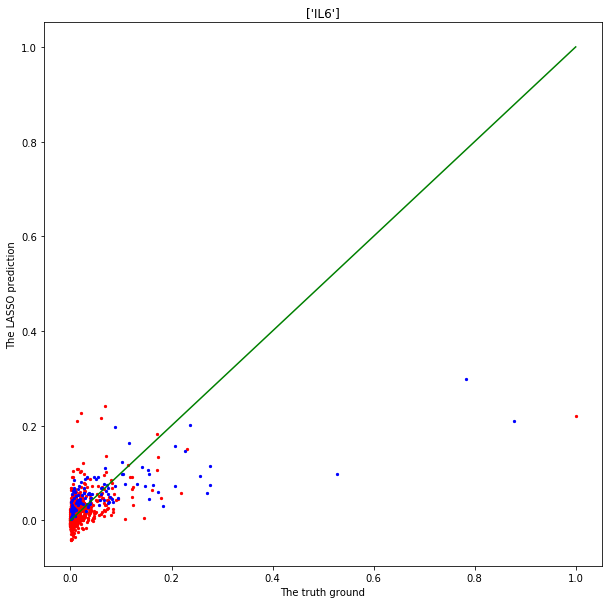

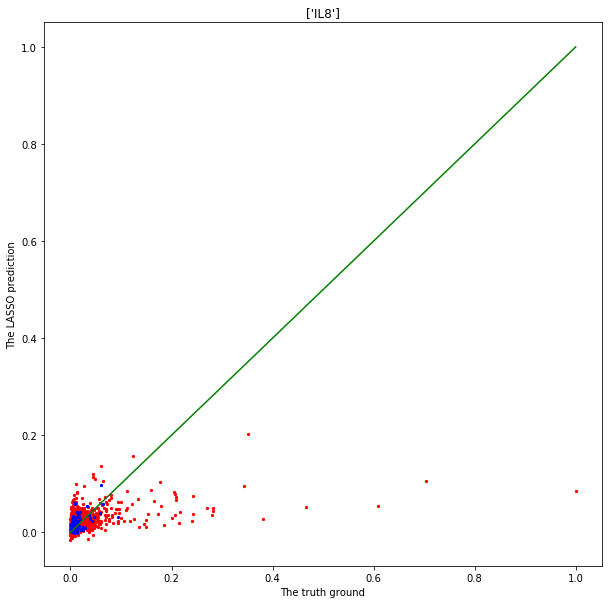

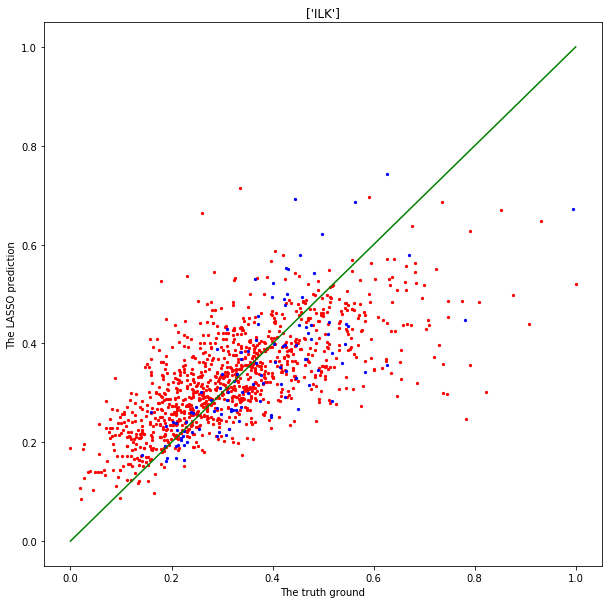

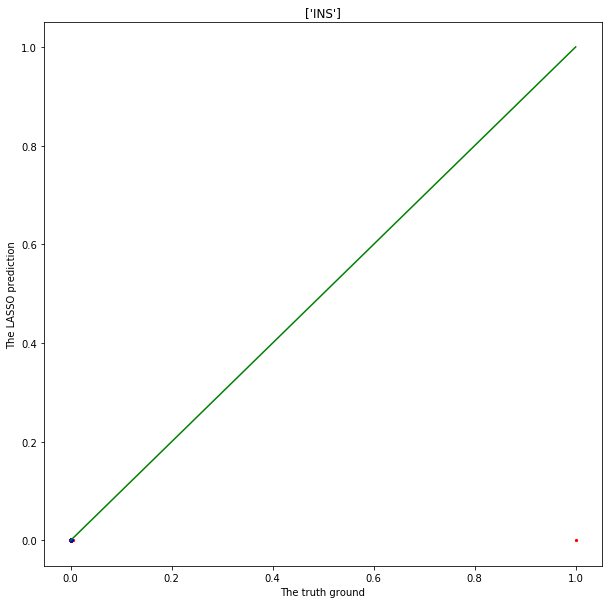

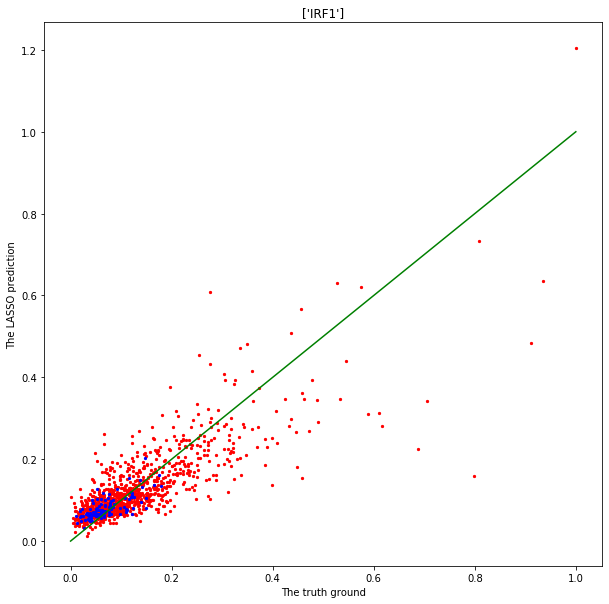

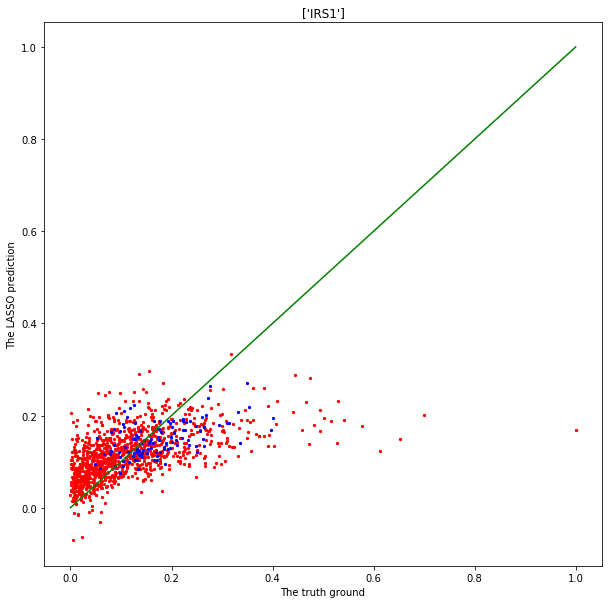

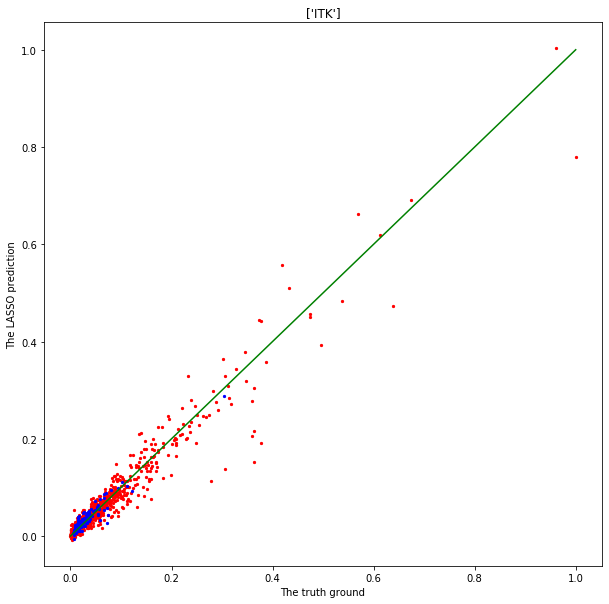

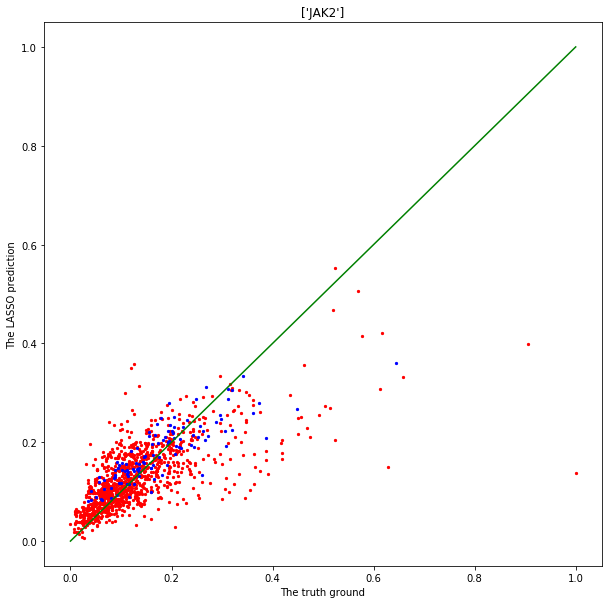

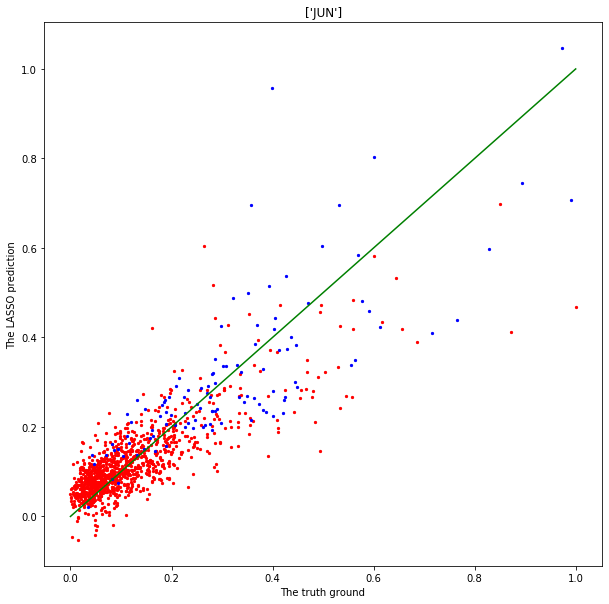

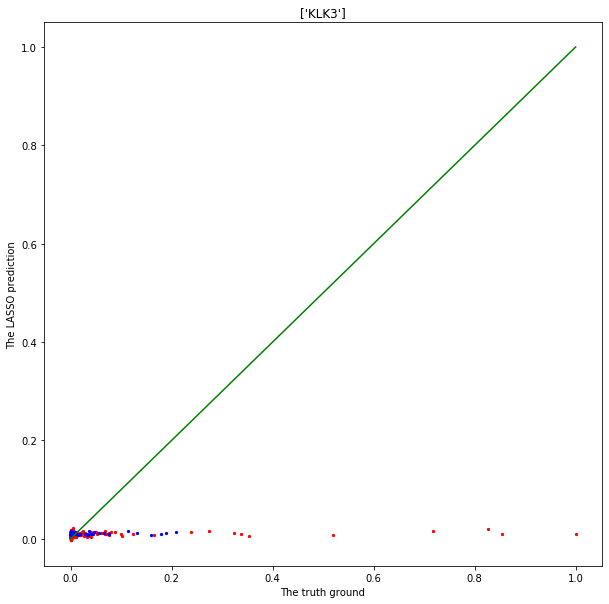

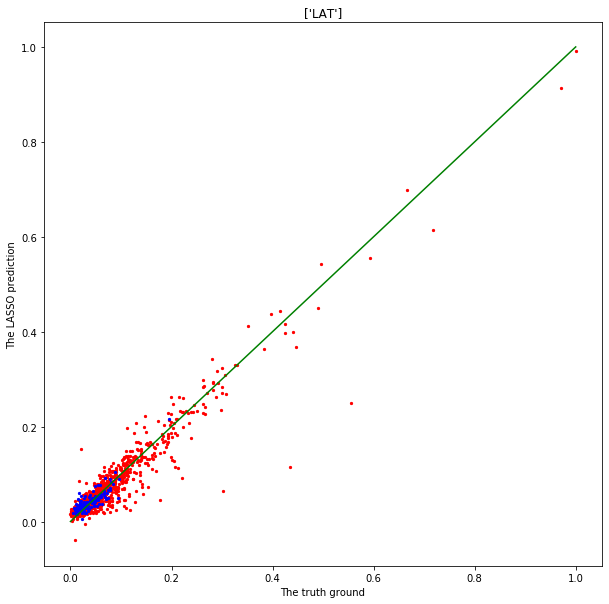

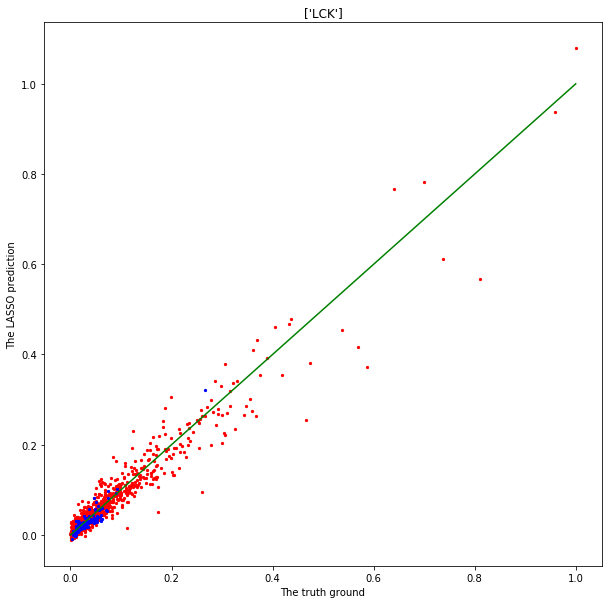

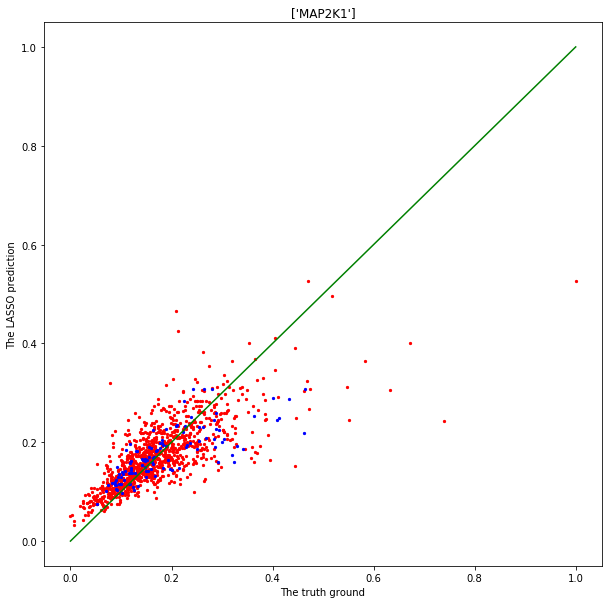

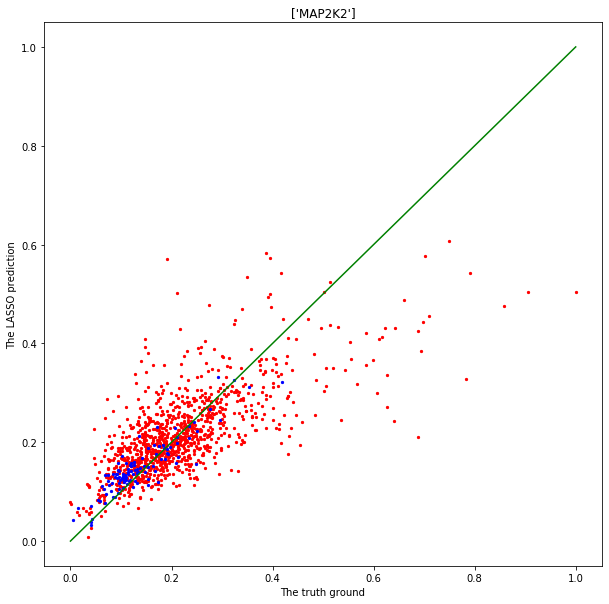

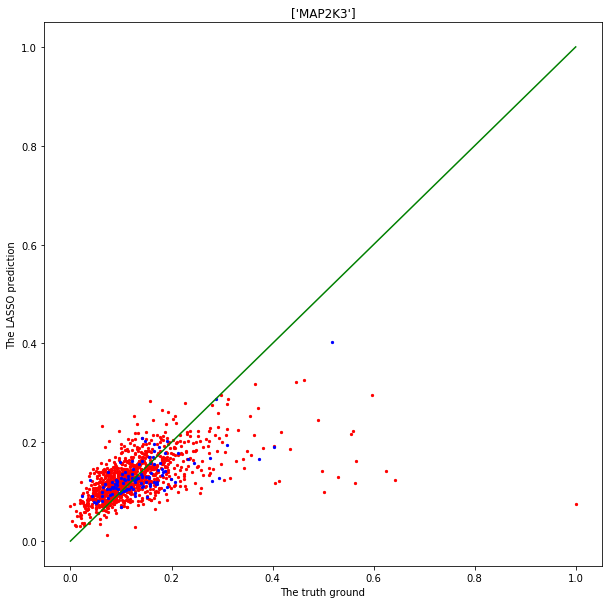

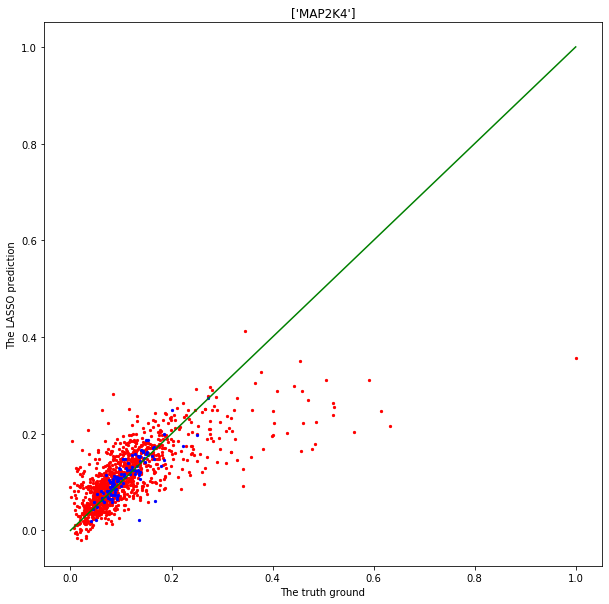

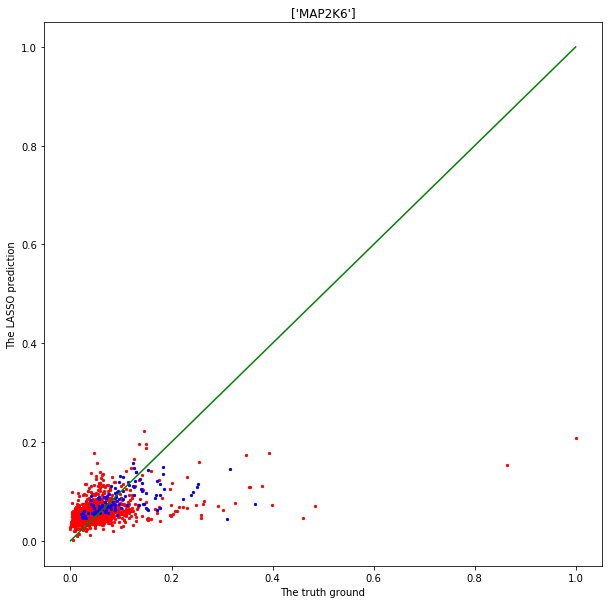

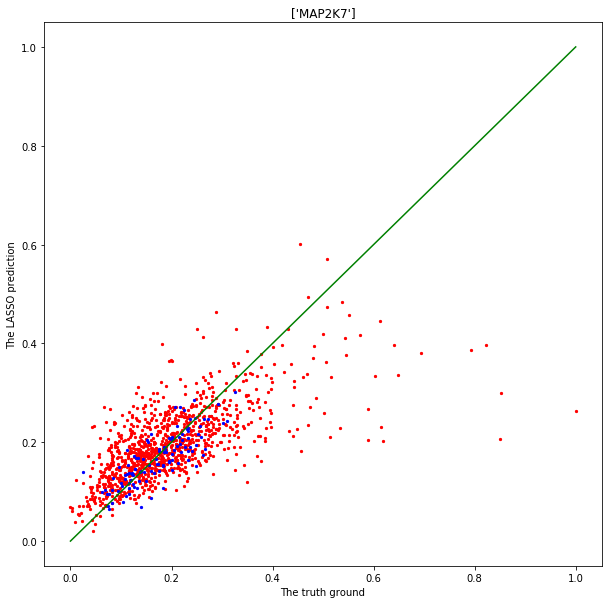

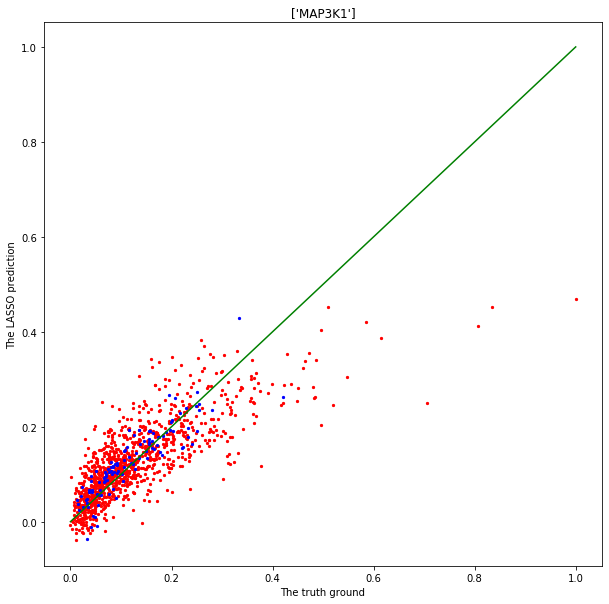

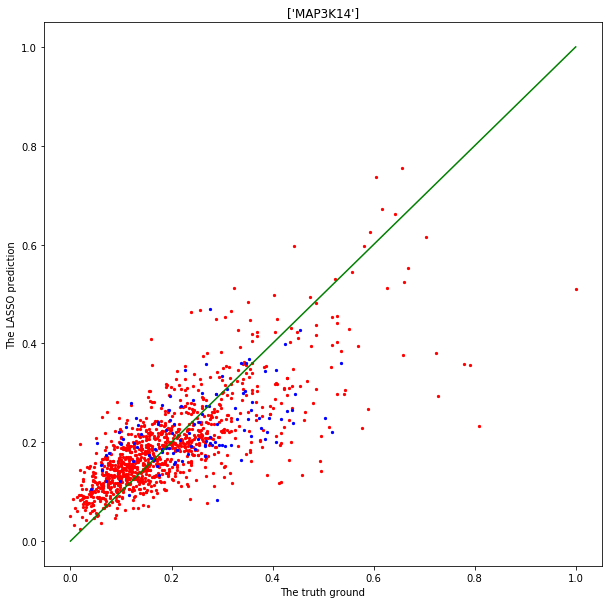

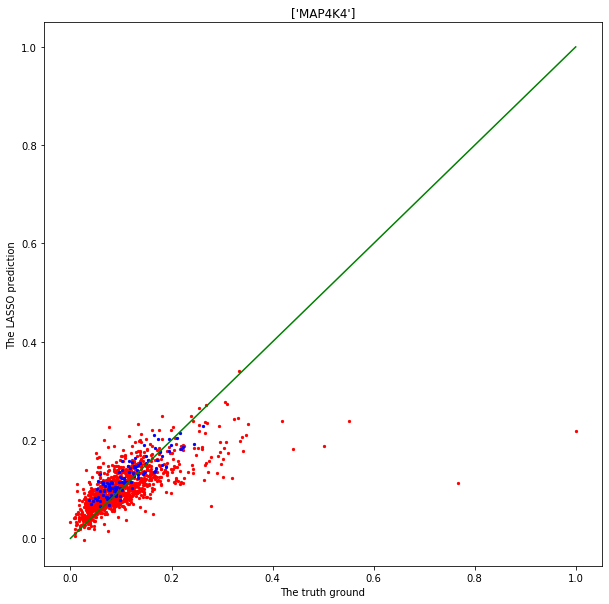

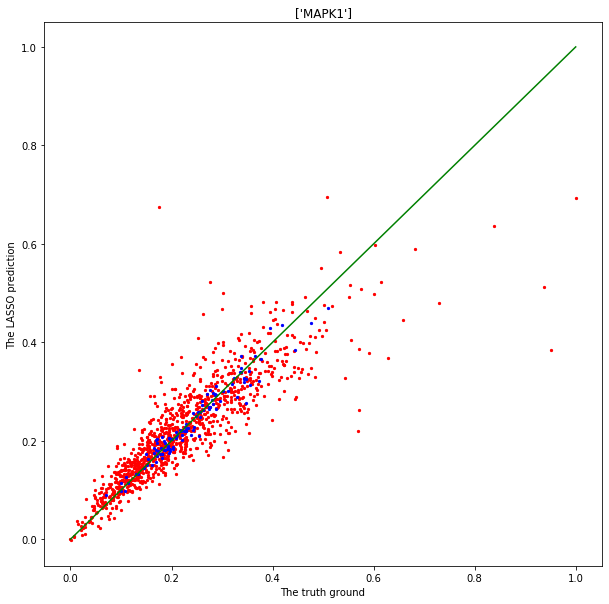

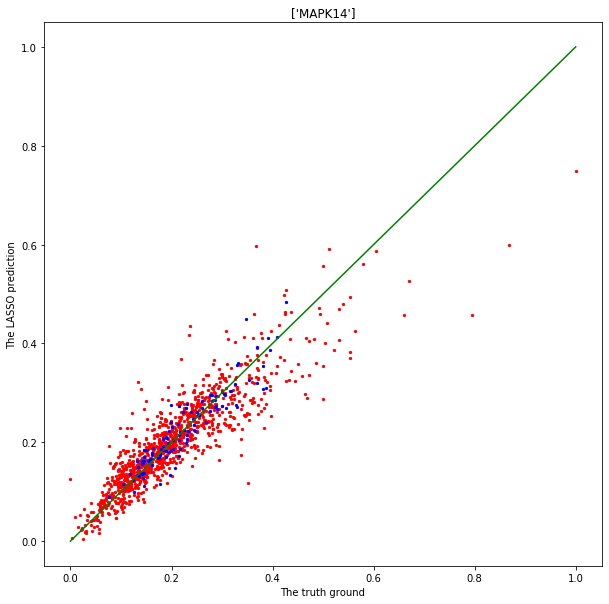

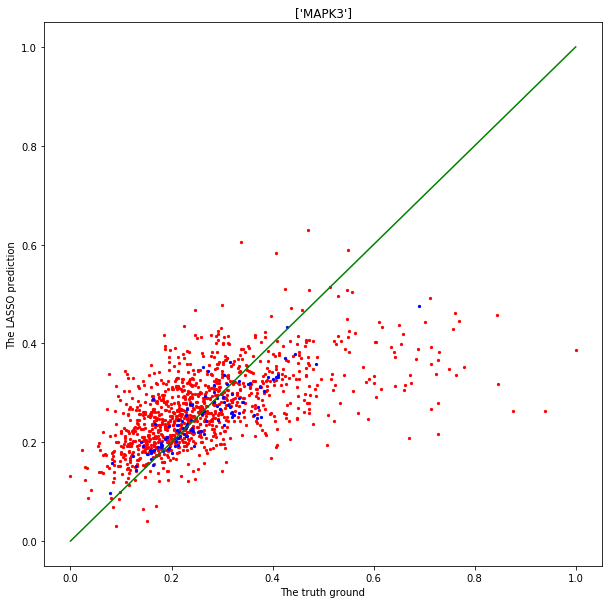

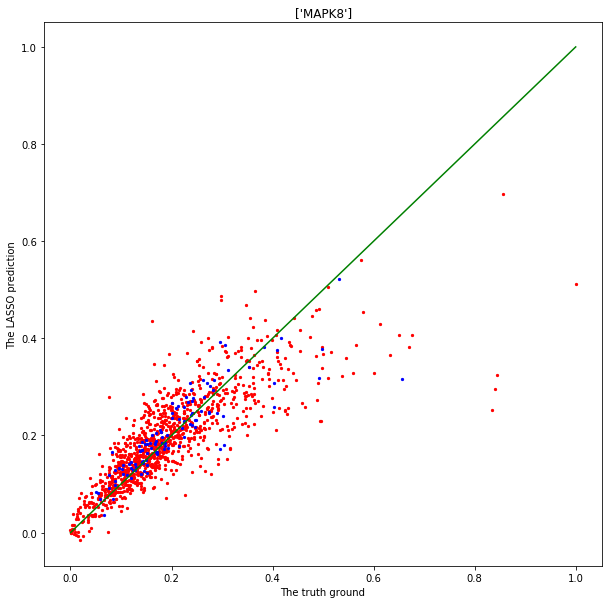

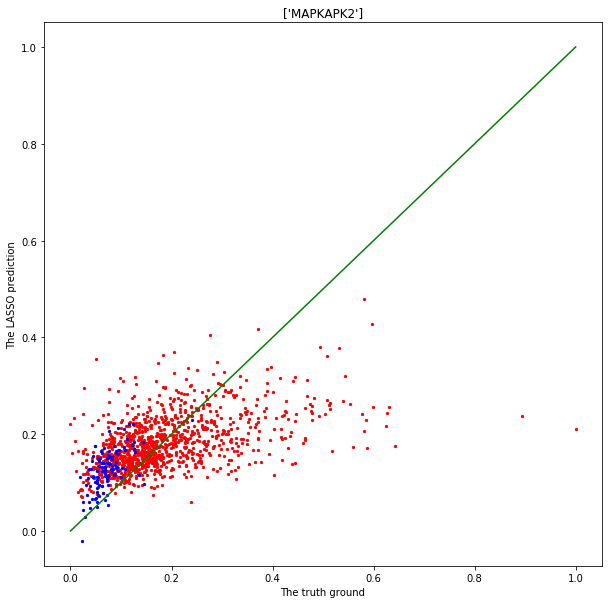

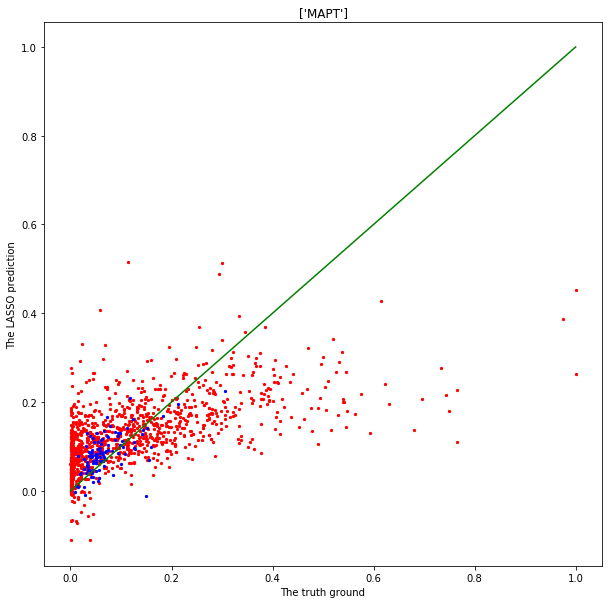

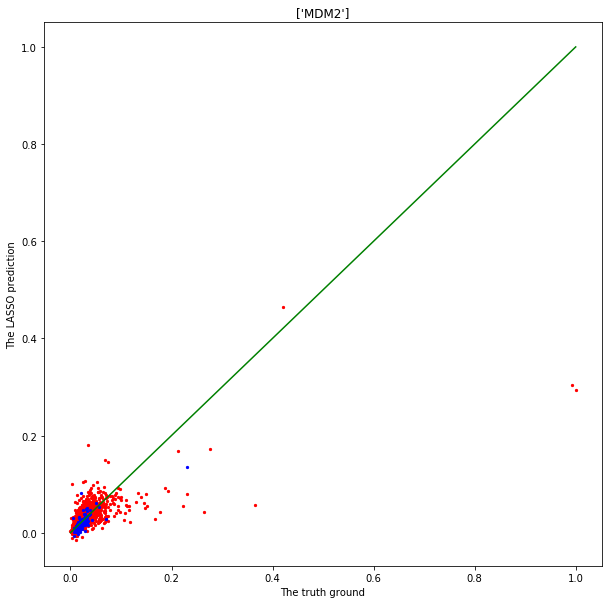

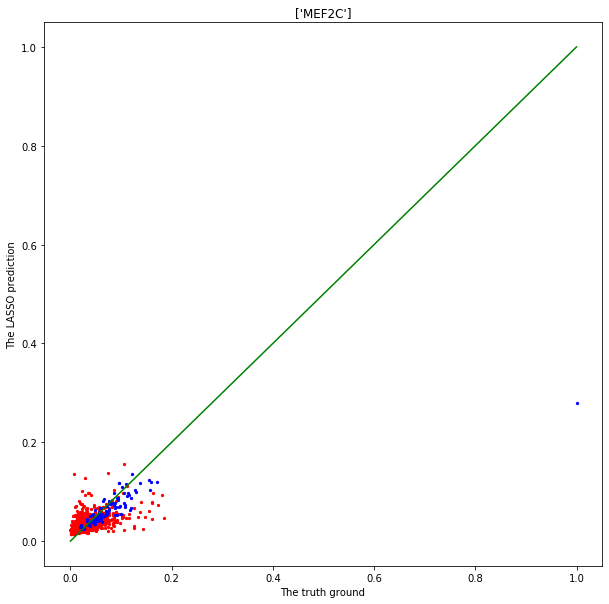

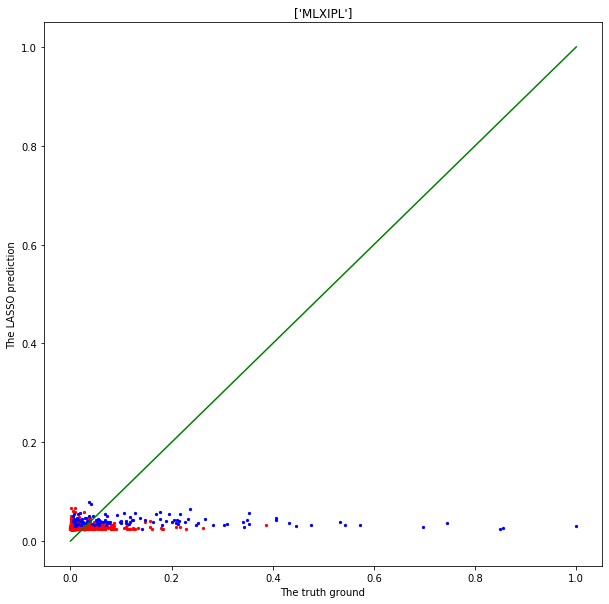

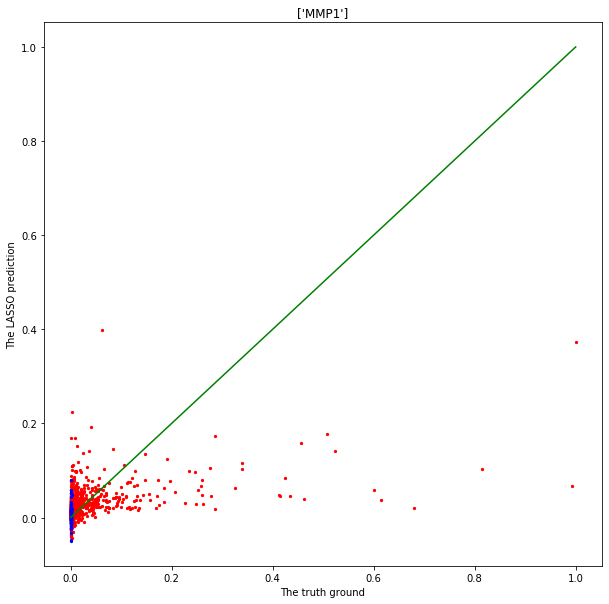

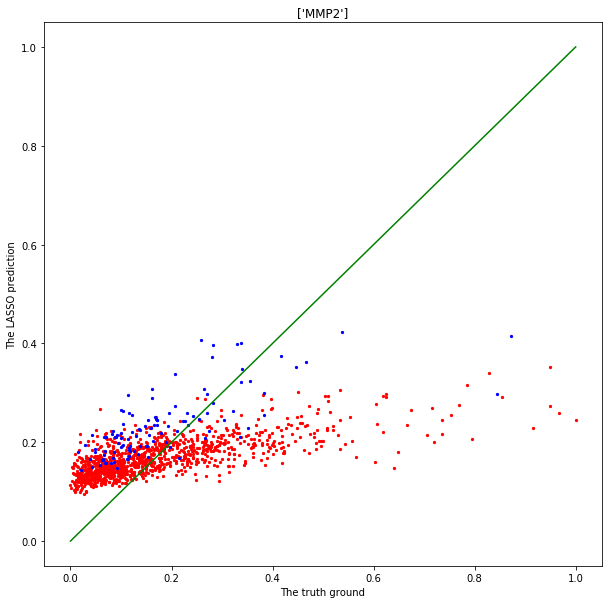

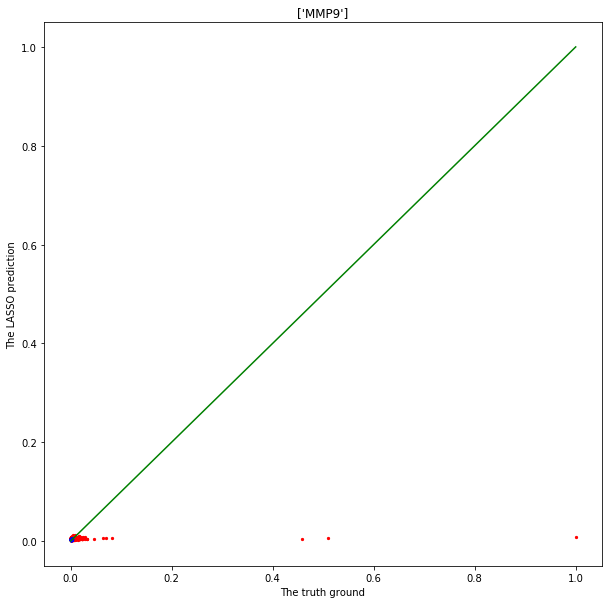

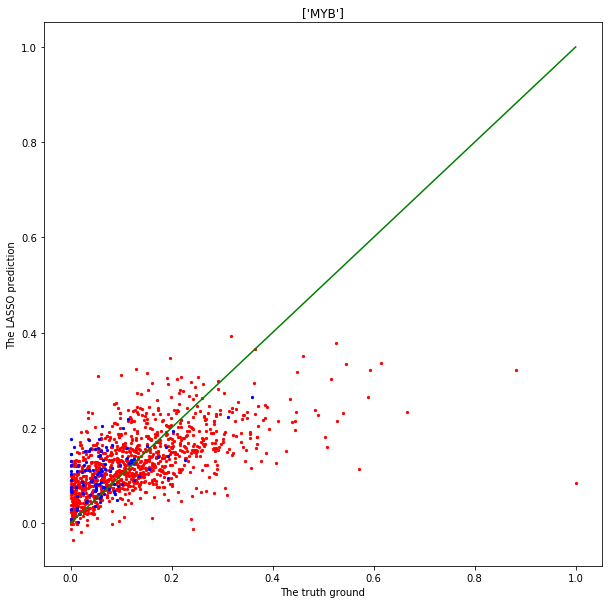

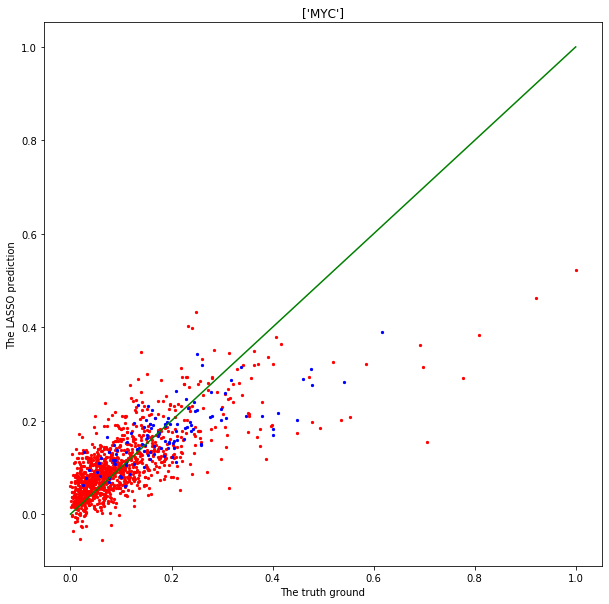

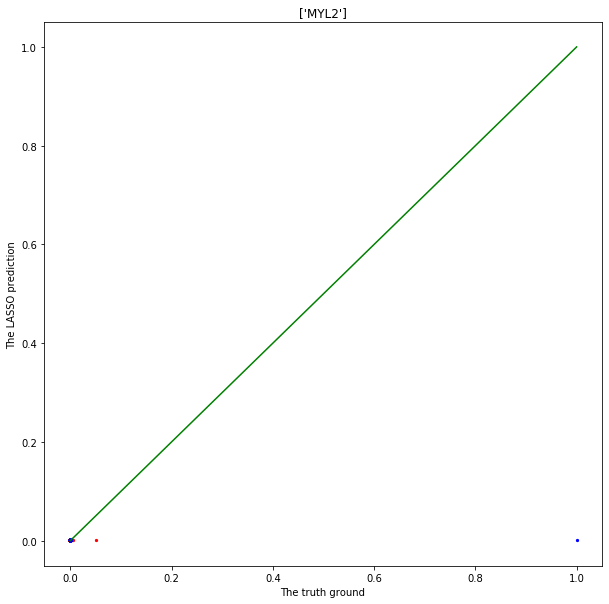

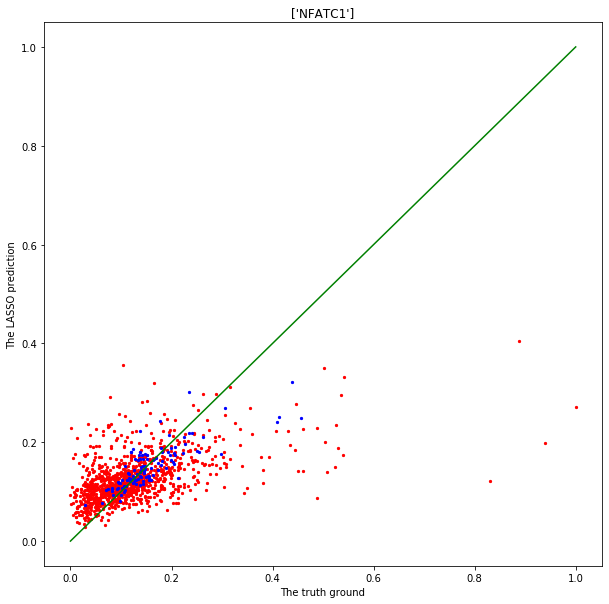

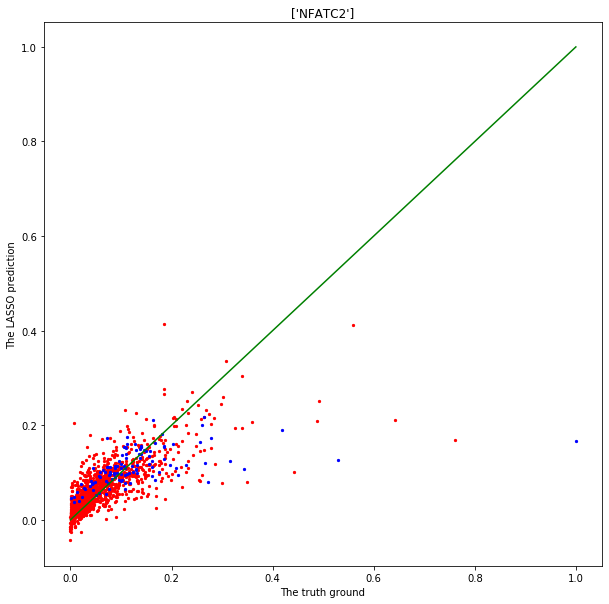

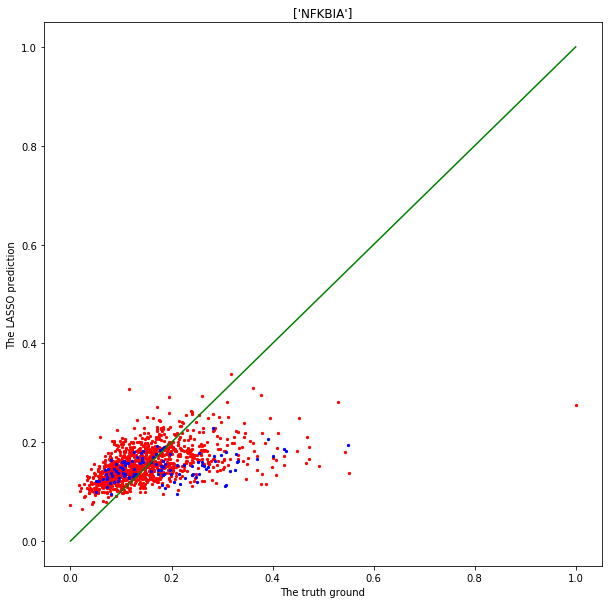

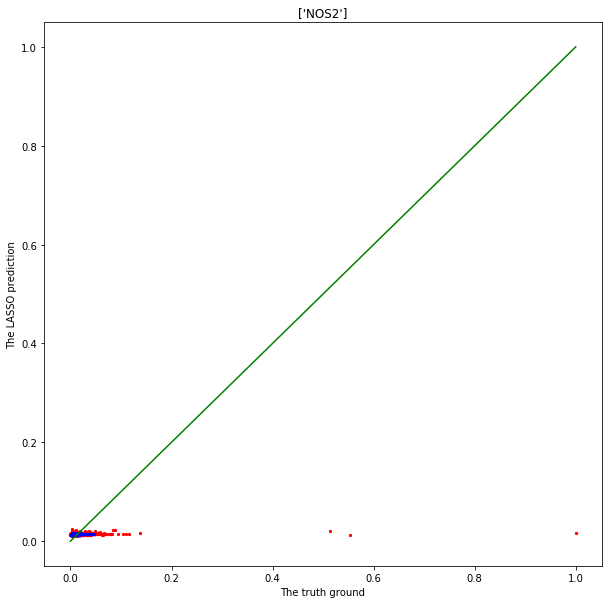

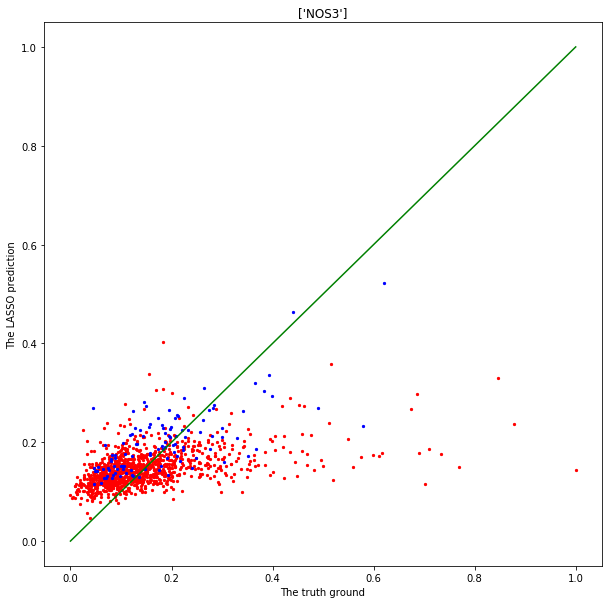

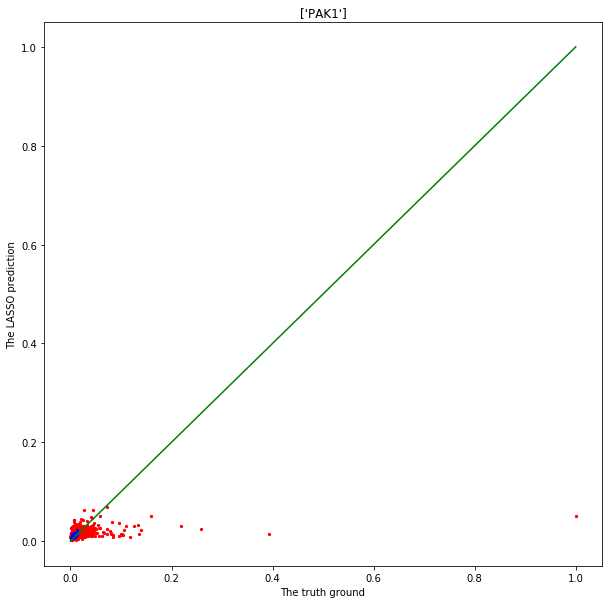

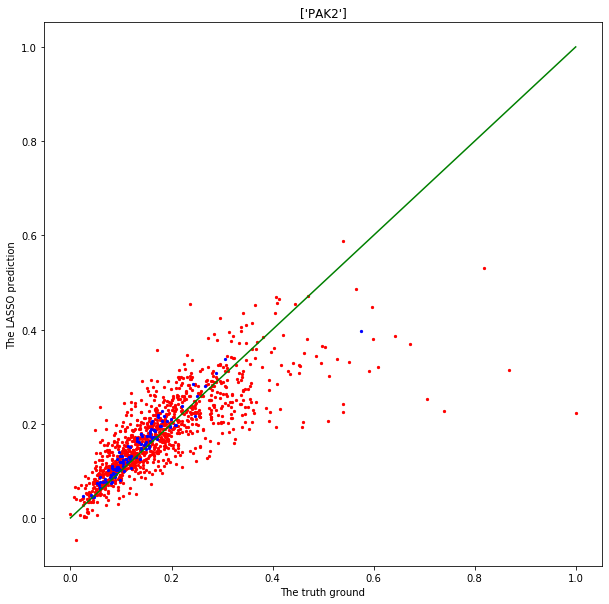

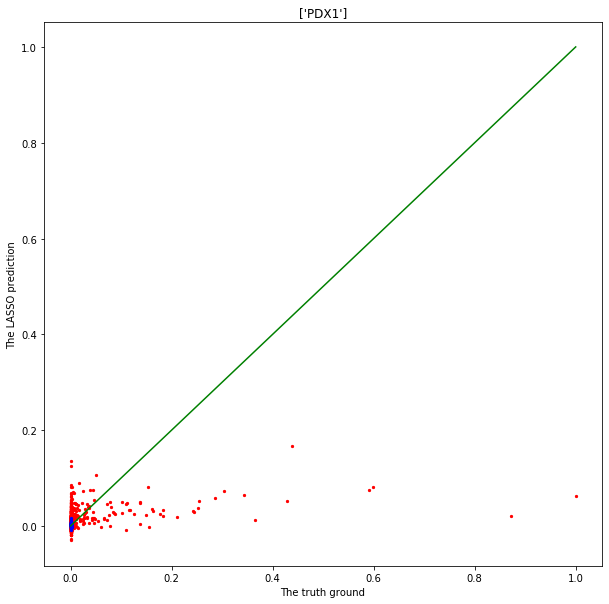

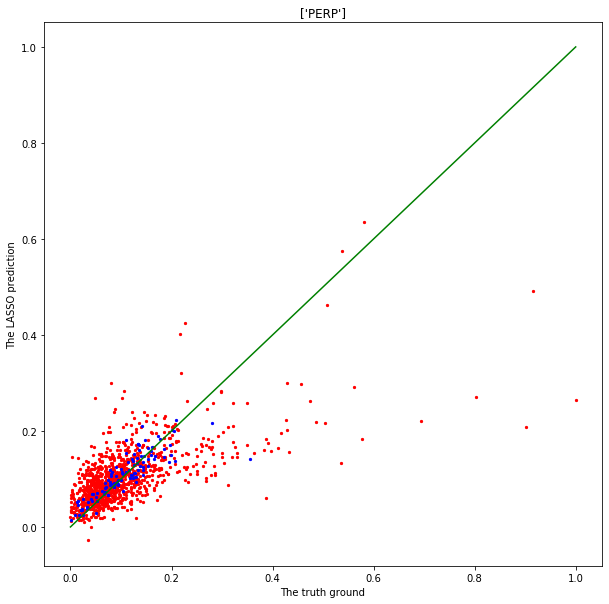

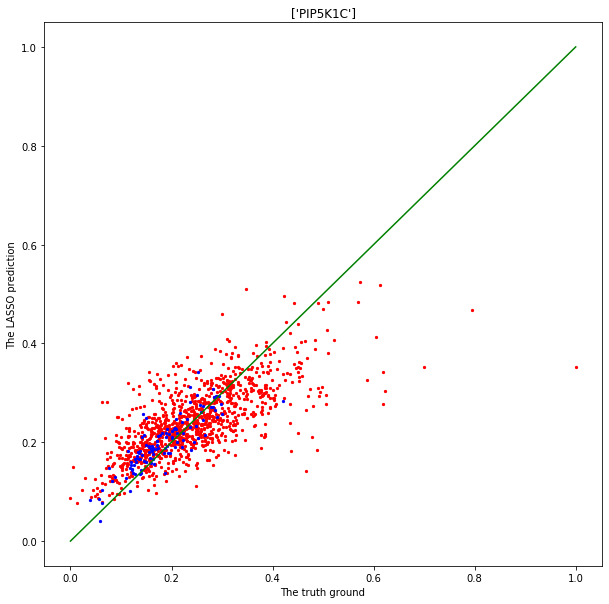

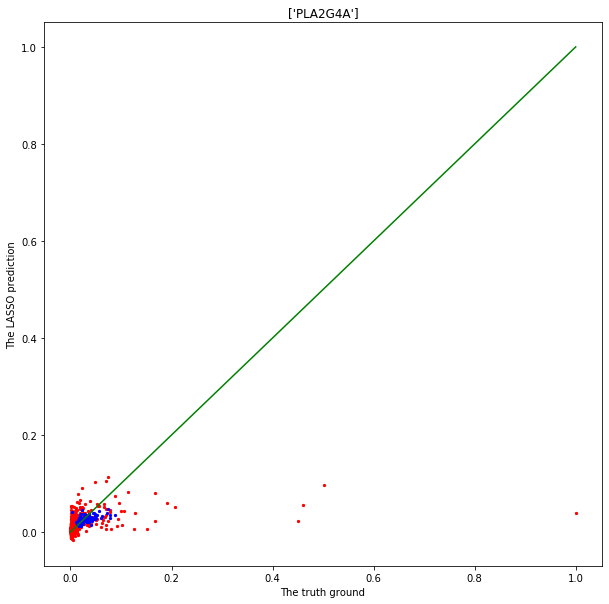

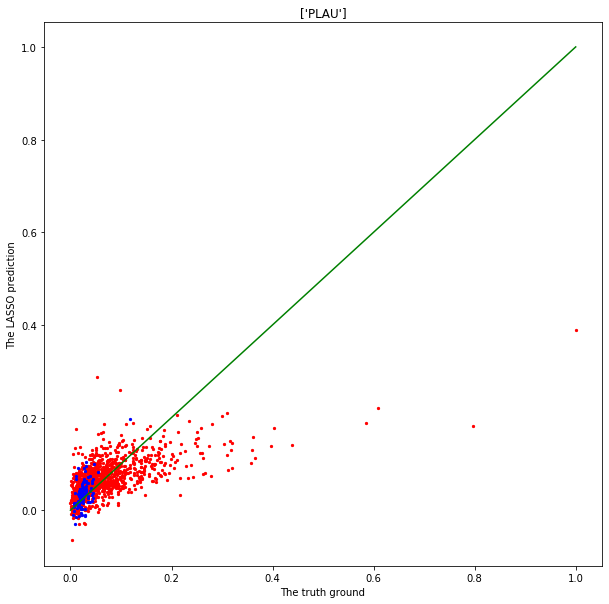

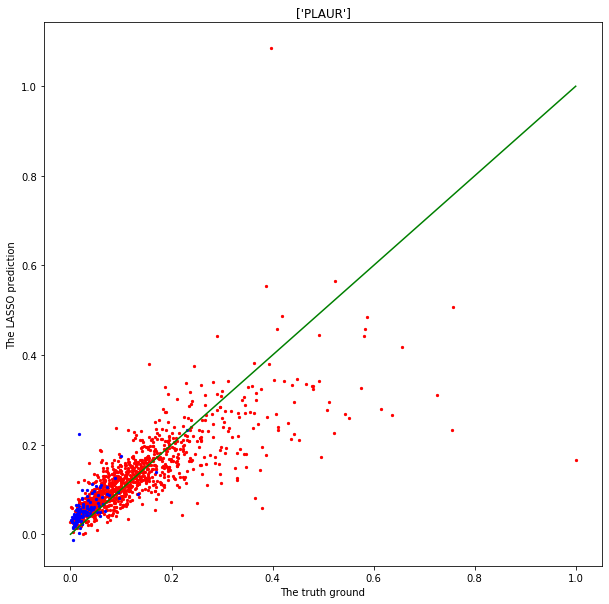

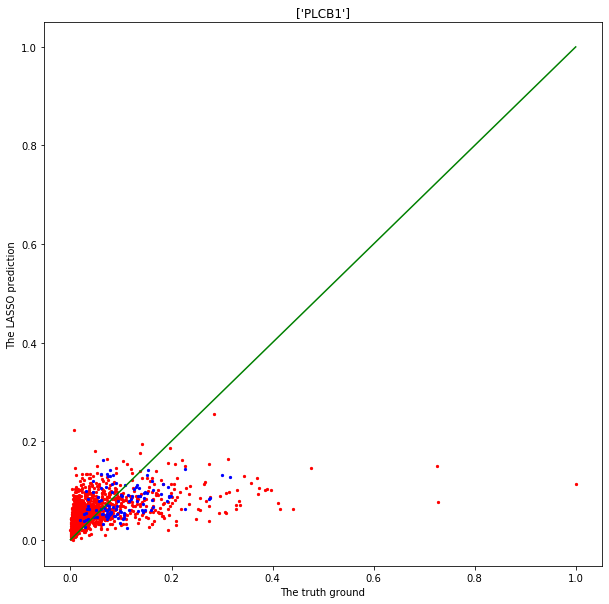

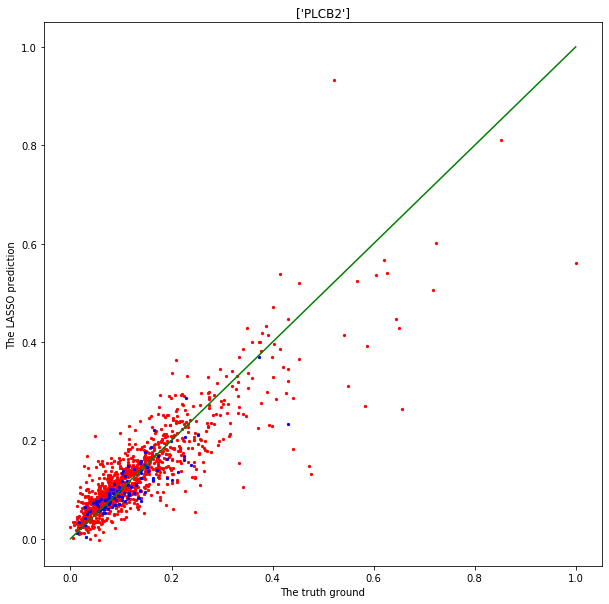

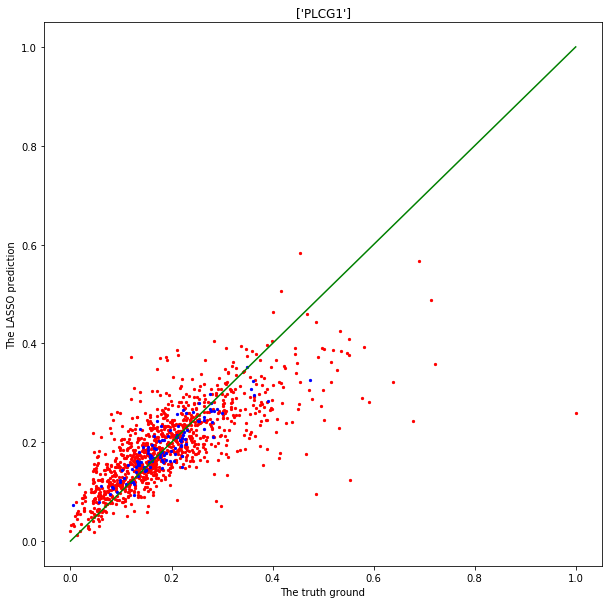

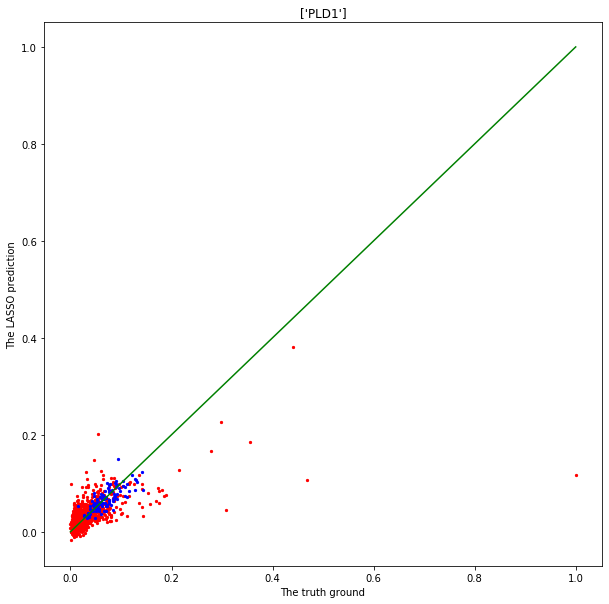

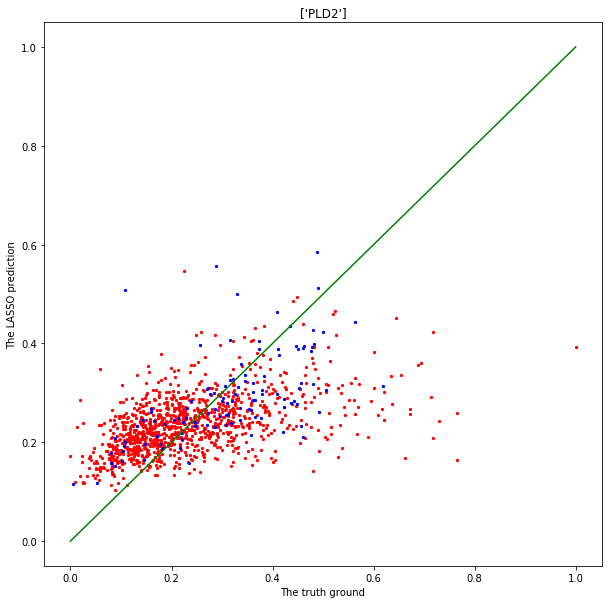

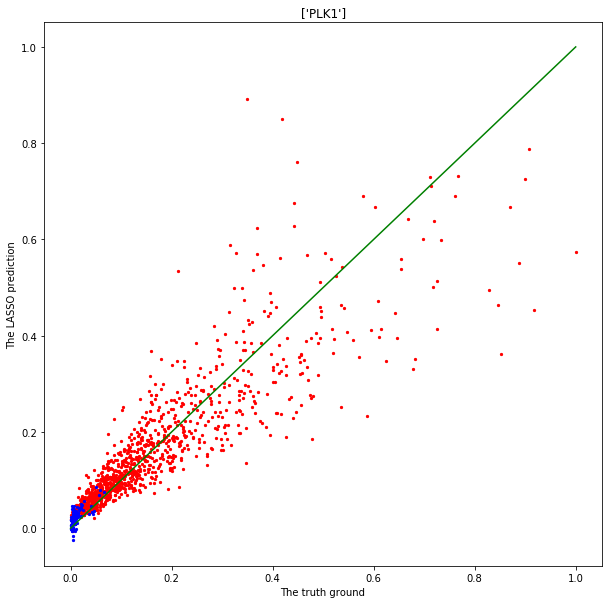

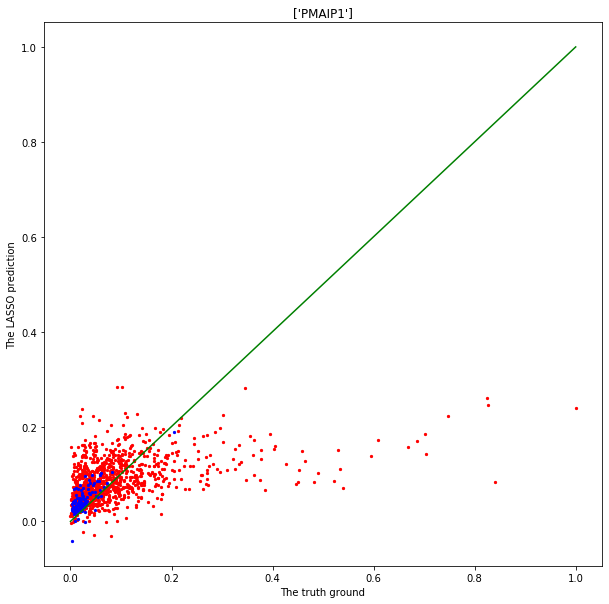

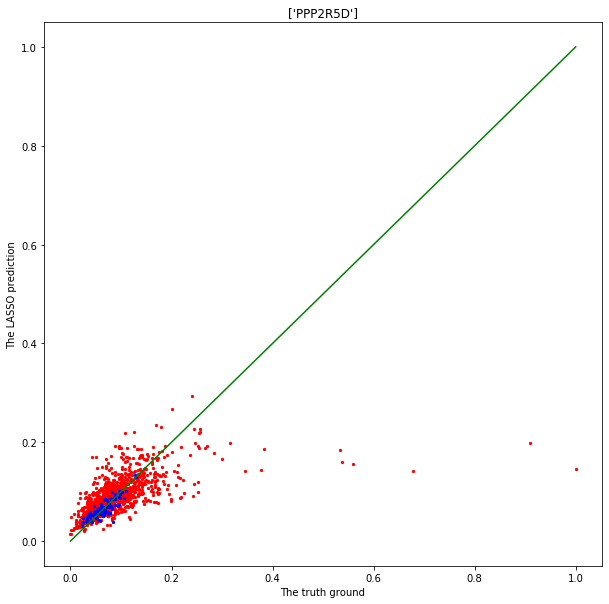

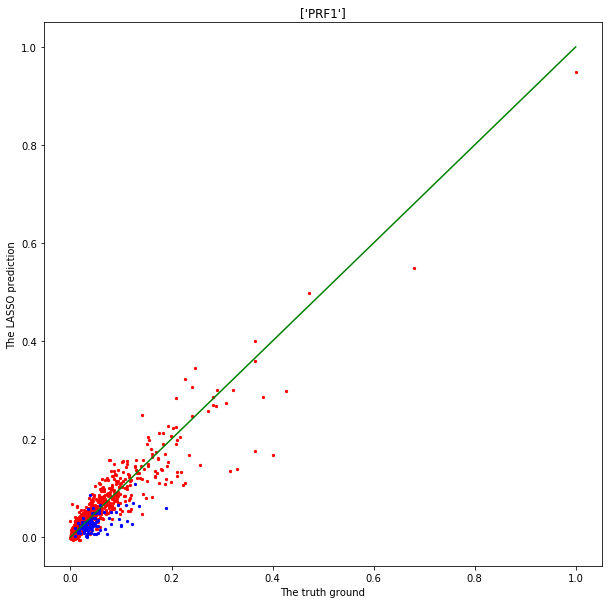

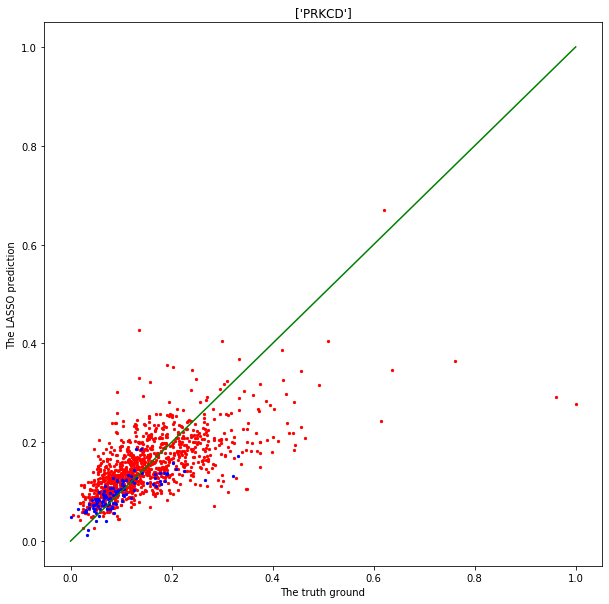

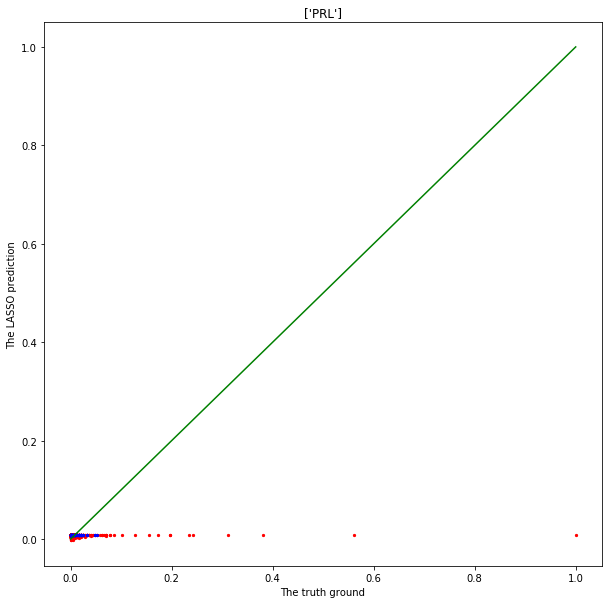

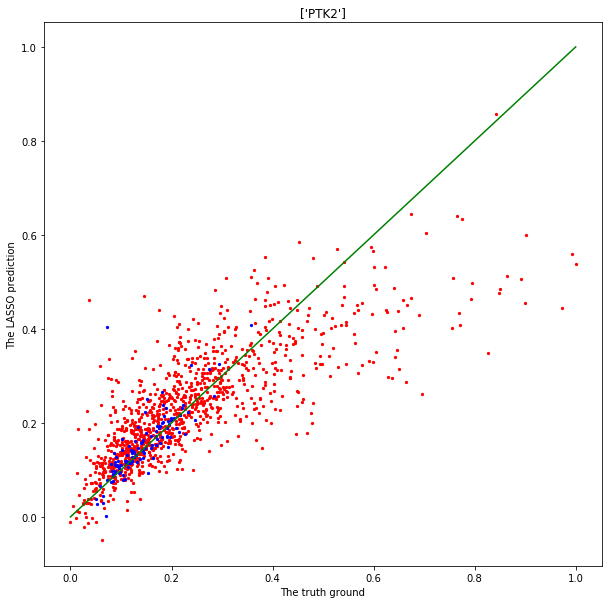

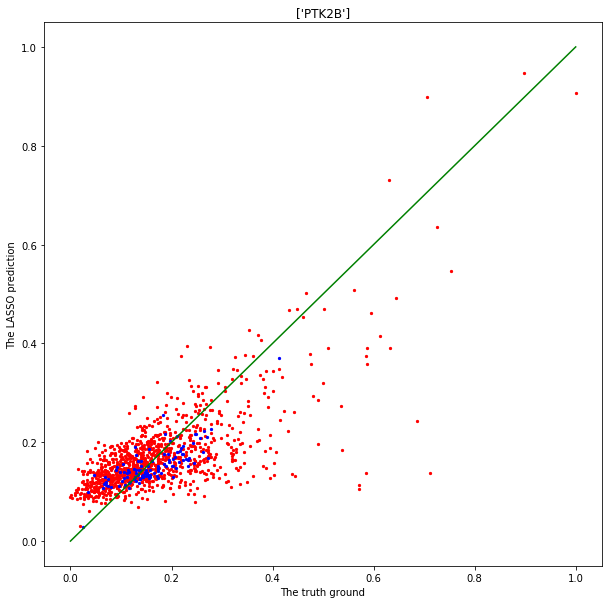

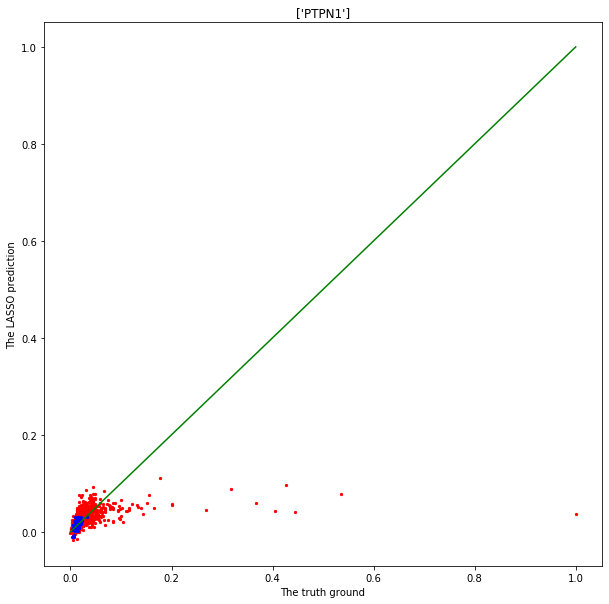

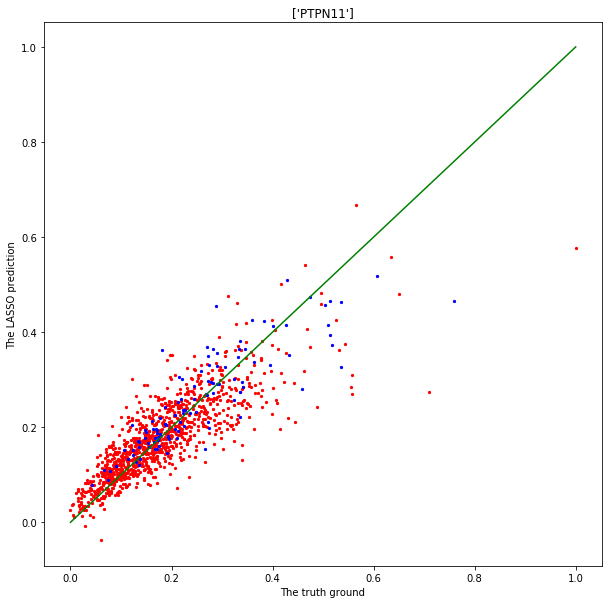

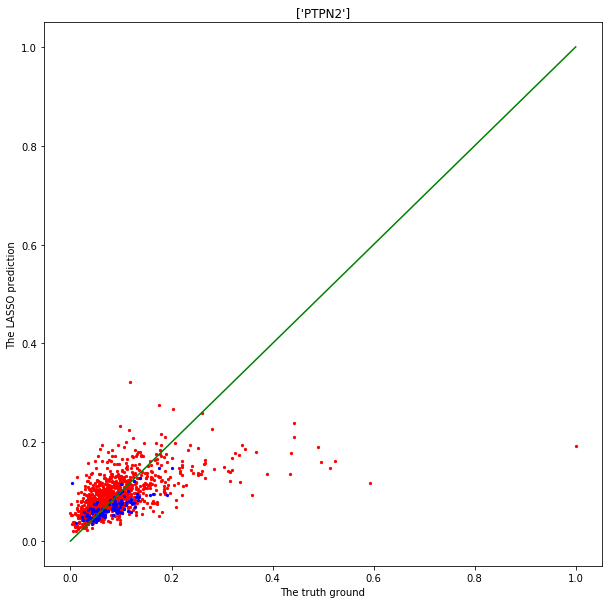

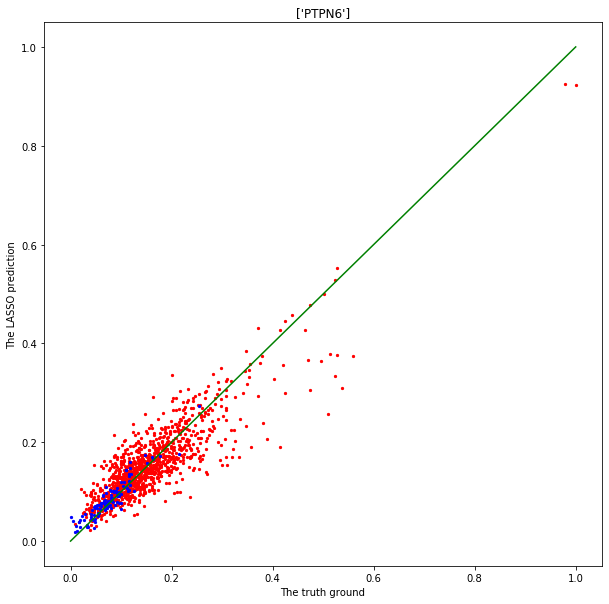

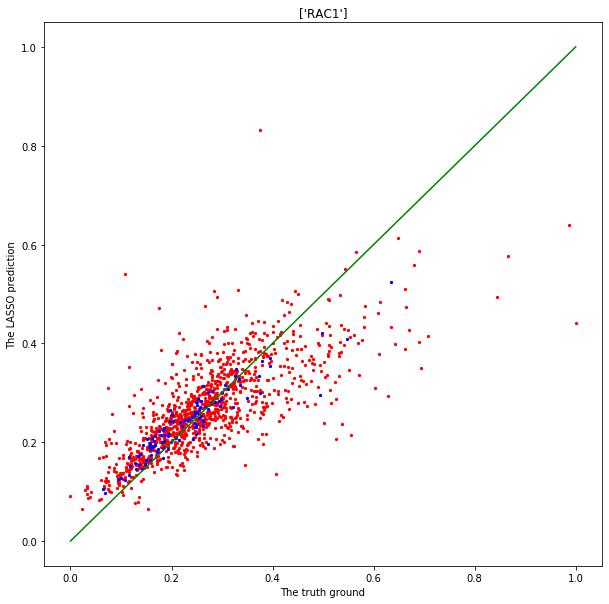

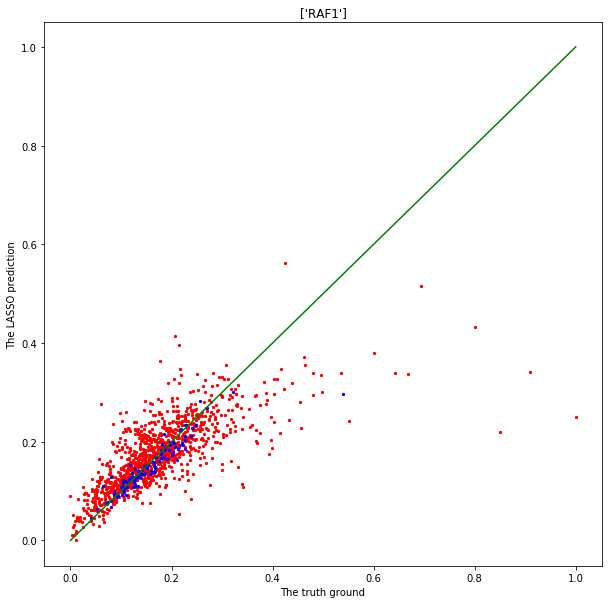

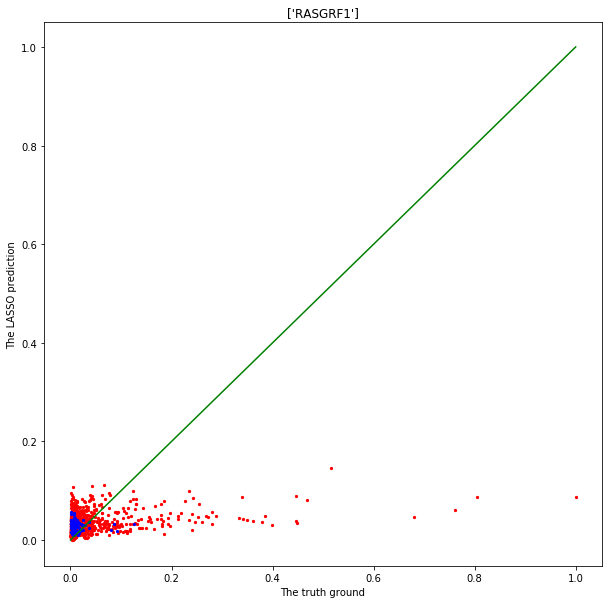

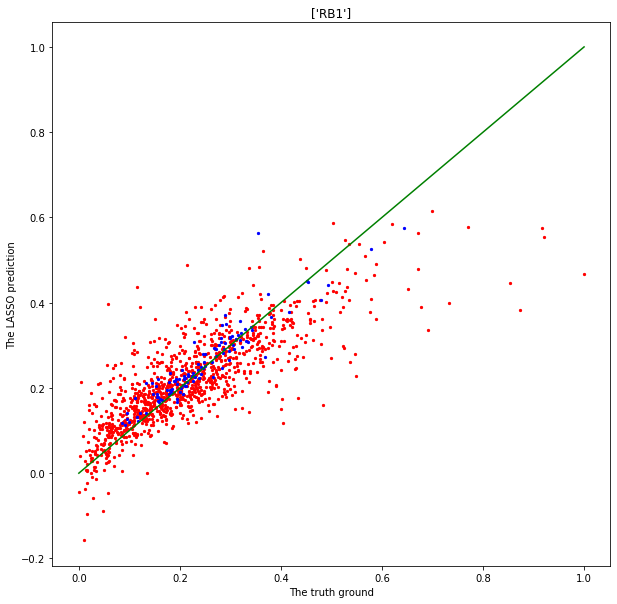

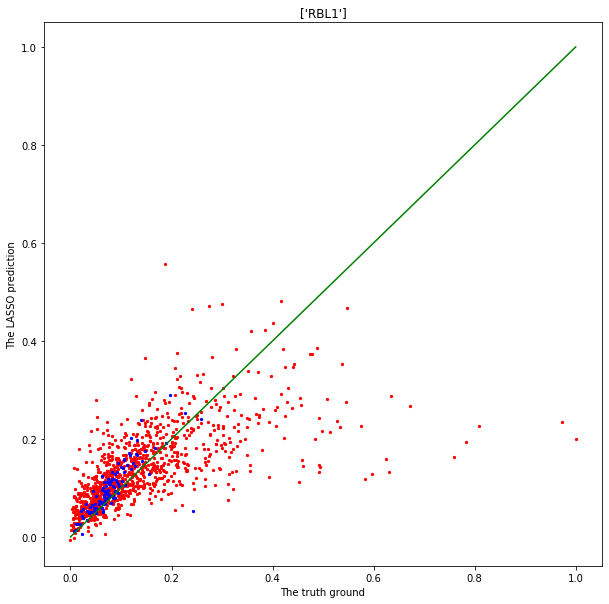

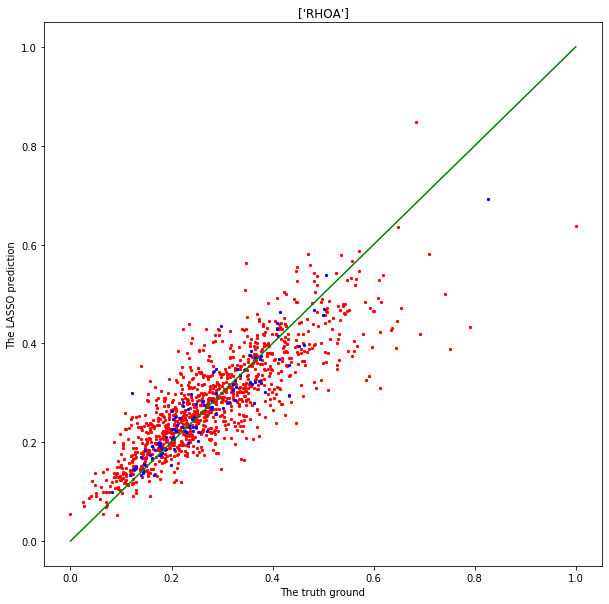

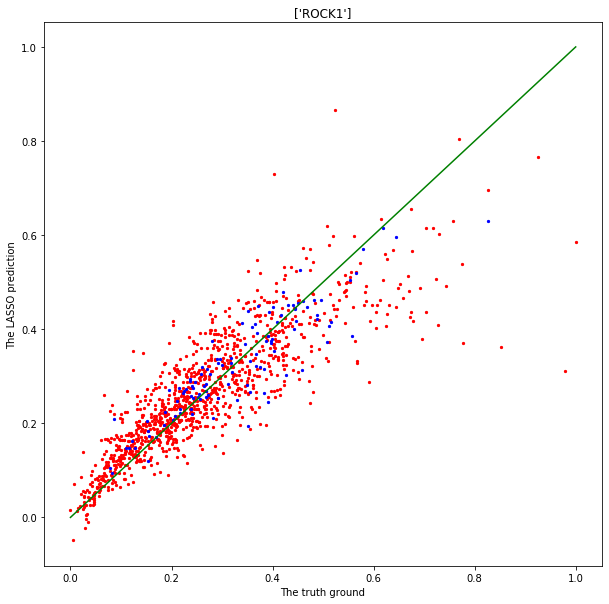

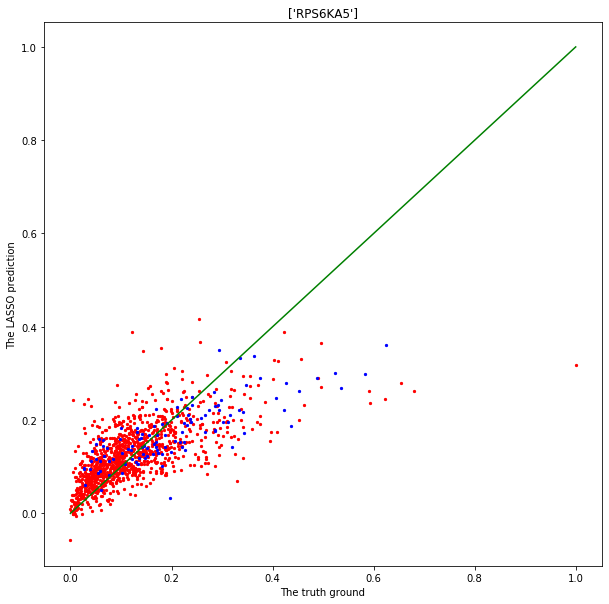

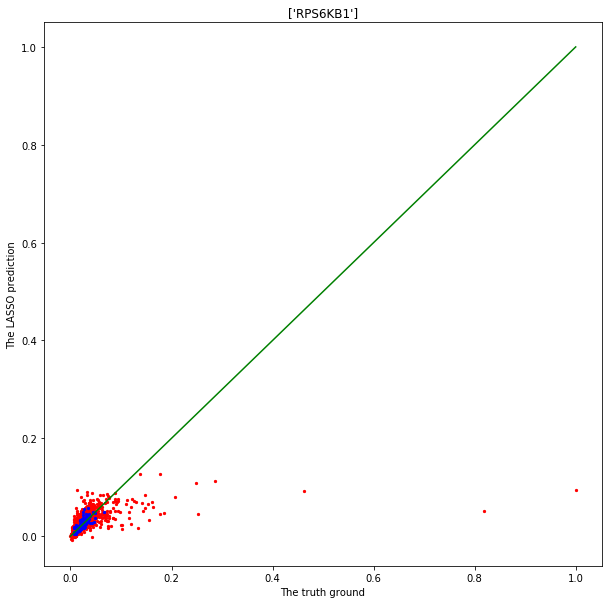

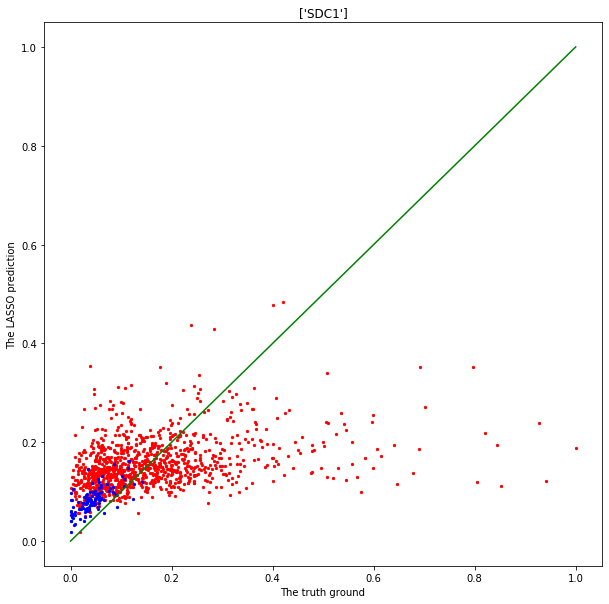

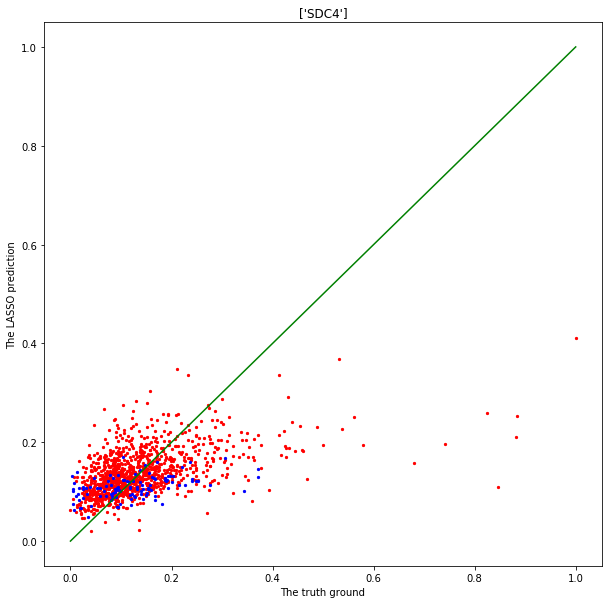

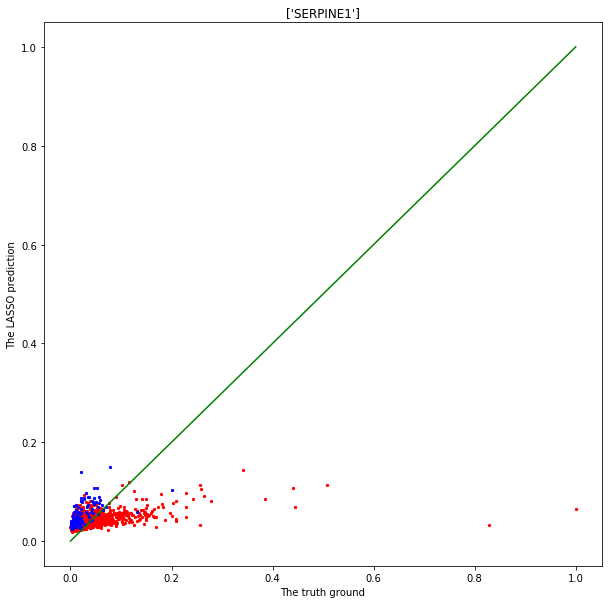

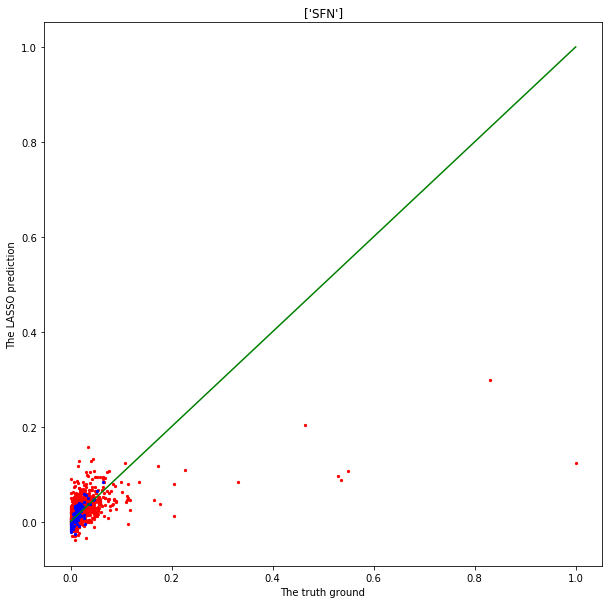

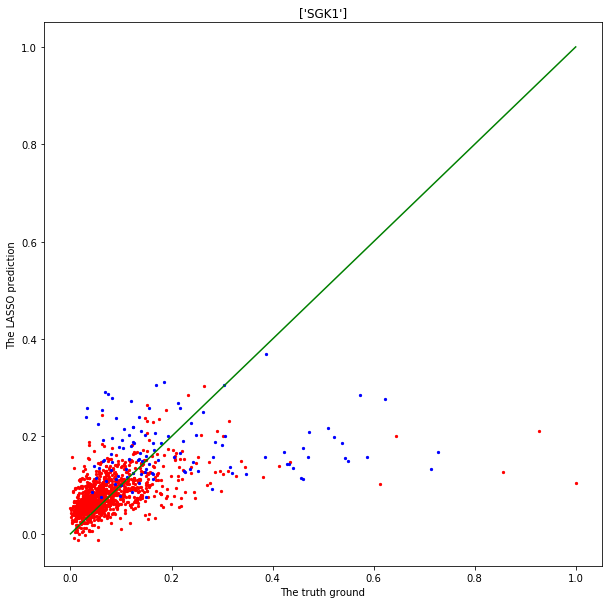

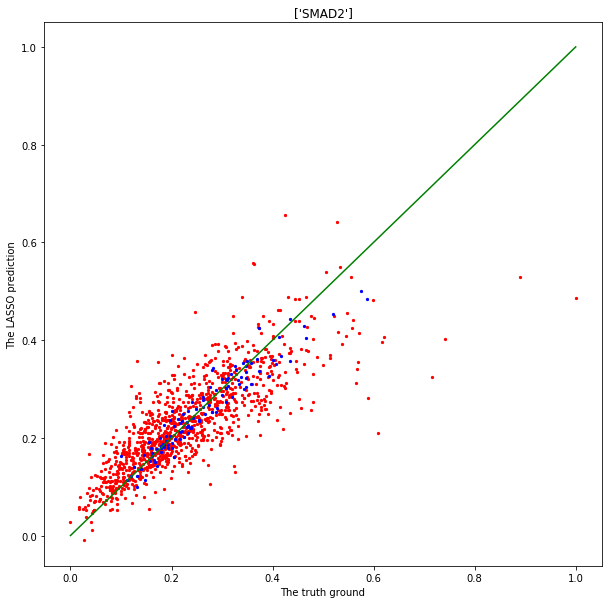

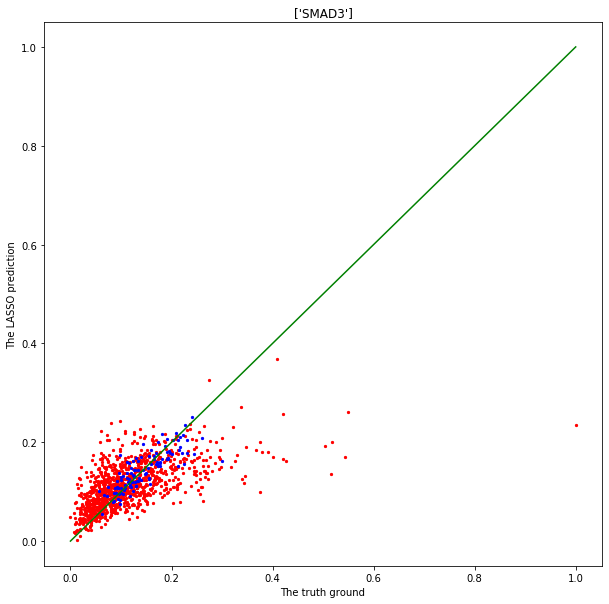

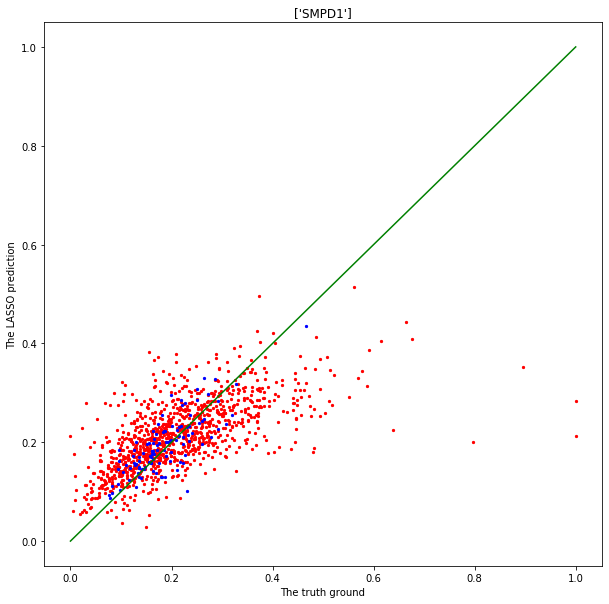

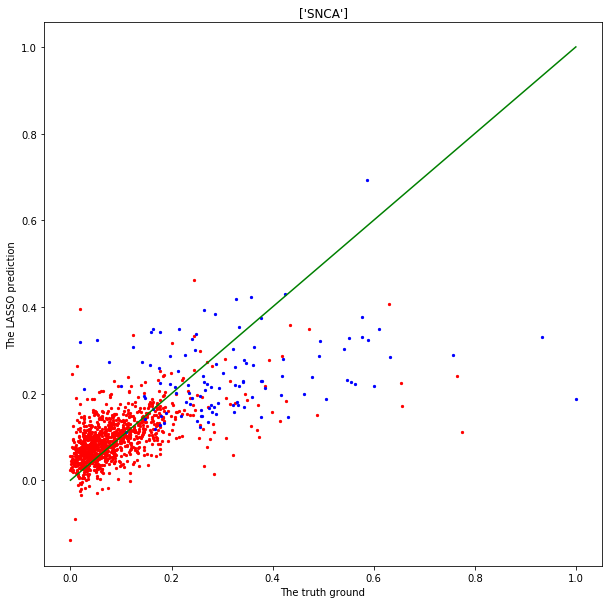

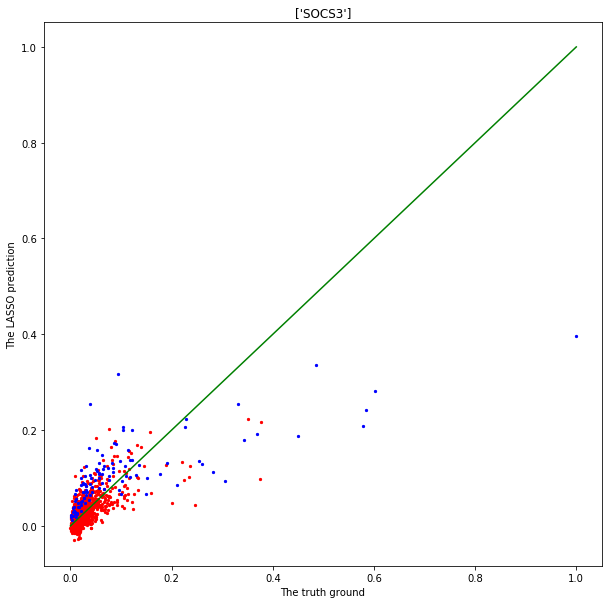

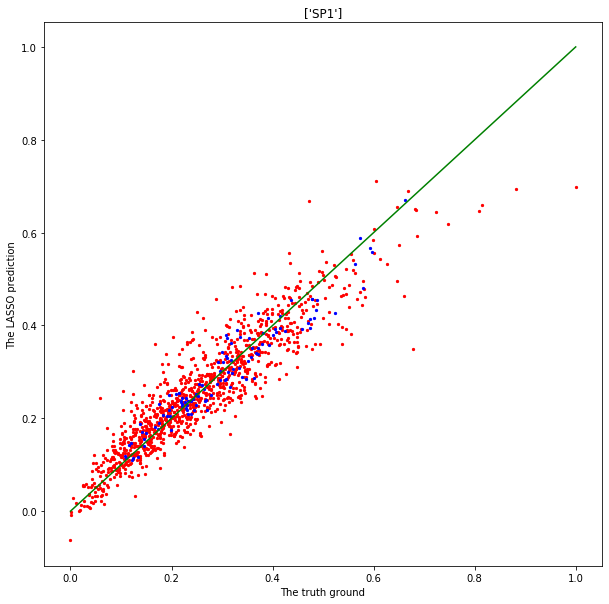

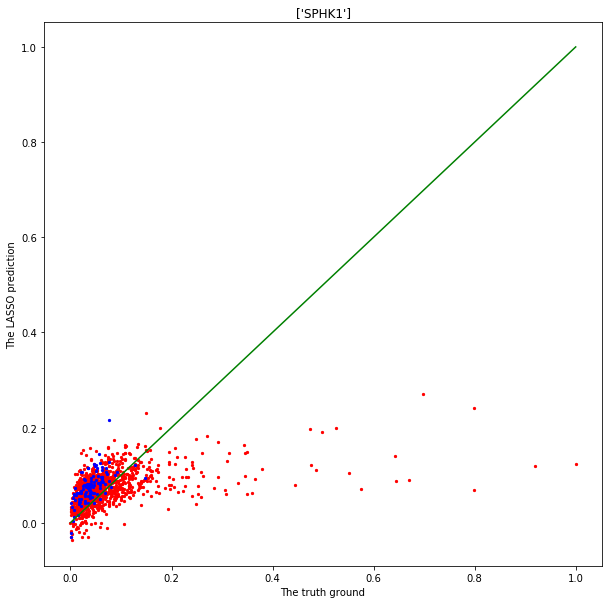

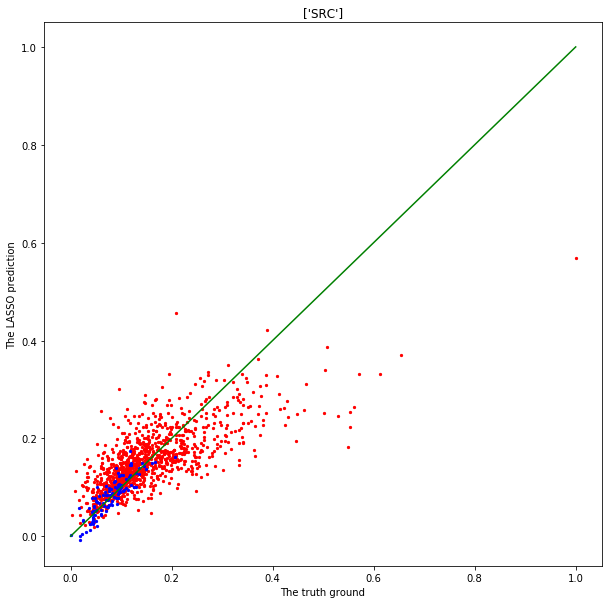

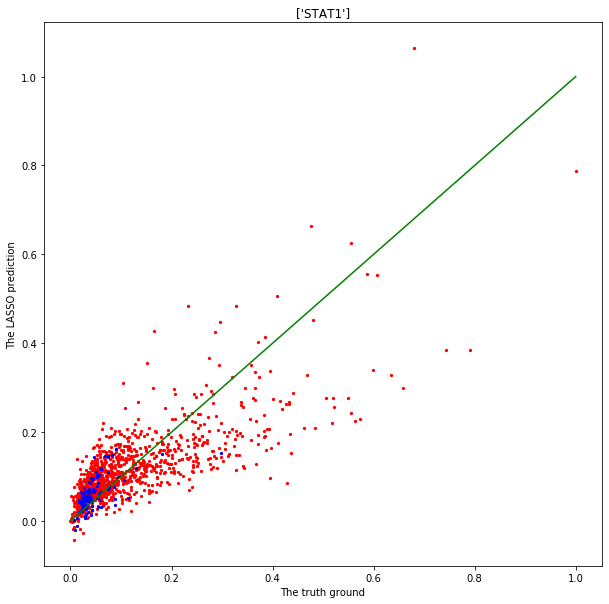

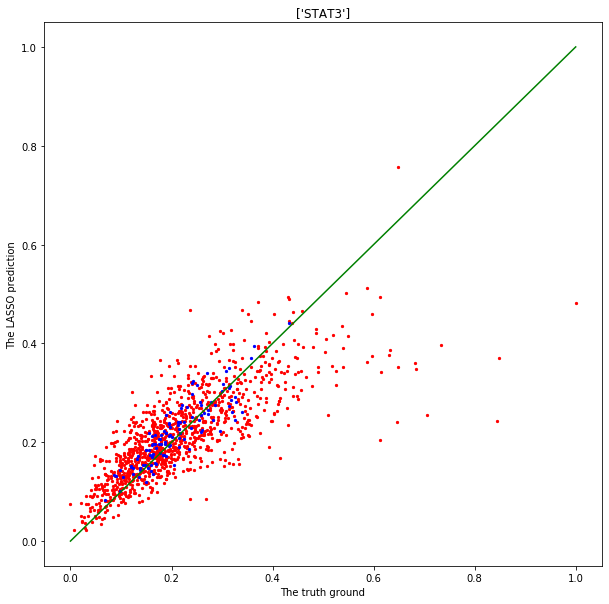

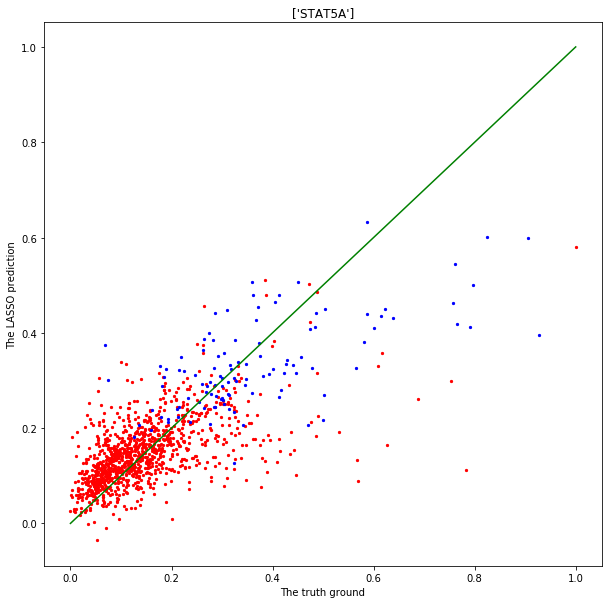

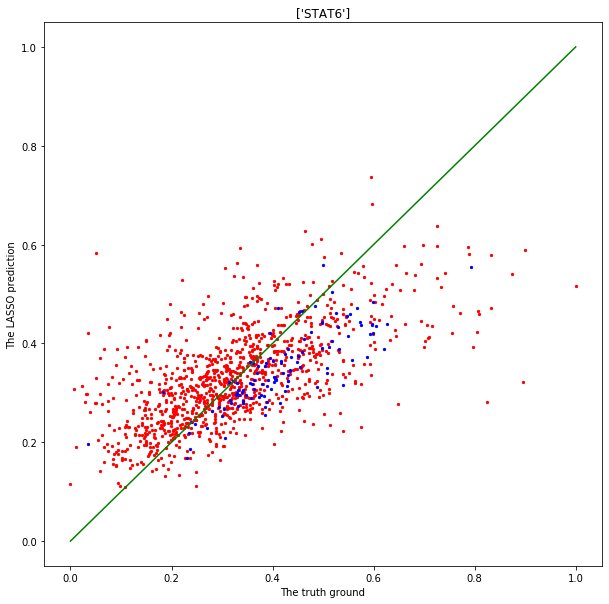

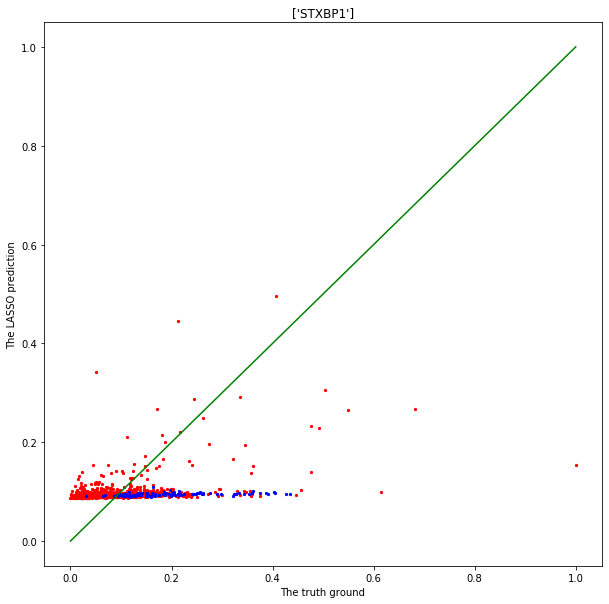

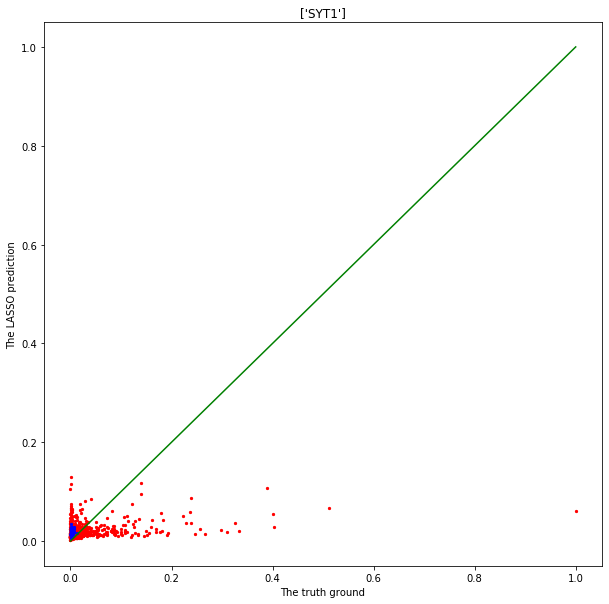

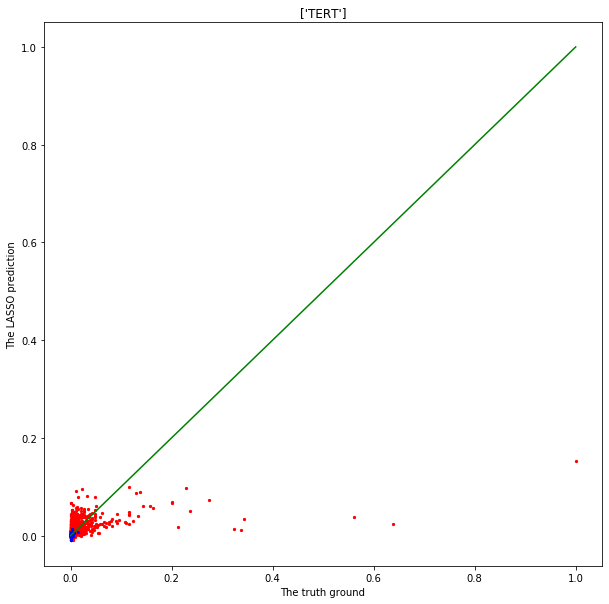

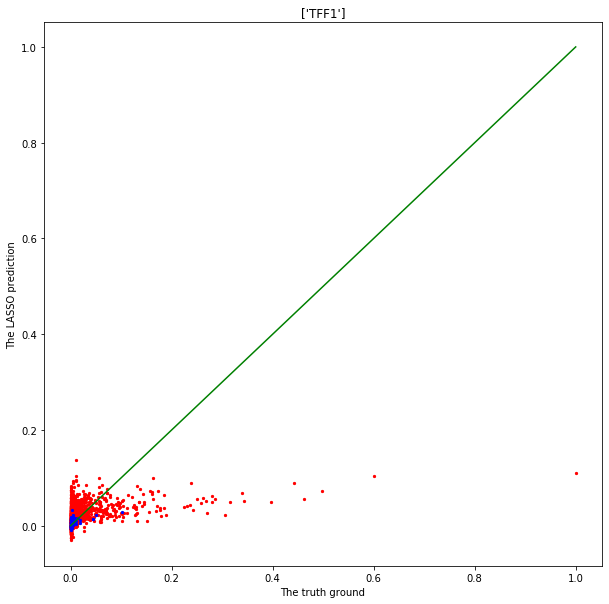

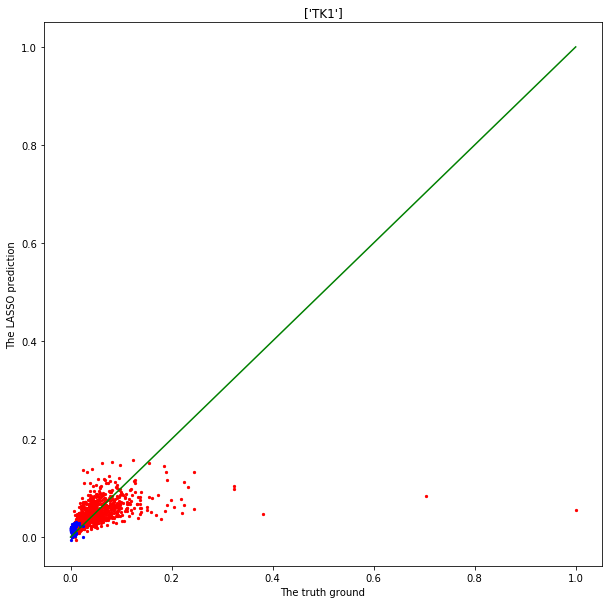

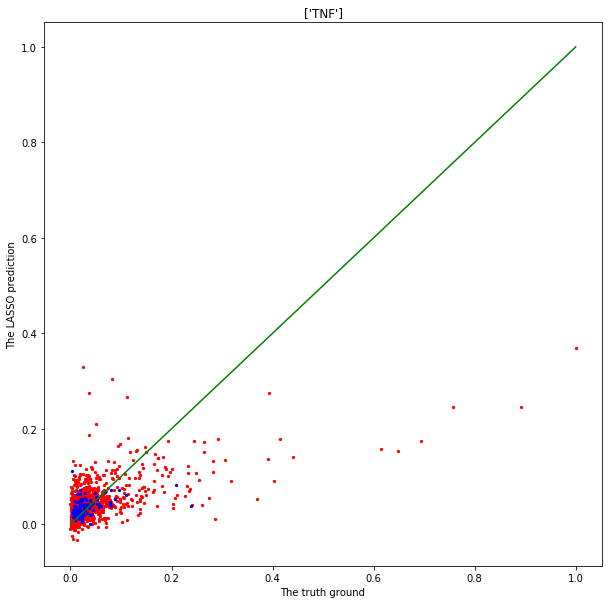

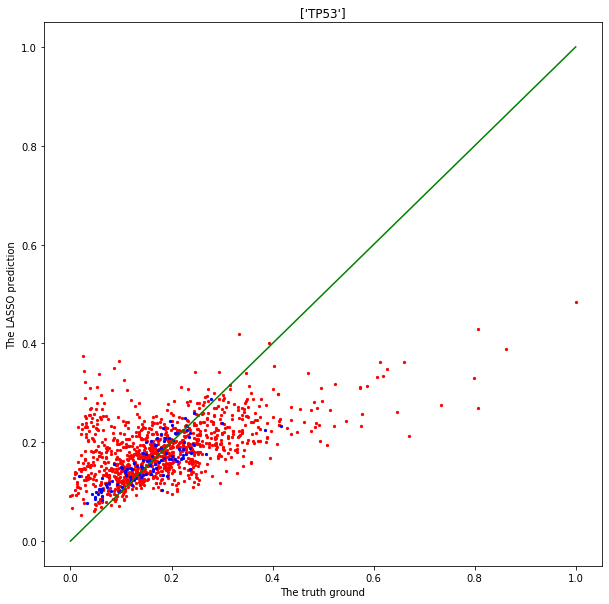

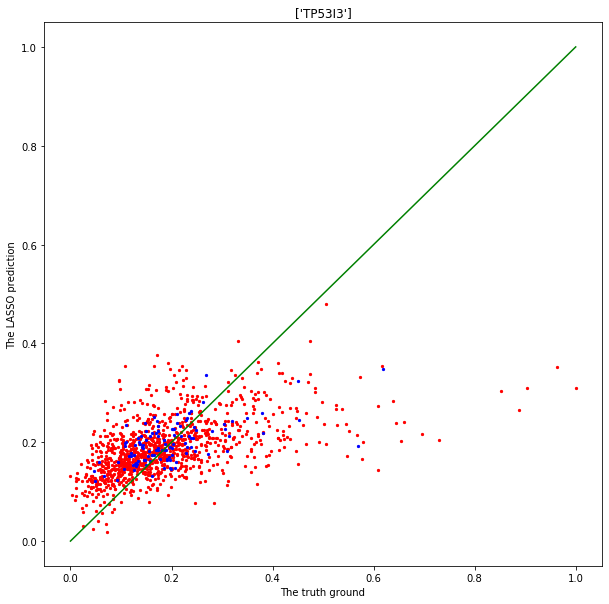

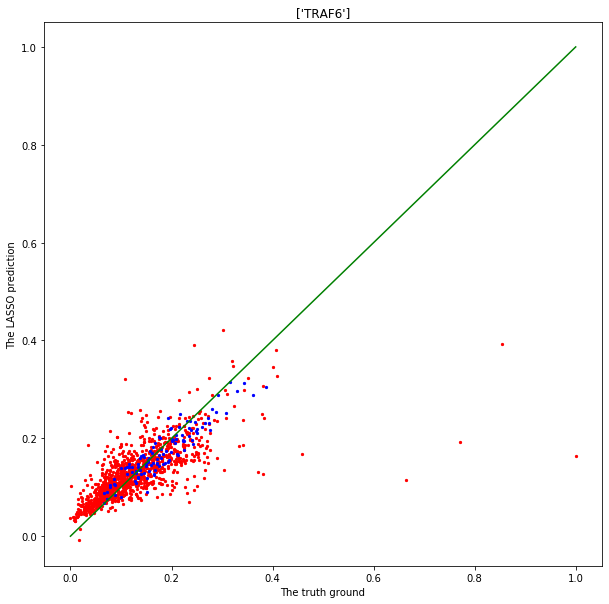

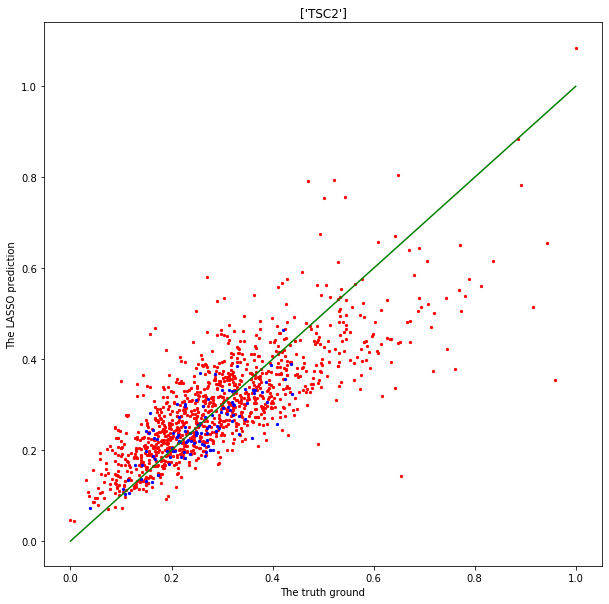

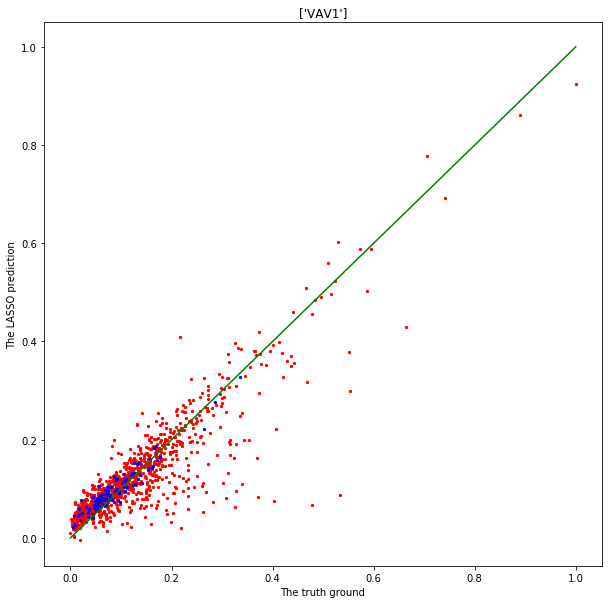

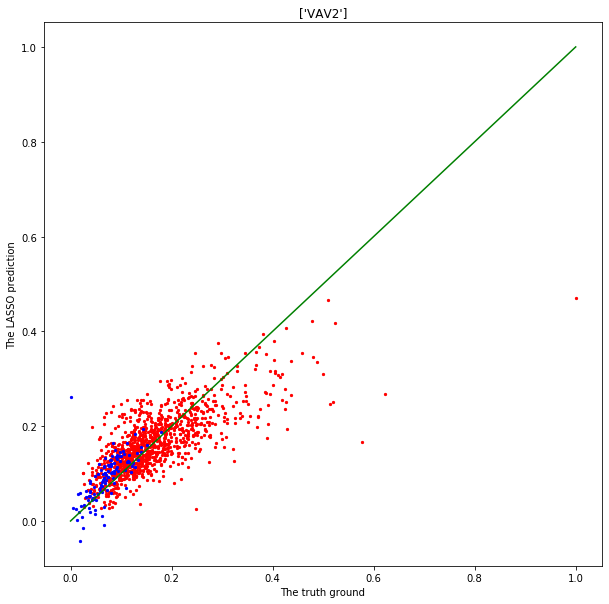

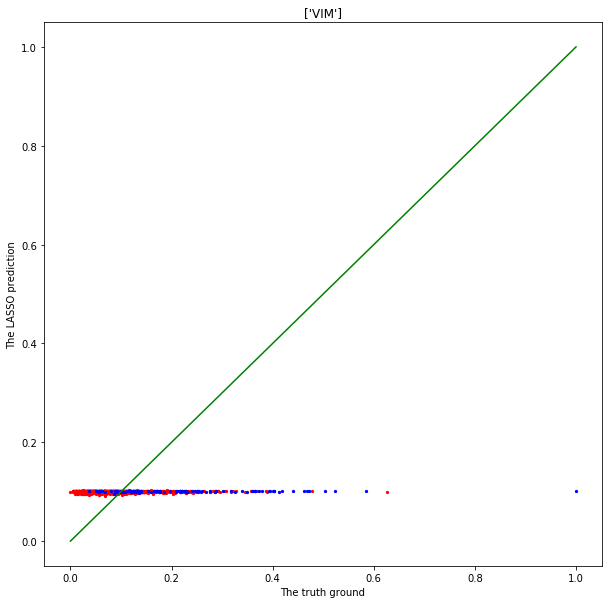

In [5]:
# Showup for some predictions and real value
for idx, obj in enumerate(data_loader):
    plt.figure(figsize=(10,10))
    plt.scatter(obj.activ_cancer_target.reshape(-1), obj.predict_cancer, s=5, c='r')
    plt.scatter(obj.activ_free_target.reshape(-1), obj.predict_free, s=5, c='b')
    # plot the criterion line
    temp = np.hstack([obj.activ_free_target.reshape(-1),
                      obj.activ_cancer_target.reshape(-1)])
    xx = np.linspace(temp.min(), temp.max(), 10000)
    yy = xx
    plt.plot(xx, yy, 'g')
    plt.title(data.pthway_NameList.iloc[obj.test_id,:]['GenomeName'].values)
    plt.xlabel('The truth ground')
    plt.ylabel('The LASSO prediction')
    plt.savefig('./results/Lasso/{}.pdf'.format(data.pthway_NameList.iloc[obj.test_id,:]['GenomeName'].values))
    plt.show()